In [1]:
import pandas as pd
import plotnine as p9


In [5]:
df = pd.read_csv('../data/drug_consumption_clean.csv', sep = ',')

In [6]:
df.head(5)

age  gender            education country  n_score  e_score  o_score  \
0  35-44  Female       Estudios de FP      UK  0.31287 -0.57545 -0.58331   
1  25-34    Male  Estudios superiores      UK -0.67825  1.93886  1.43533   
2  35-44    Male       Estudios de FP      UK -0.46725  0.80523 -0.84732   
3  18-24  Female  Estudios superiores      UK -0.14882 -0.80615 -0.01928   
4  35-44  Female  Estudios superiores      UK  0.73545 -1.63340 -0.45174   

   a_score  c_score  impulsive  sensation_seeing  alcohol  caffeine  nicotine  \
0 -0.91699 -0.00665   -0.21712          -1.18084        1         1         0   
1  0.76096 -0.14277   -0.71126          -0.21575        1         1         1   
2 -1.62090 -1.01450   -1.37983           0.40148        1         1         0   
3  0.59042  0.58489   -1.37983          -1.18084        1         1         0   
4 -0.30172  1.30612   -0.21712          -0.21575        1         1         0   

   recreational_drugs  stimulant_drugs  sedative_drugs  high_risk_drugs  
0                   0                0               0                0  
1                   1                1               0                0  
2                   1                0               0                0  
3                   0                0               1                0  
4                   1                0               0                0

plotnine no tiene la libreria de geom_density_ridges, por lo que no se puede hacer el grafico de densidad.

In [40]:
from plotnine import ggplot, aes, geom_density_ridges, labs, theme_minimal

def personalidad_vs_drug_vs_usage(df, drug_number, personality_number):
    temp = df.columns
    drug = temp[drug_number]
    personality_col = temp[personality_number]
    
    personality = pd.concat([df[df[drug]==1][personality_col], df[df[drug]==0][personality_col]], axis=1)
    personality.columns = [f'{drug} User', 'Never Used']
    
    plot = (ggplot(df, aes(x=personality_col, y=drug, fill=drug))
     + geom_density_ridges(alpha=0.5, color='black')
     + labs(y='Density', x=personality_col, title=f'Distribution of {personality_col} by {drug} usage')
     + theme_minimal()
    )
    
    print(plot)

ImportError: cannot import name 'geom_density_ridges' from 'plotnine' (C:\Users\mart3\anaconda3\Lib\site-packages\plotnine\__init__.py)

Hago los graficos de personalidad con la biblioteca matplotlib y seaborn. 

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

def personalidad_vs_drug_vs_usage(df, drug_number, personality_number):
    temp = df.columns
    drug = temp[drug_number]
    personality_col = temp[personality_number]
    
    personality = pd.concat([df[df[drug]==1][personality_col], df[df[drug]==0][personality_col]], axis=1)
    personality.columns = [f'{drug} User', 'Never Used']
    
    PersonPlot = plt.figure(figsize=(15, 6))
    sns.kdeplot(data=df, x=personality_col, hue=drug, fill=True, alpha=0.5, linewidth=1)

    plt.ylabel('Density')
    plt.xlabel(str(personality_col))
    plt.title(f'Distribution of {personality_col} by {drug} usage')
    plt.legend(title=f'Drug Usage: {drug}', labels=[f'{drug} User', 'Never Used'], facecolor='white')
    plt.show()

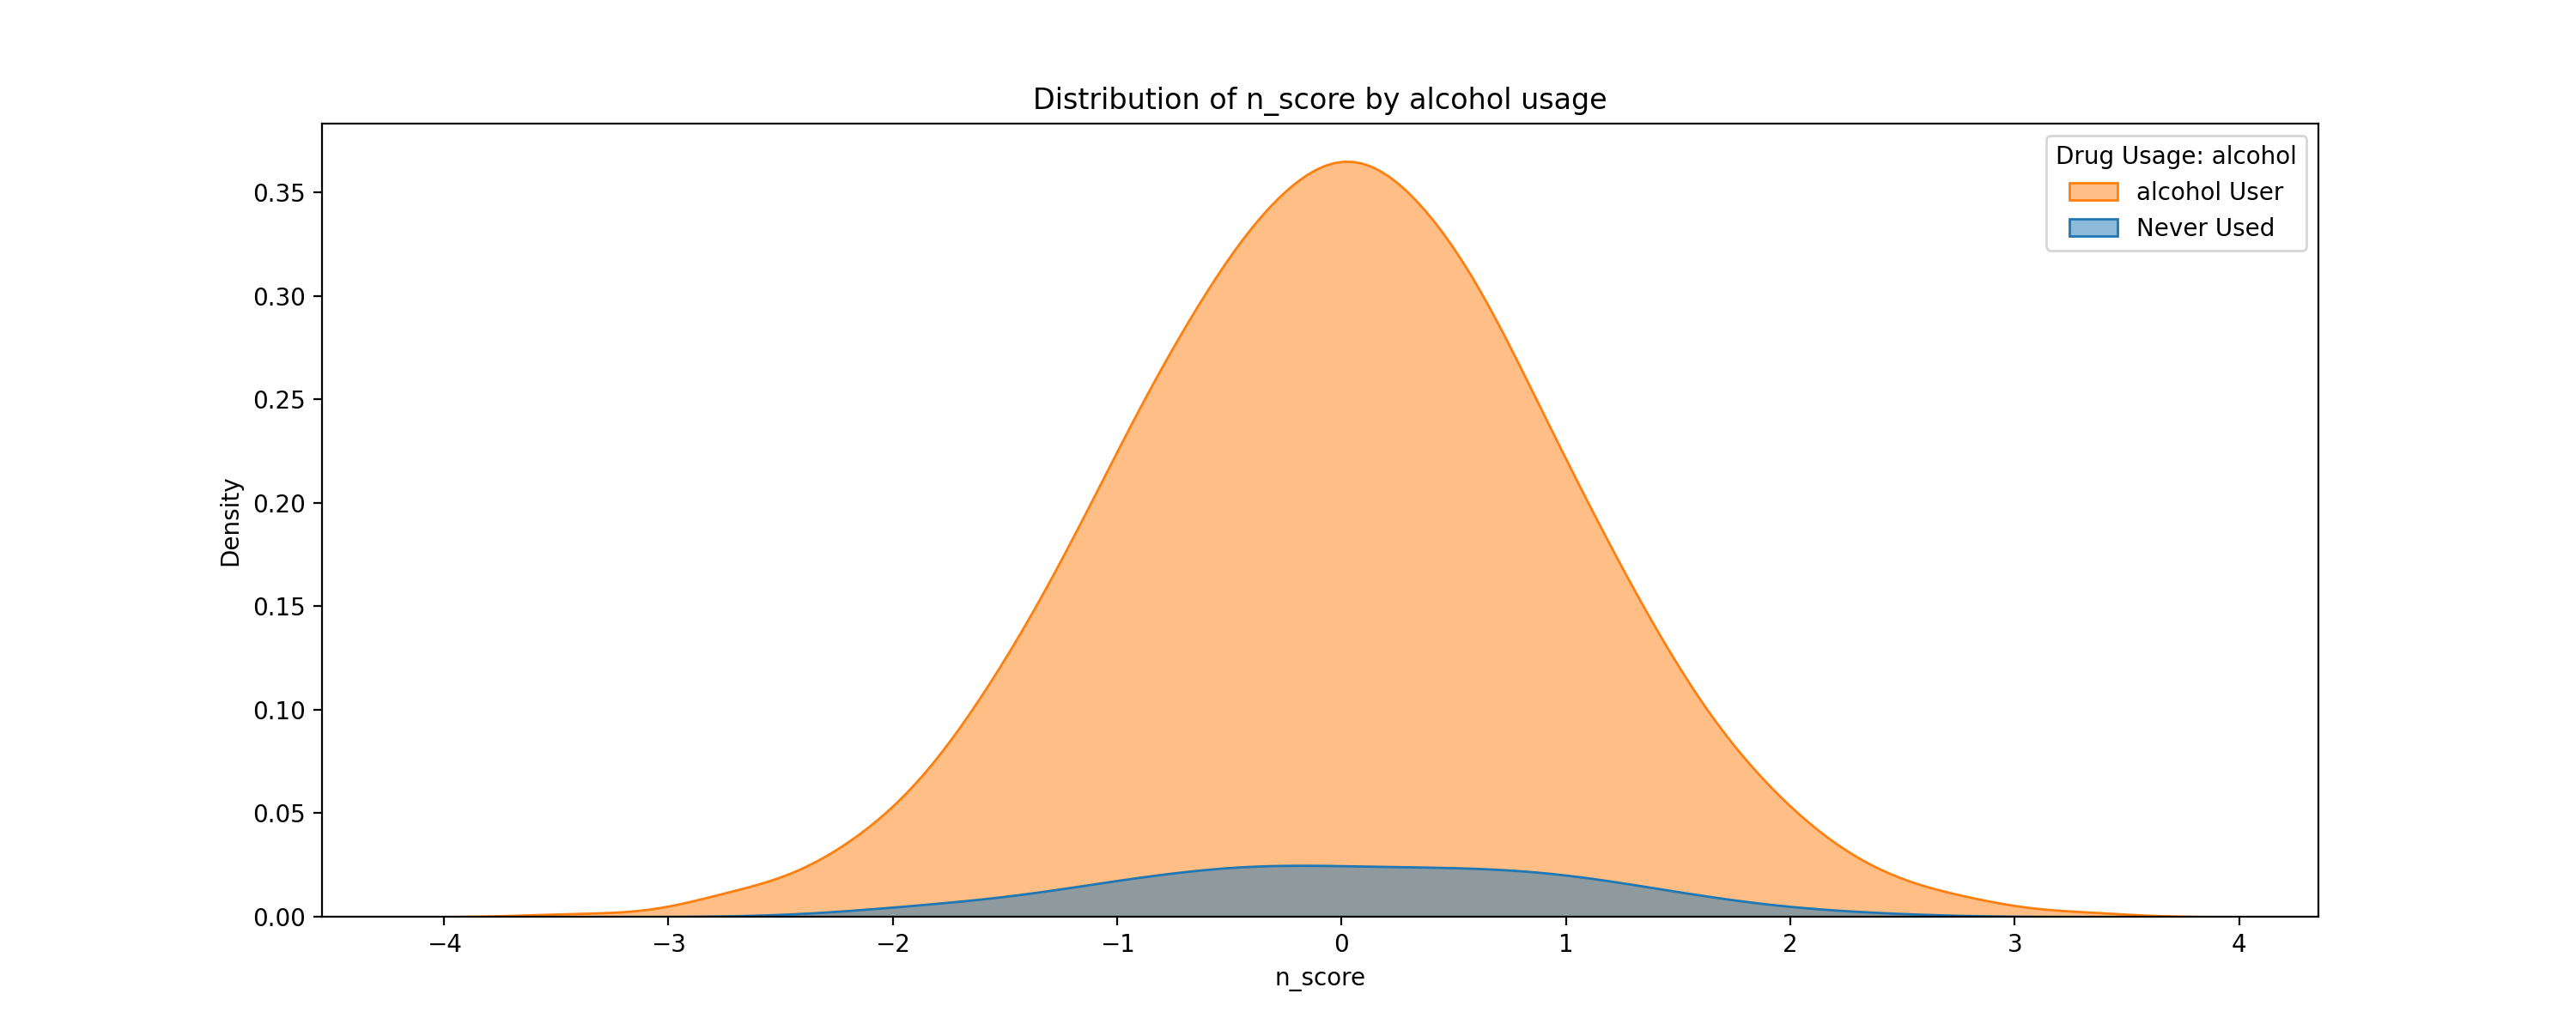

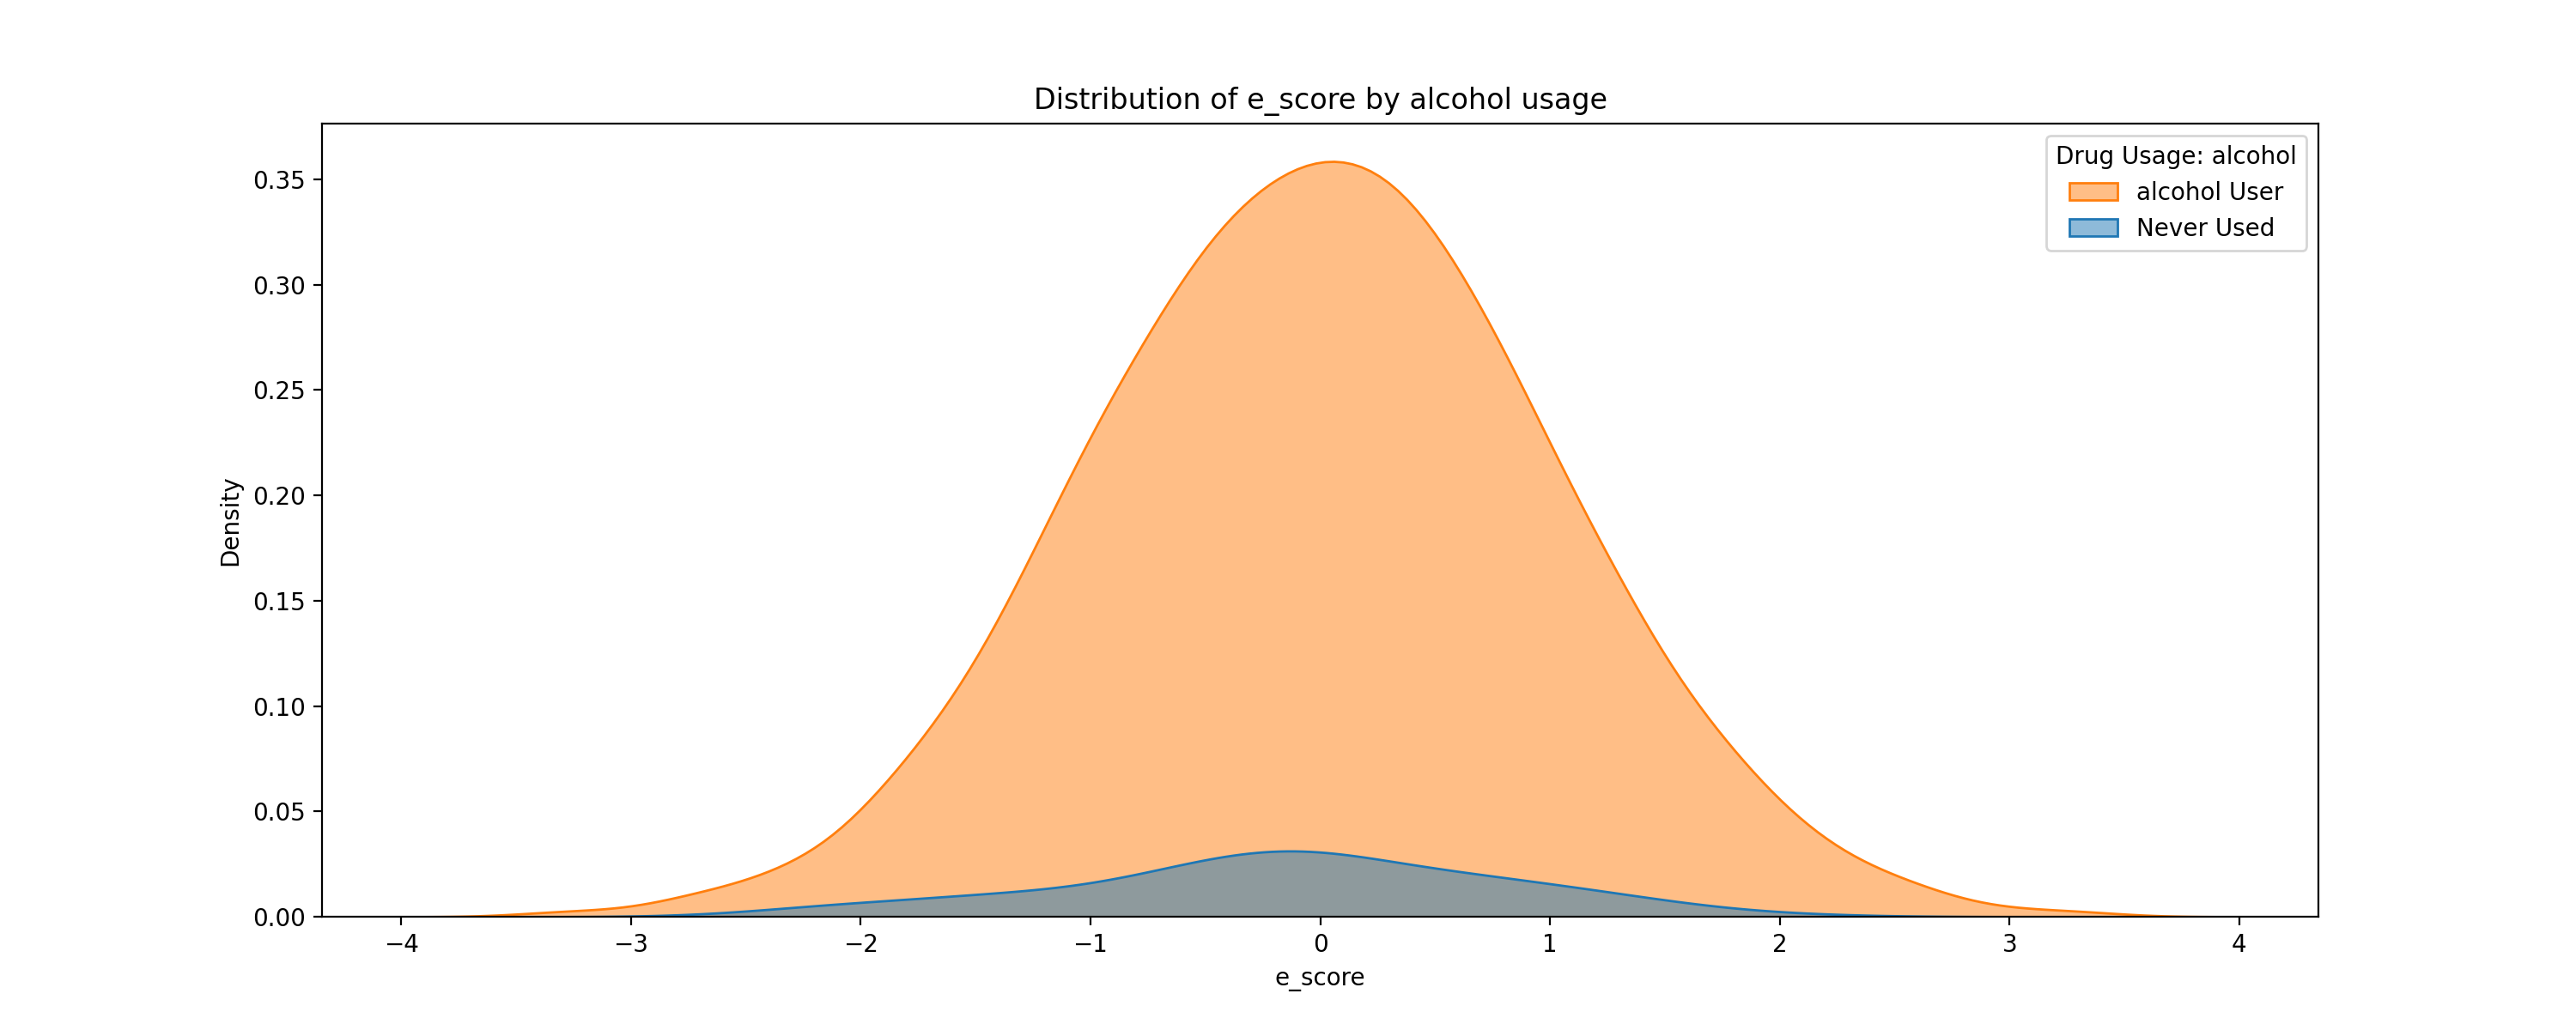

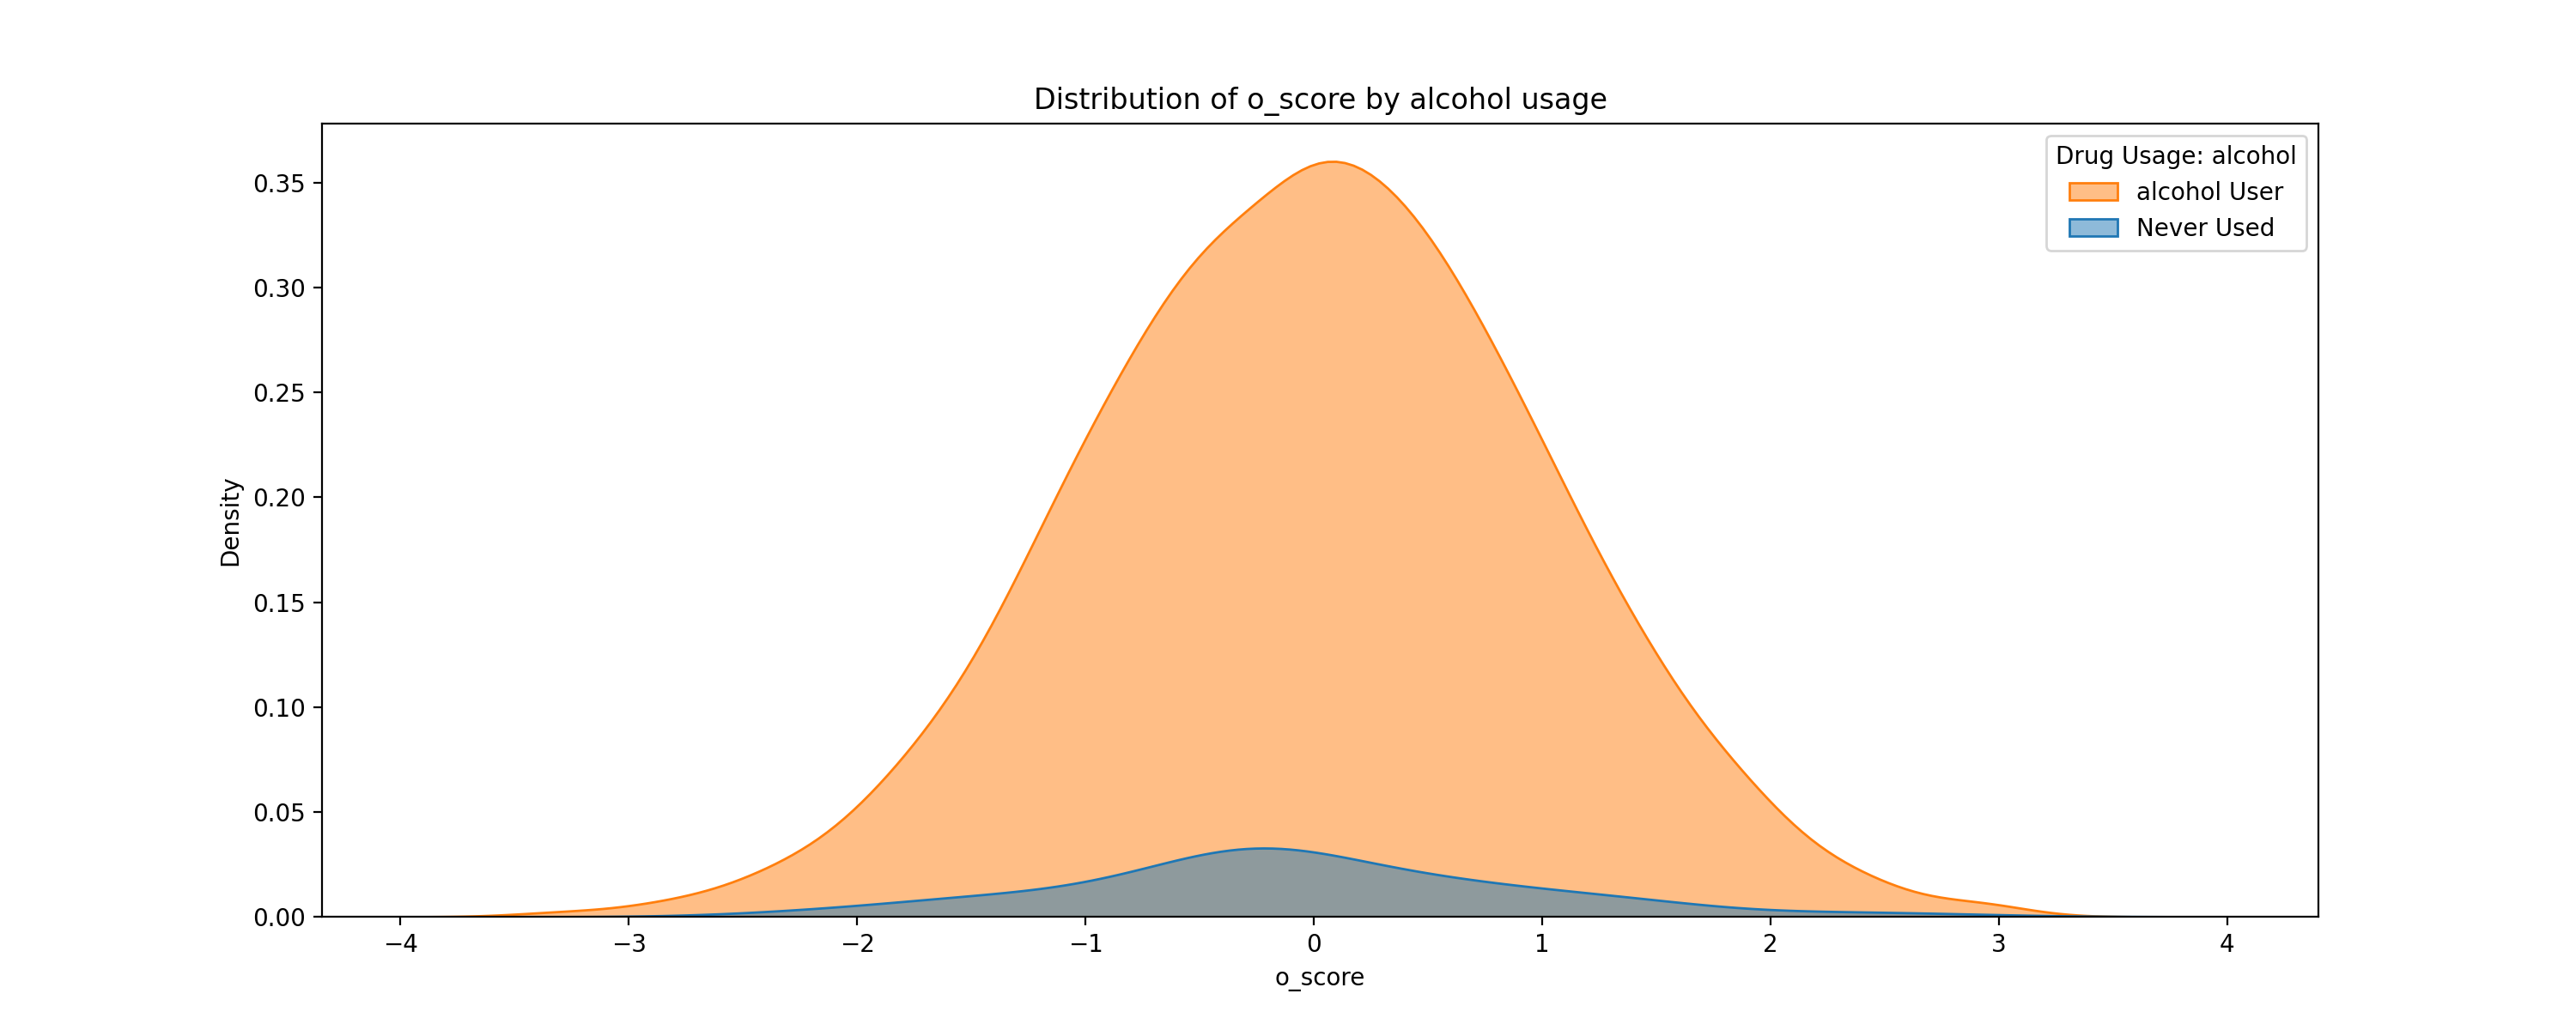

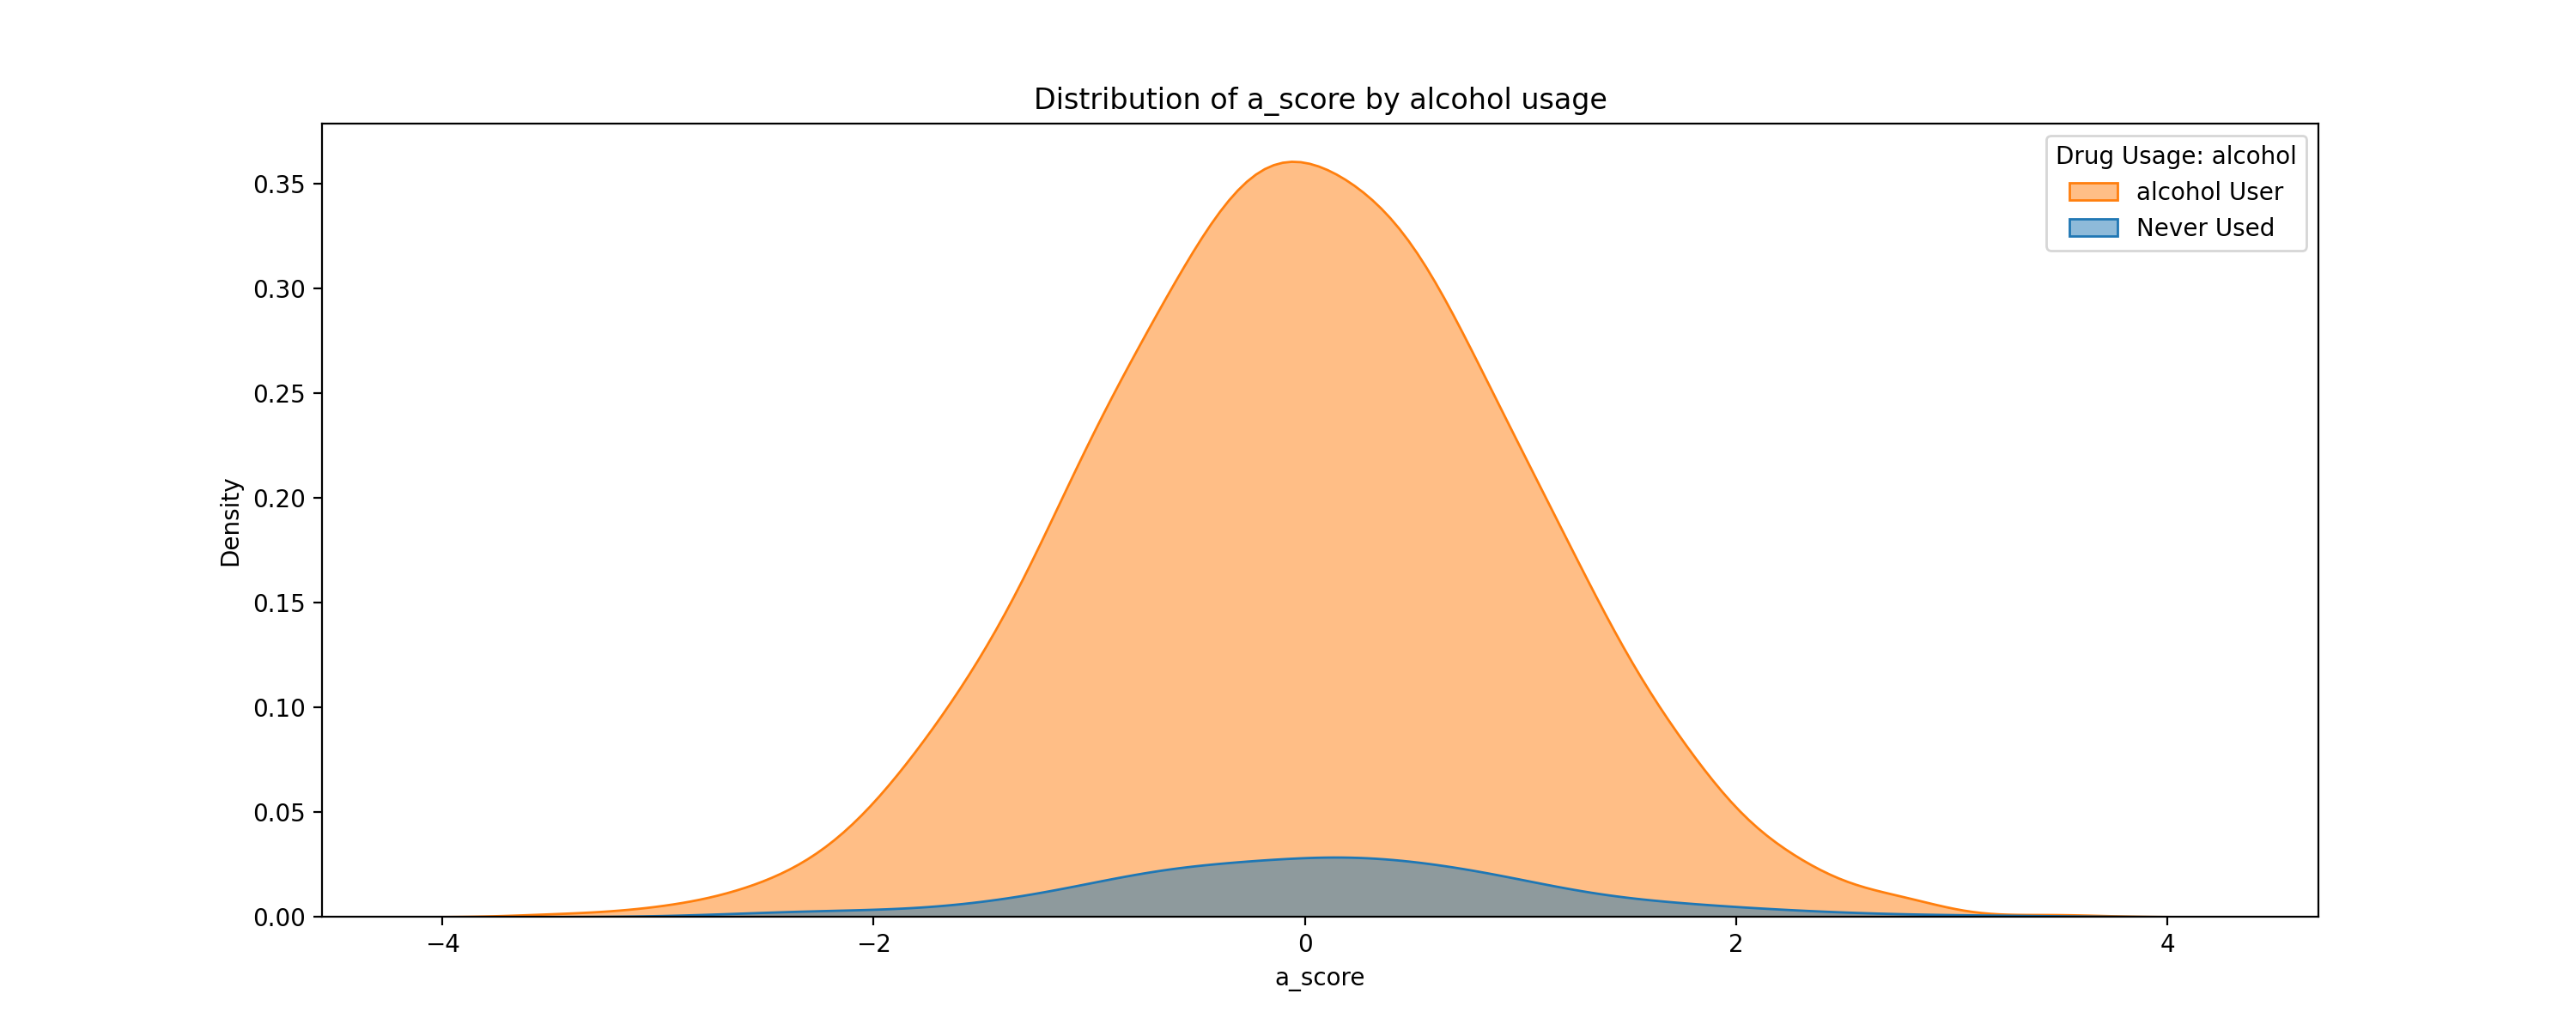

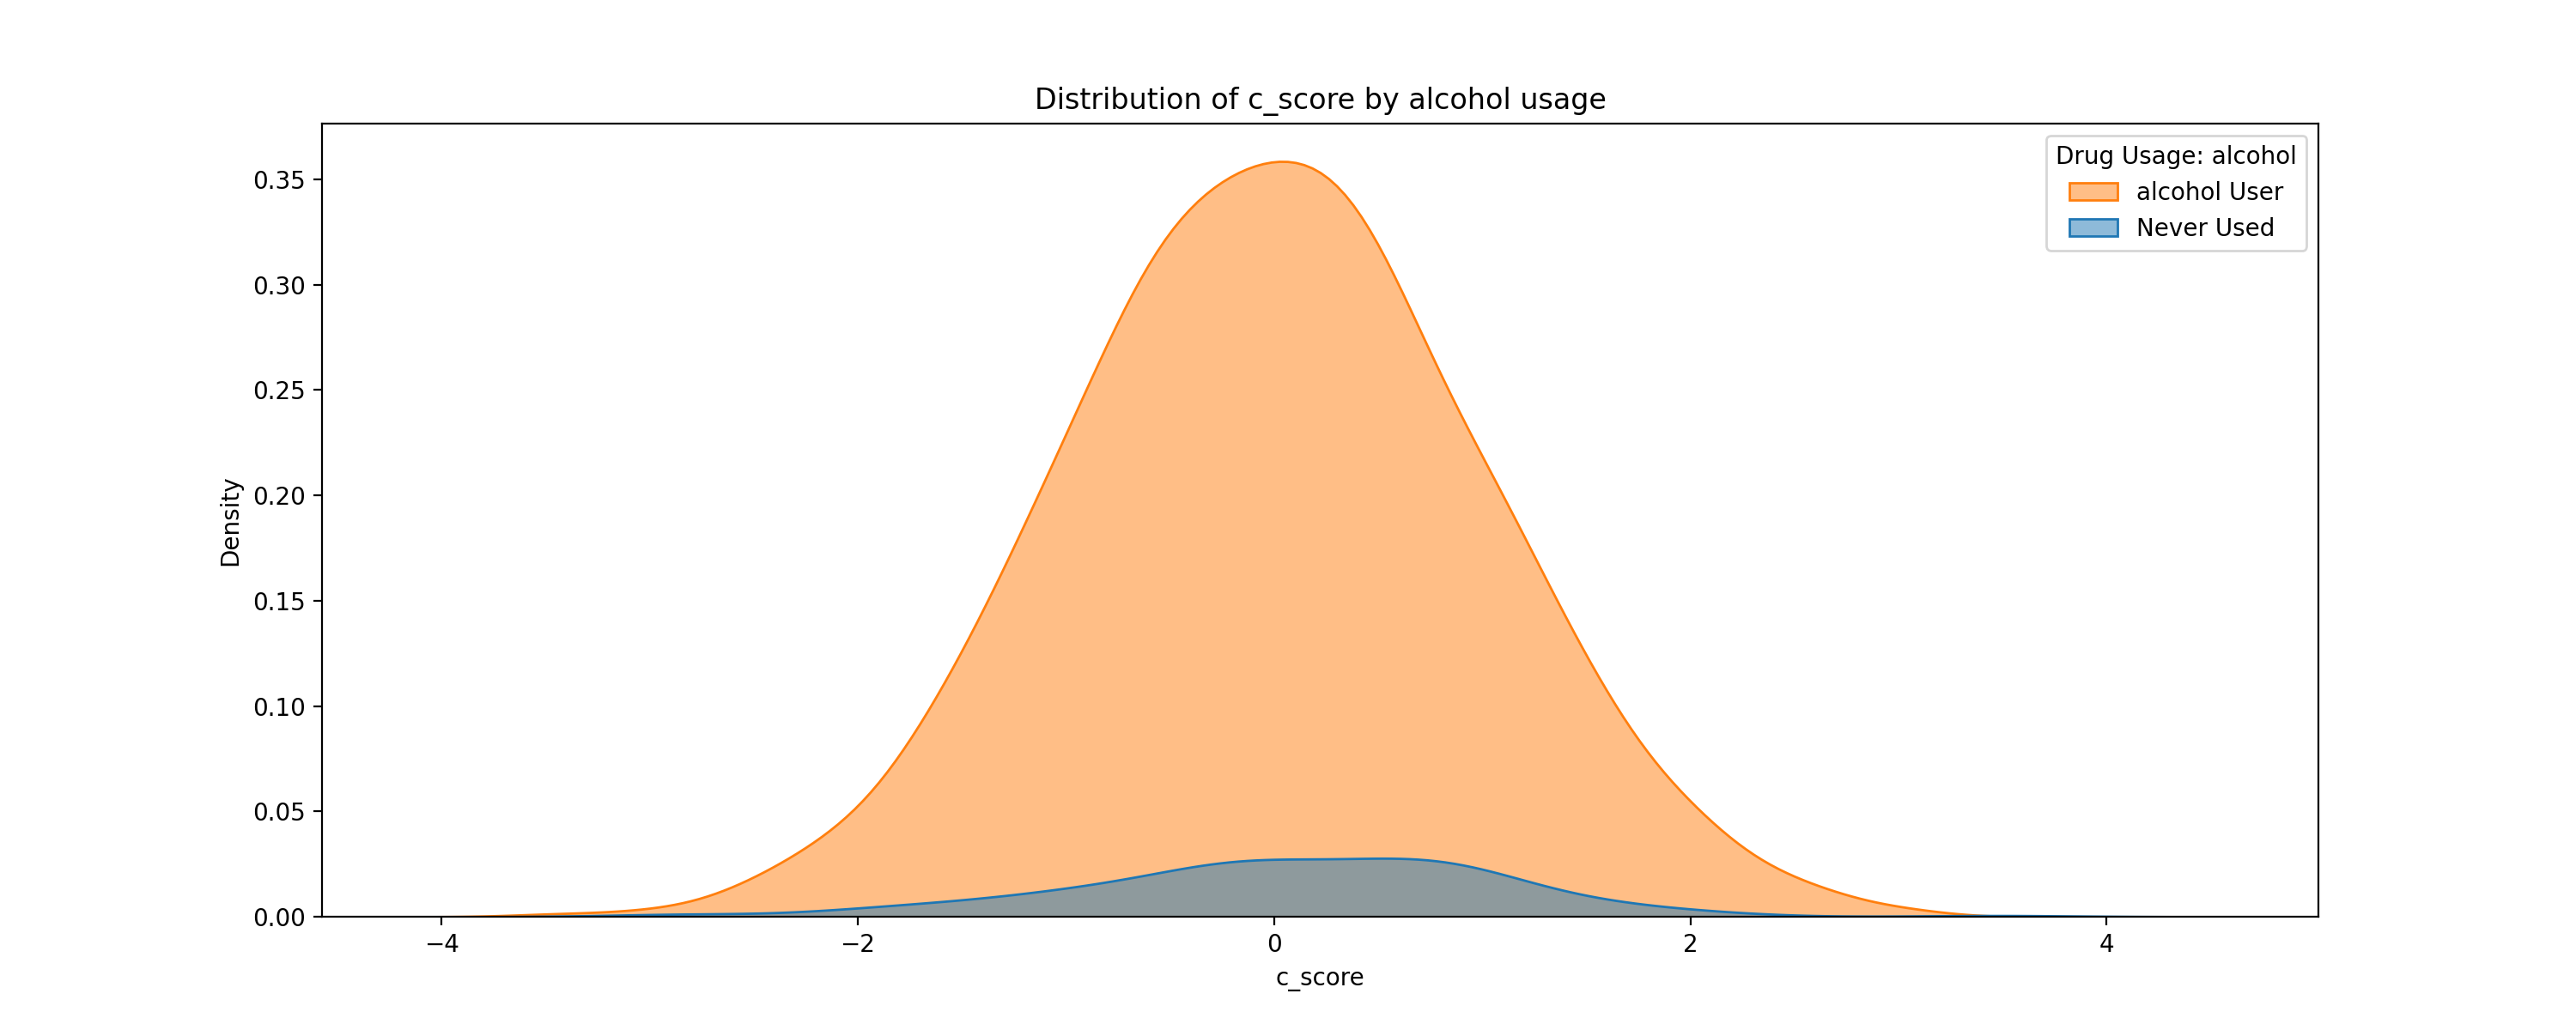

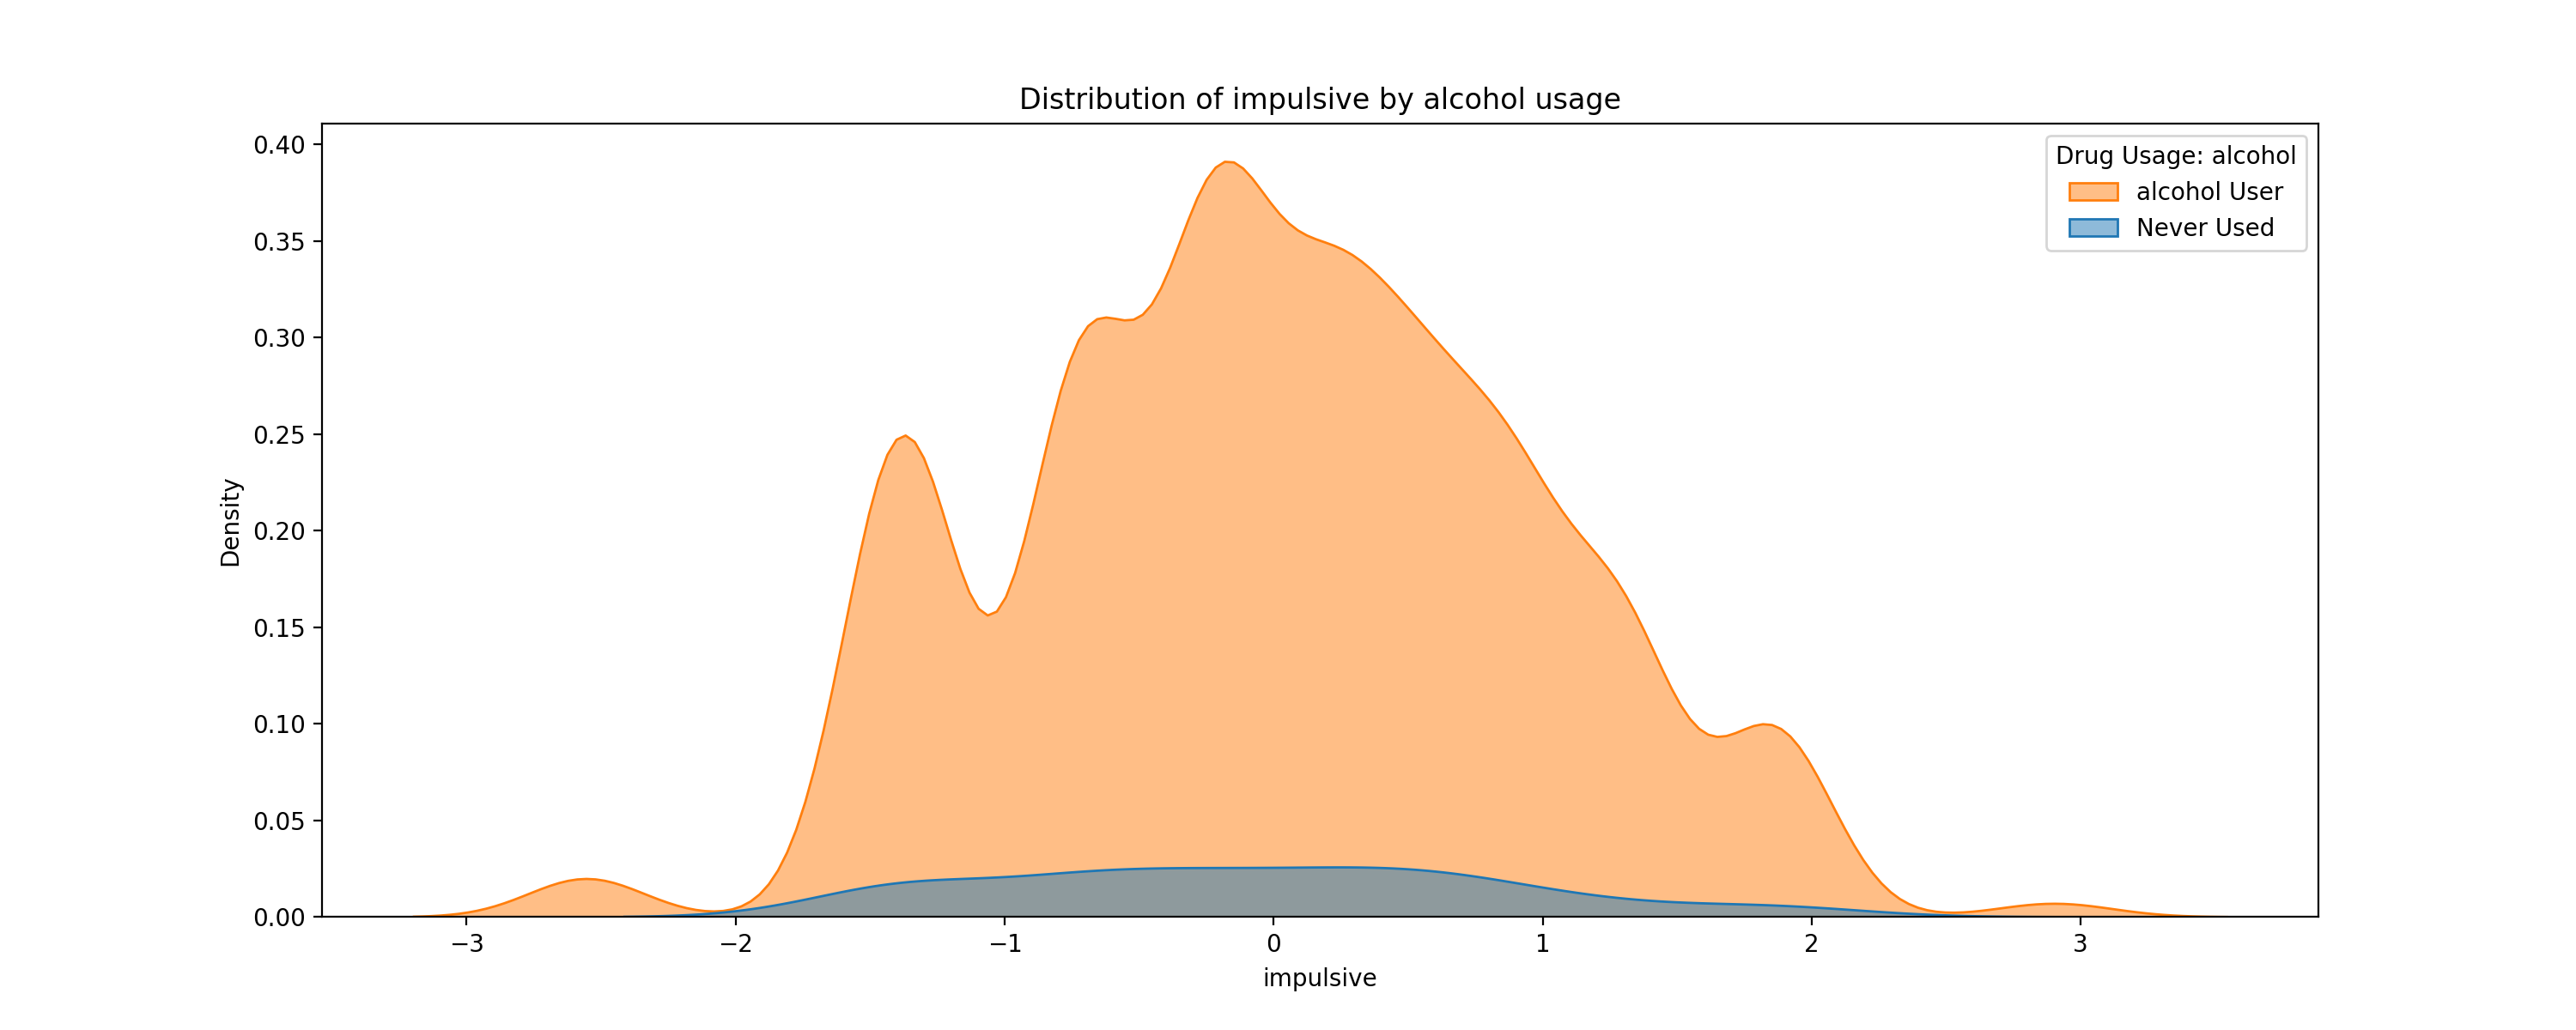

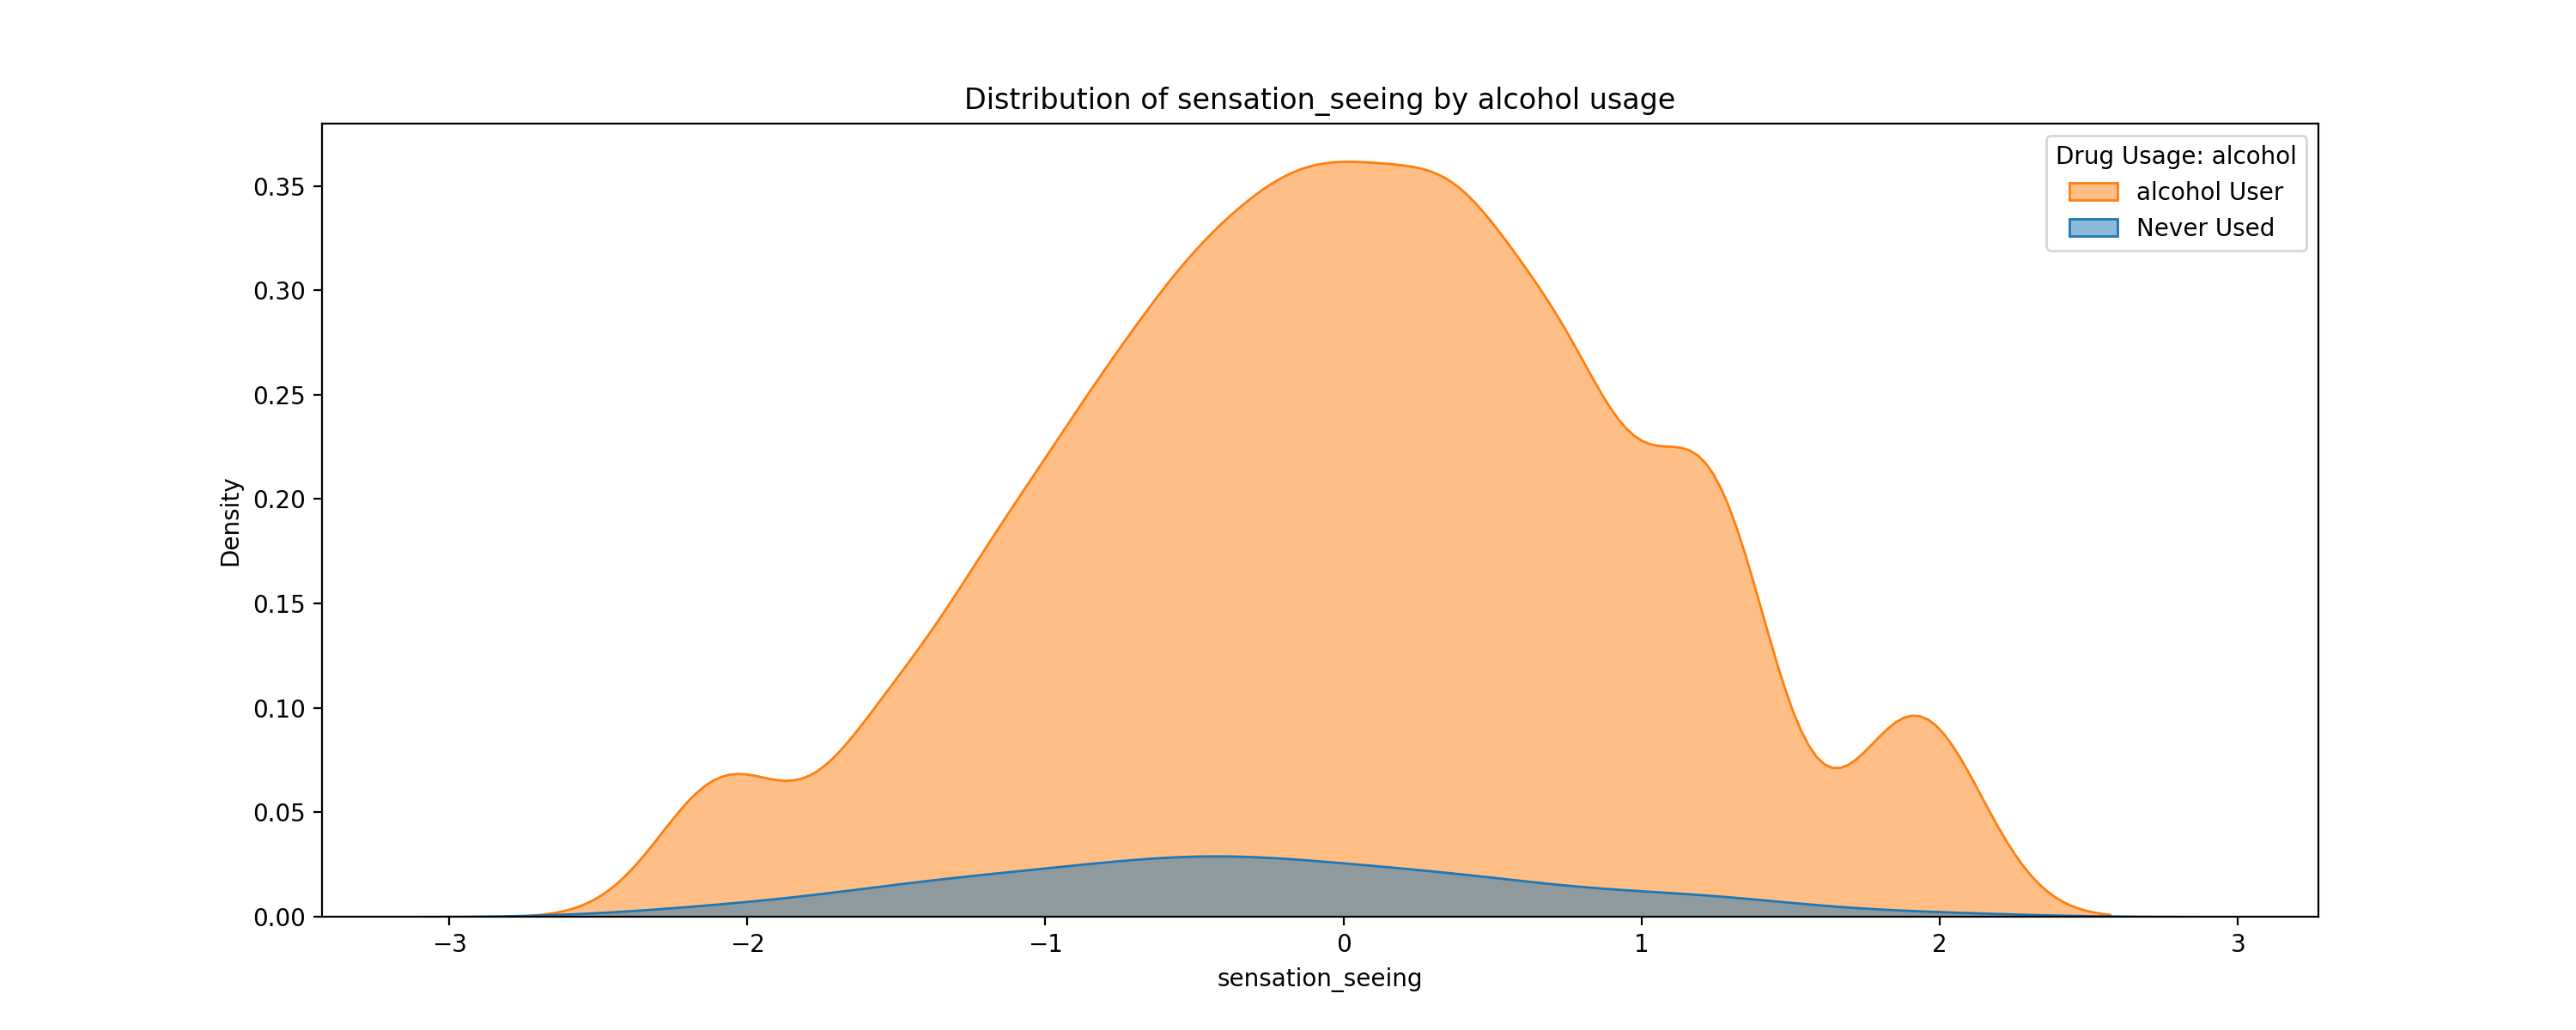

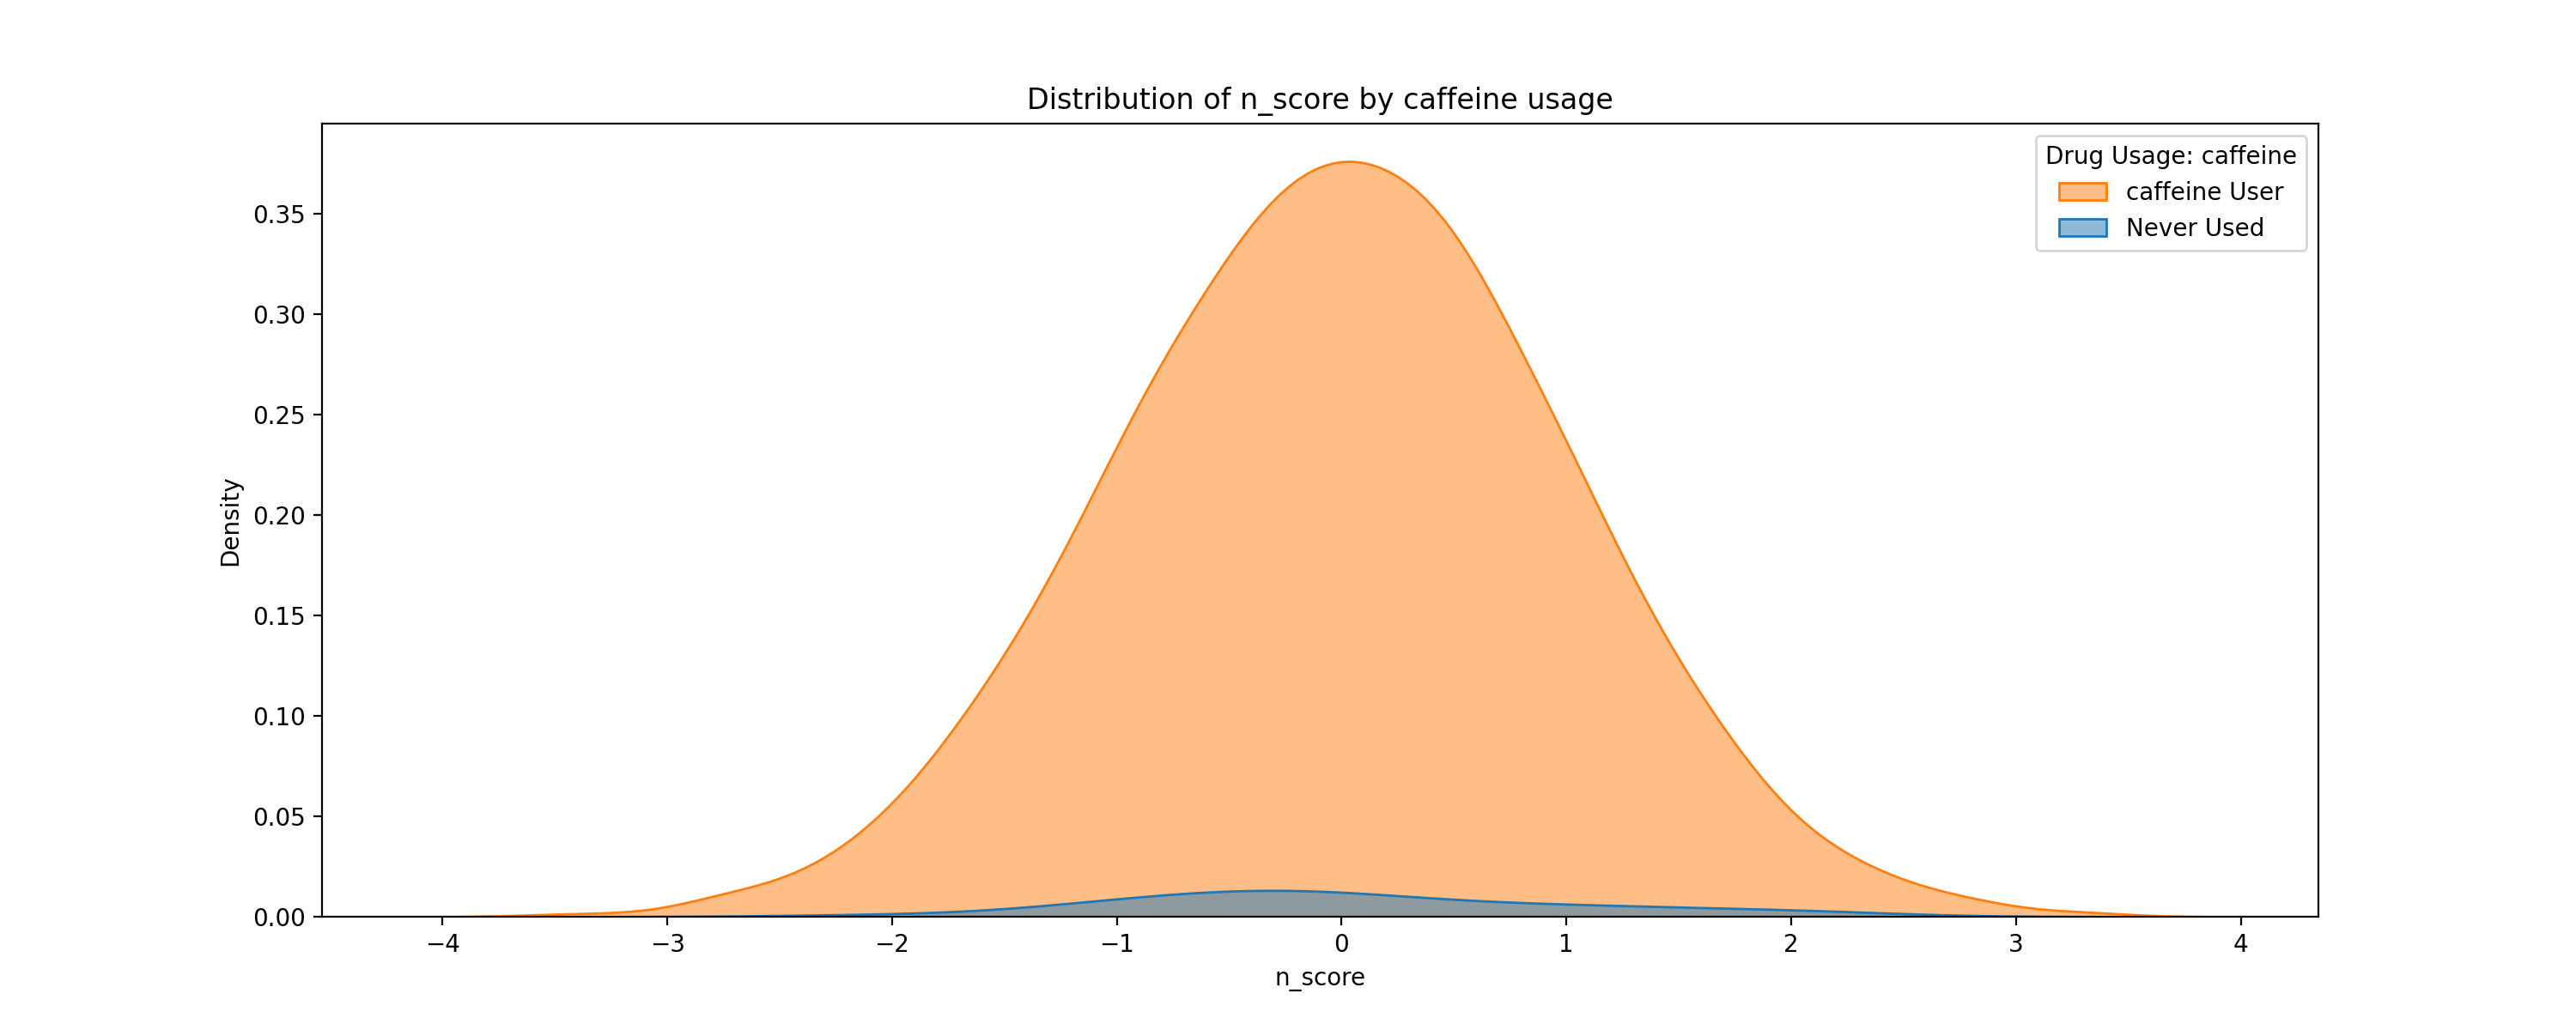

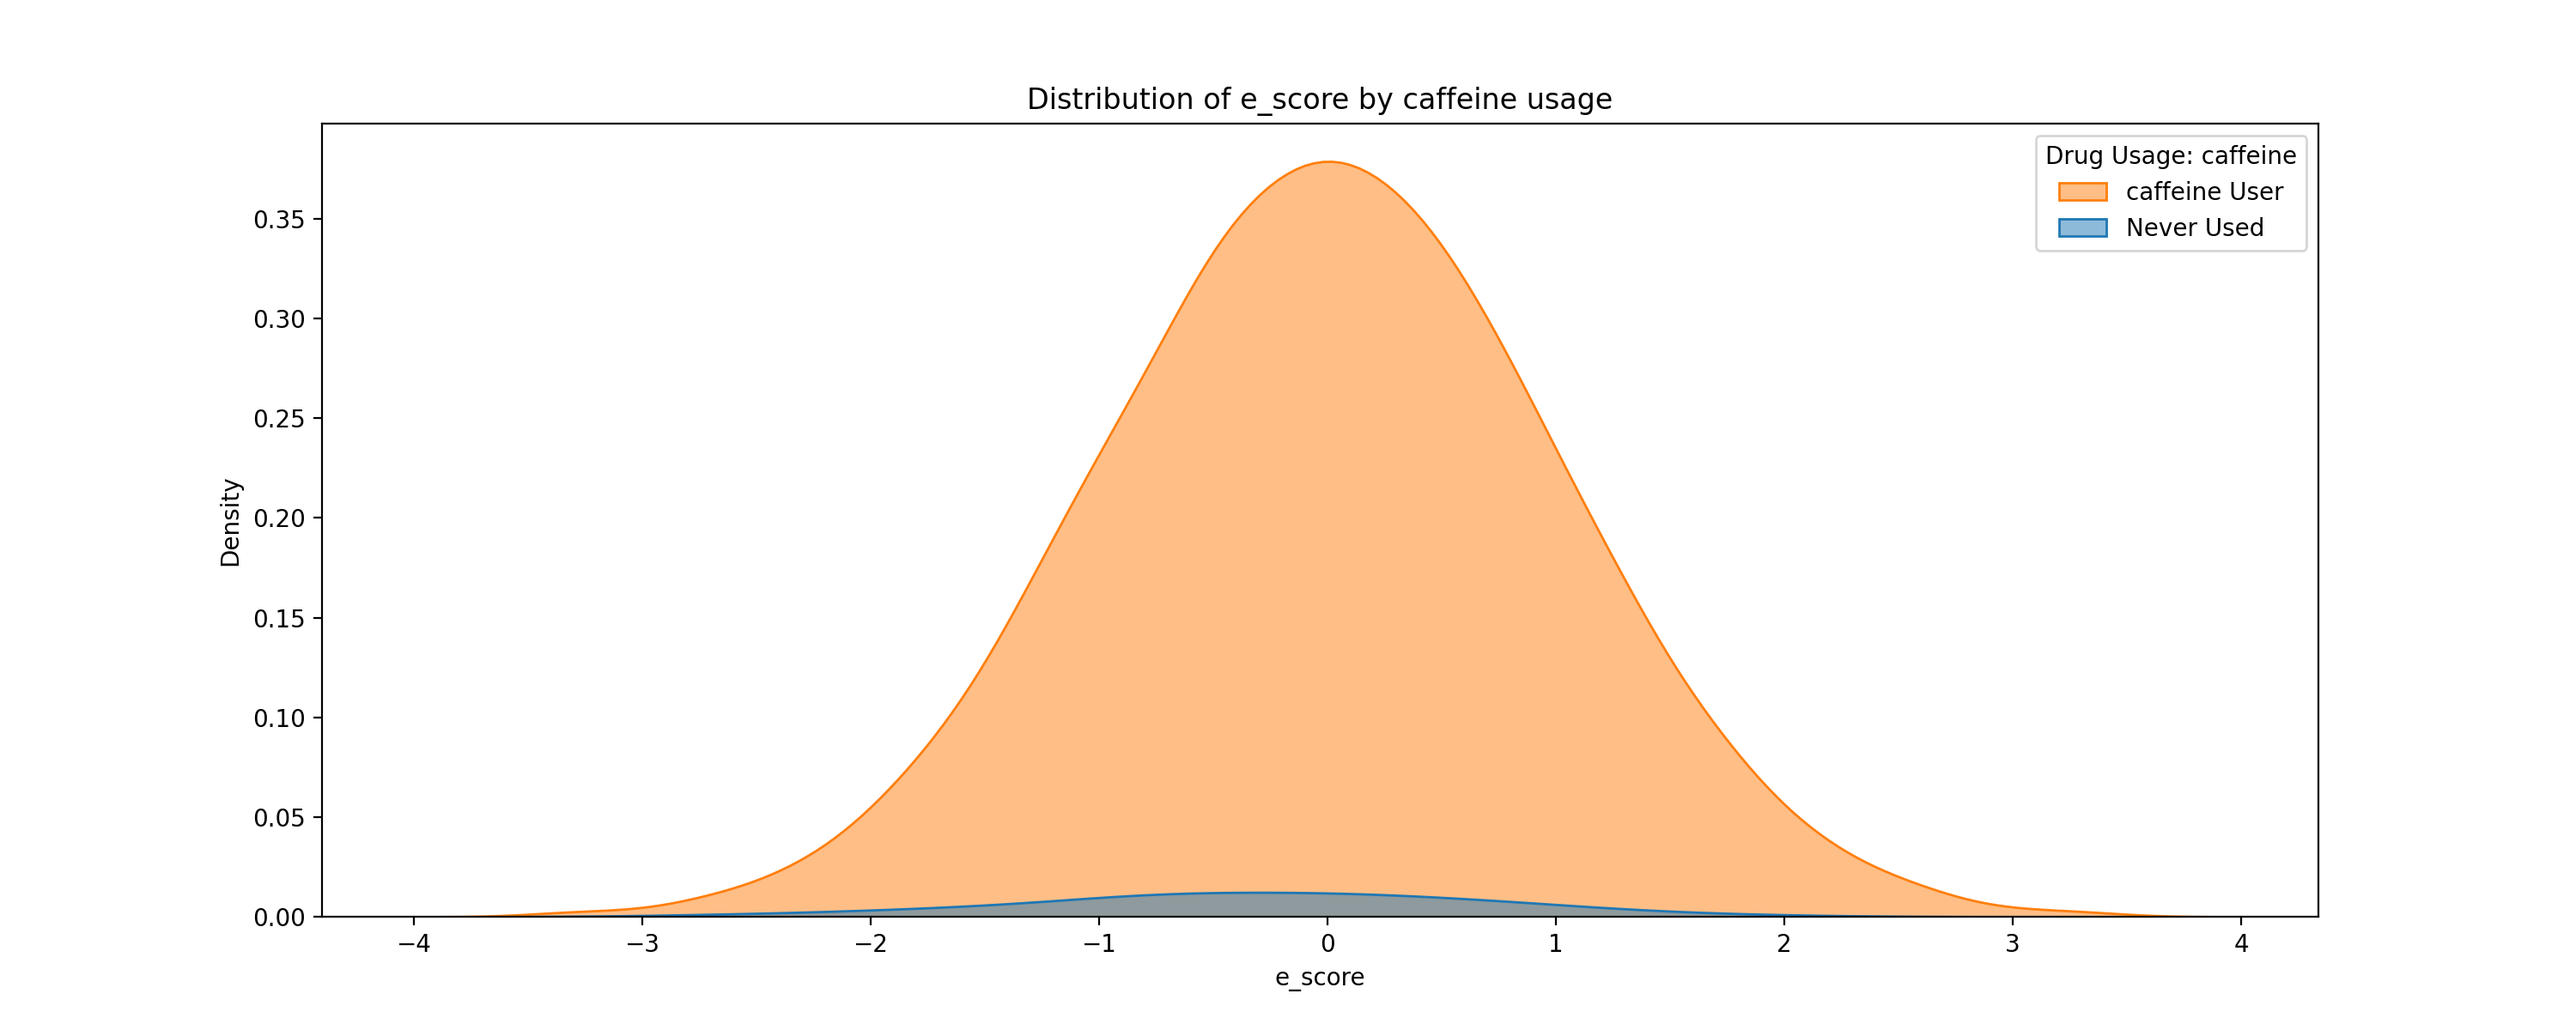

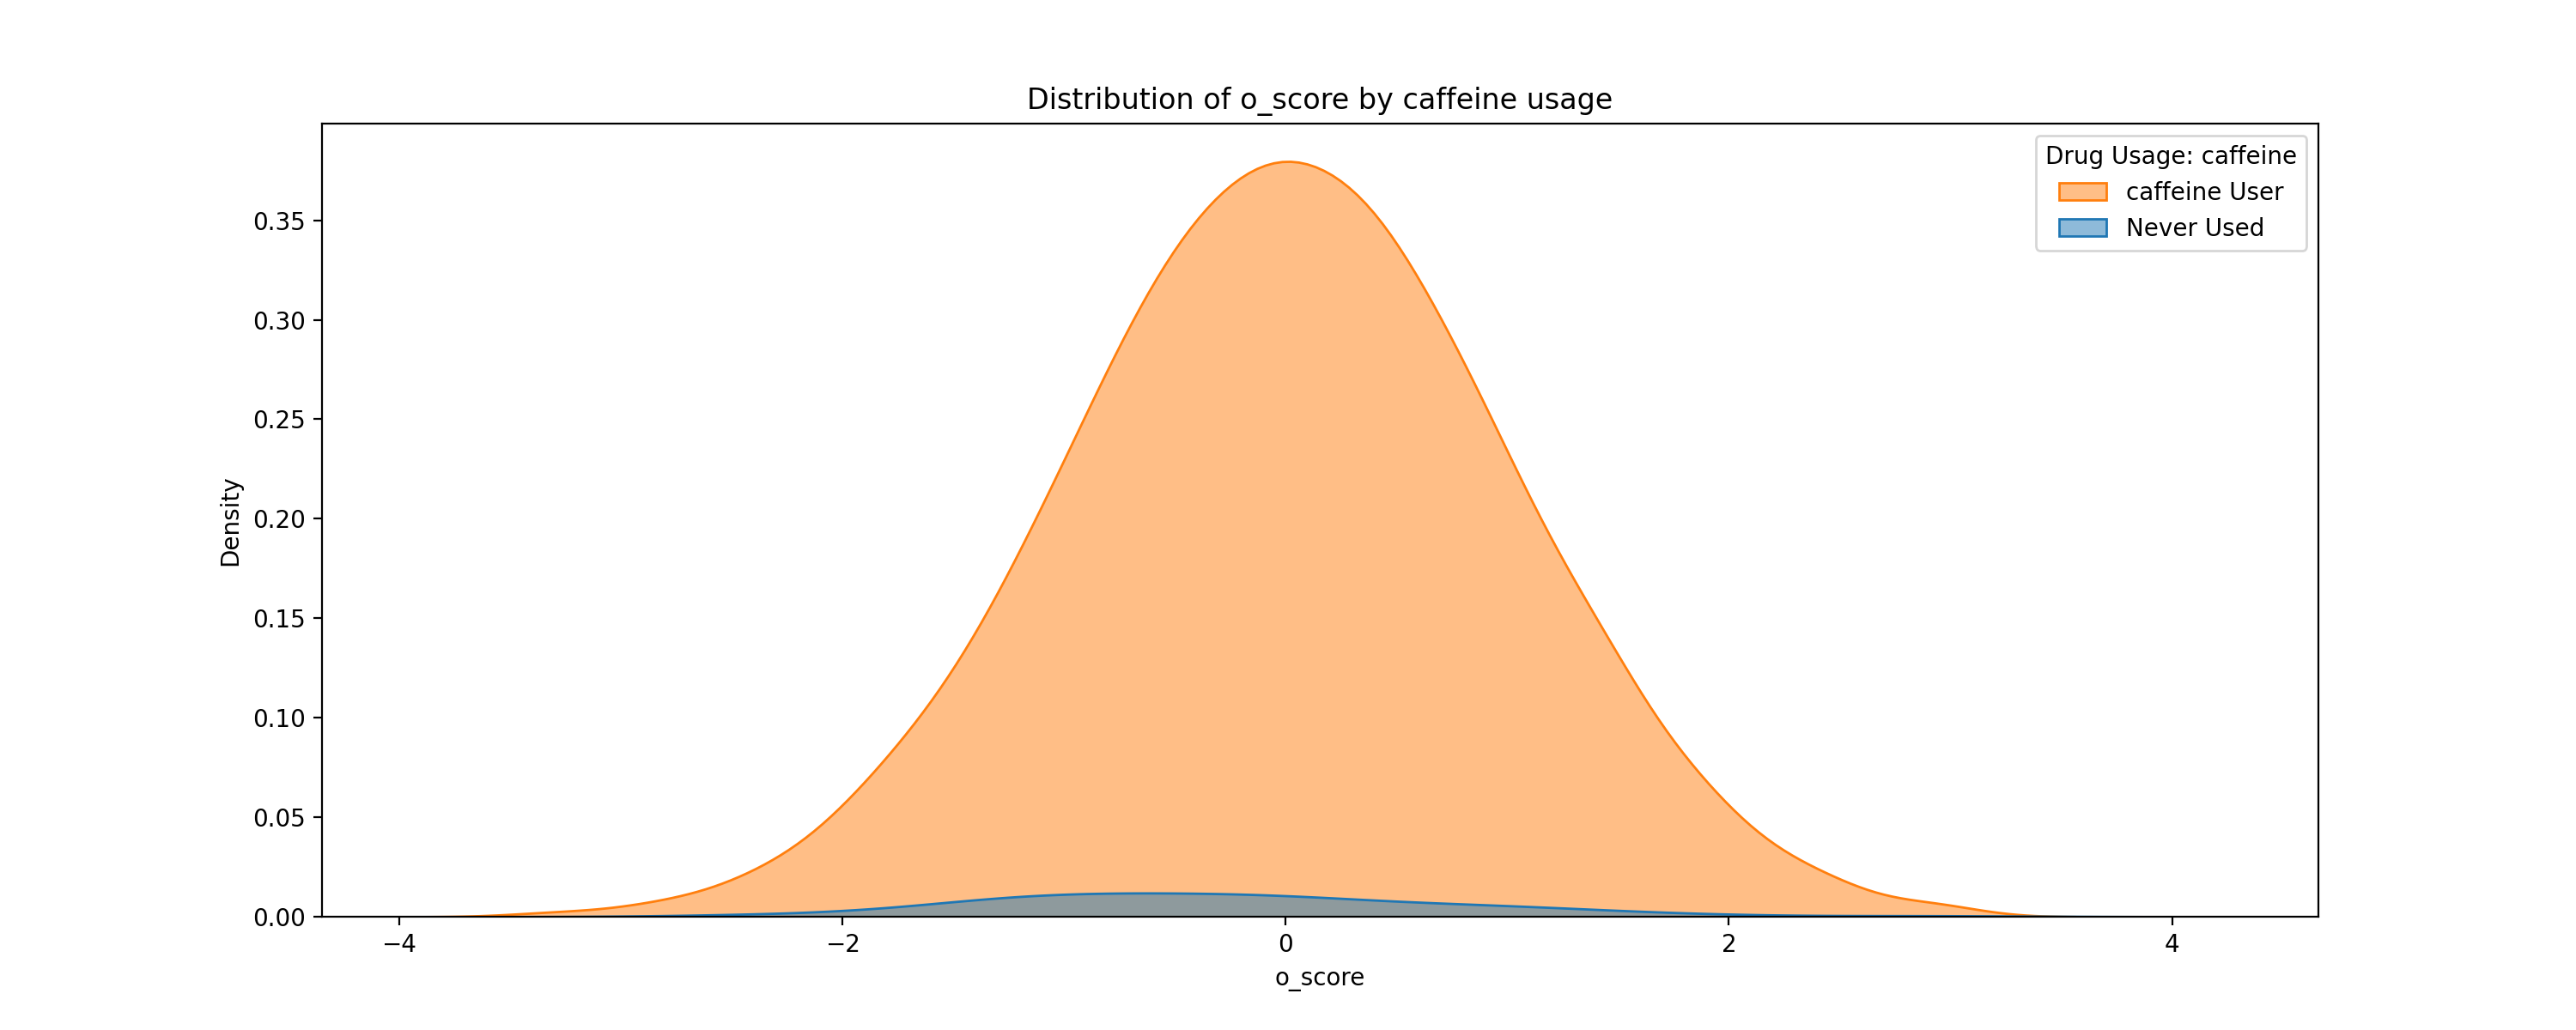

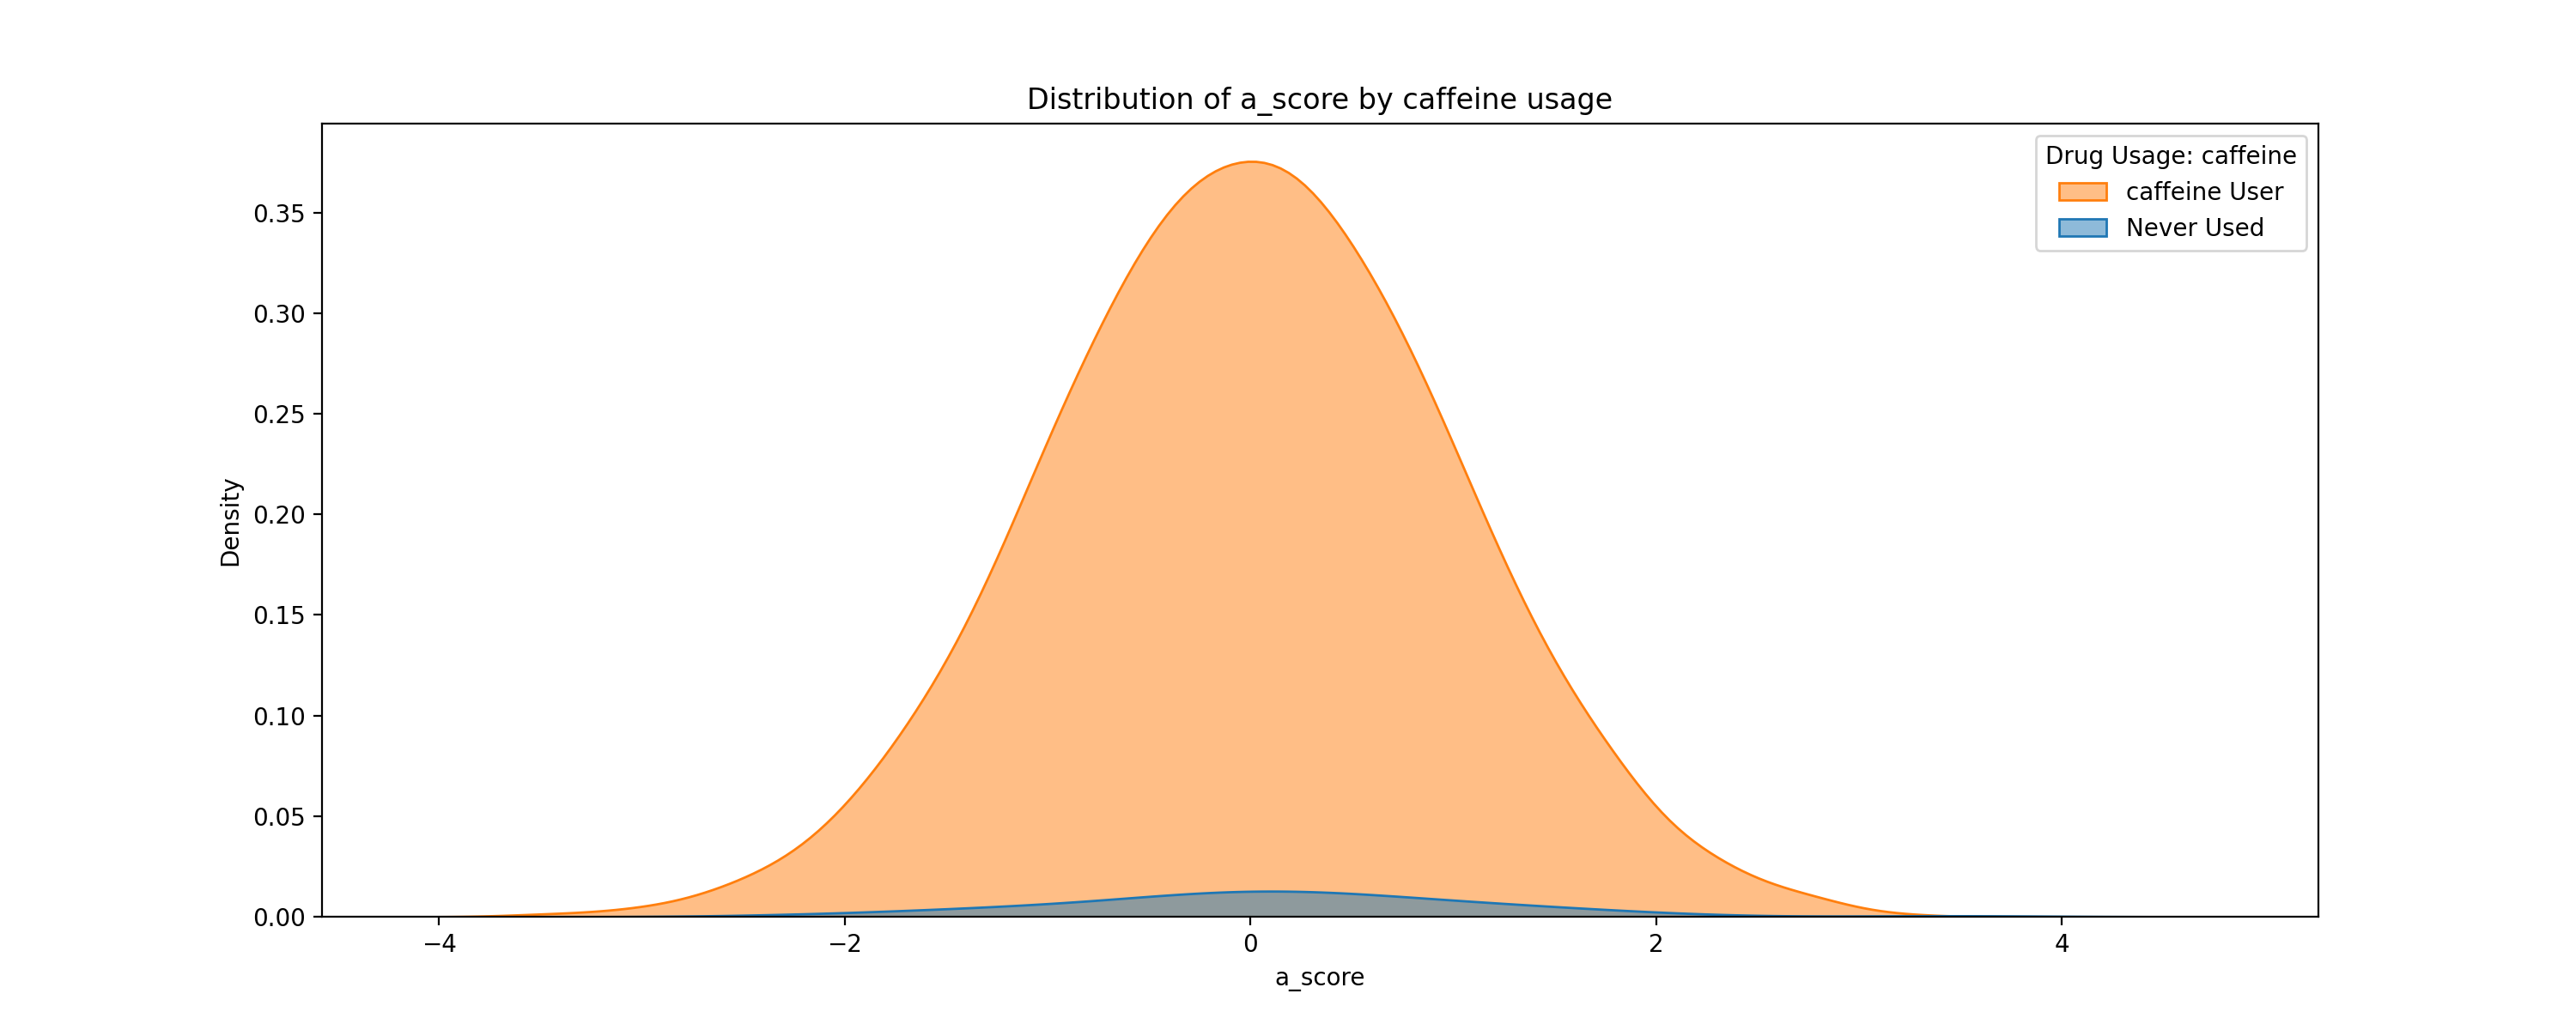

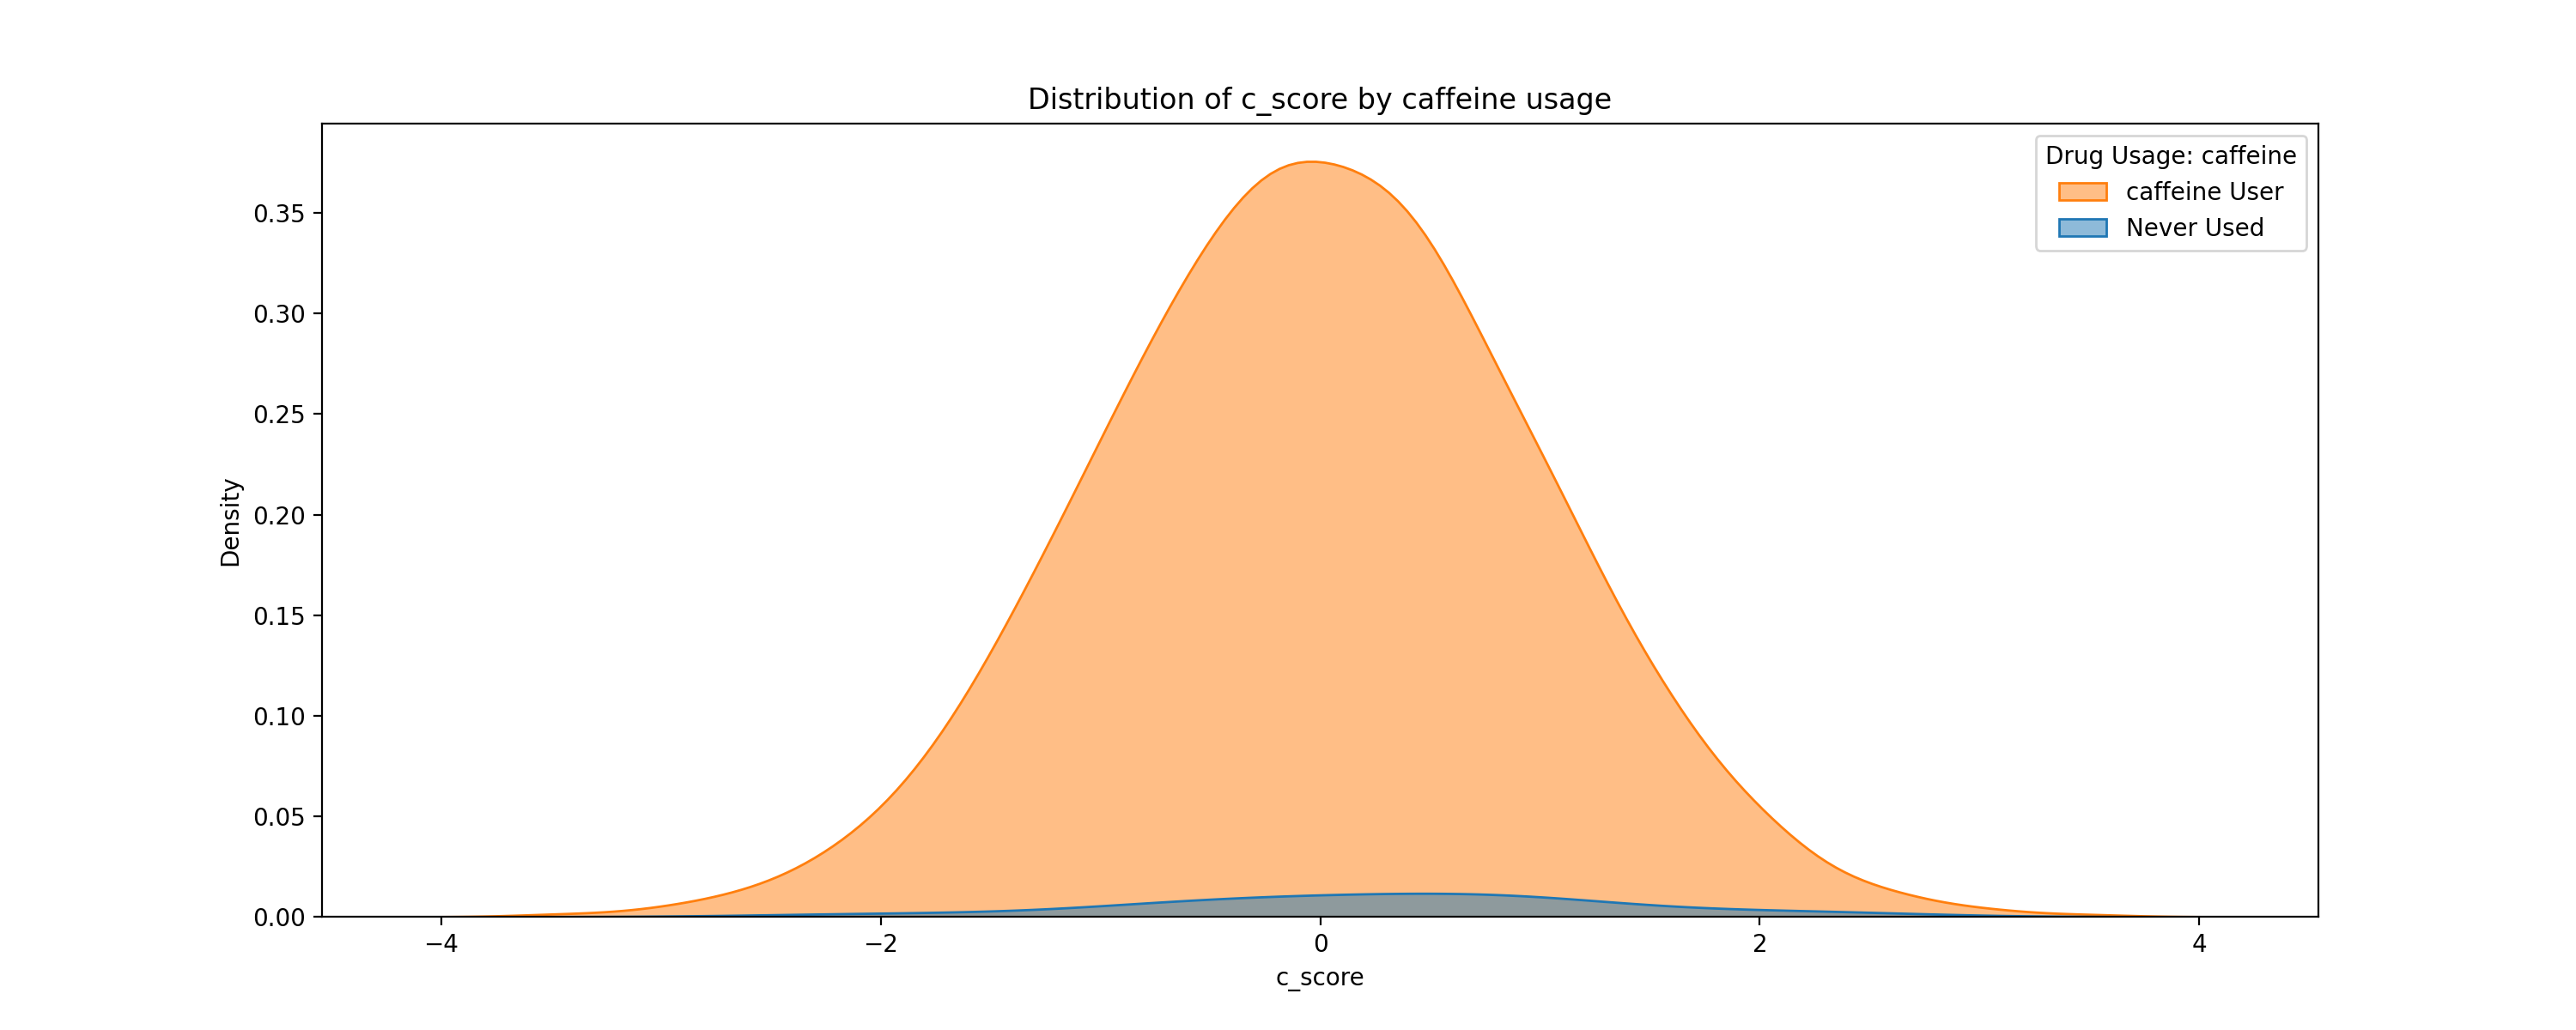

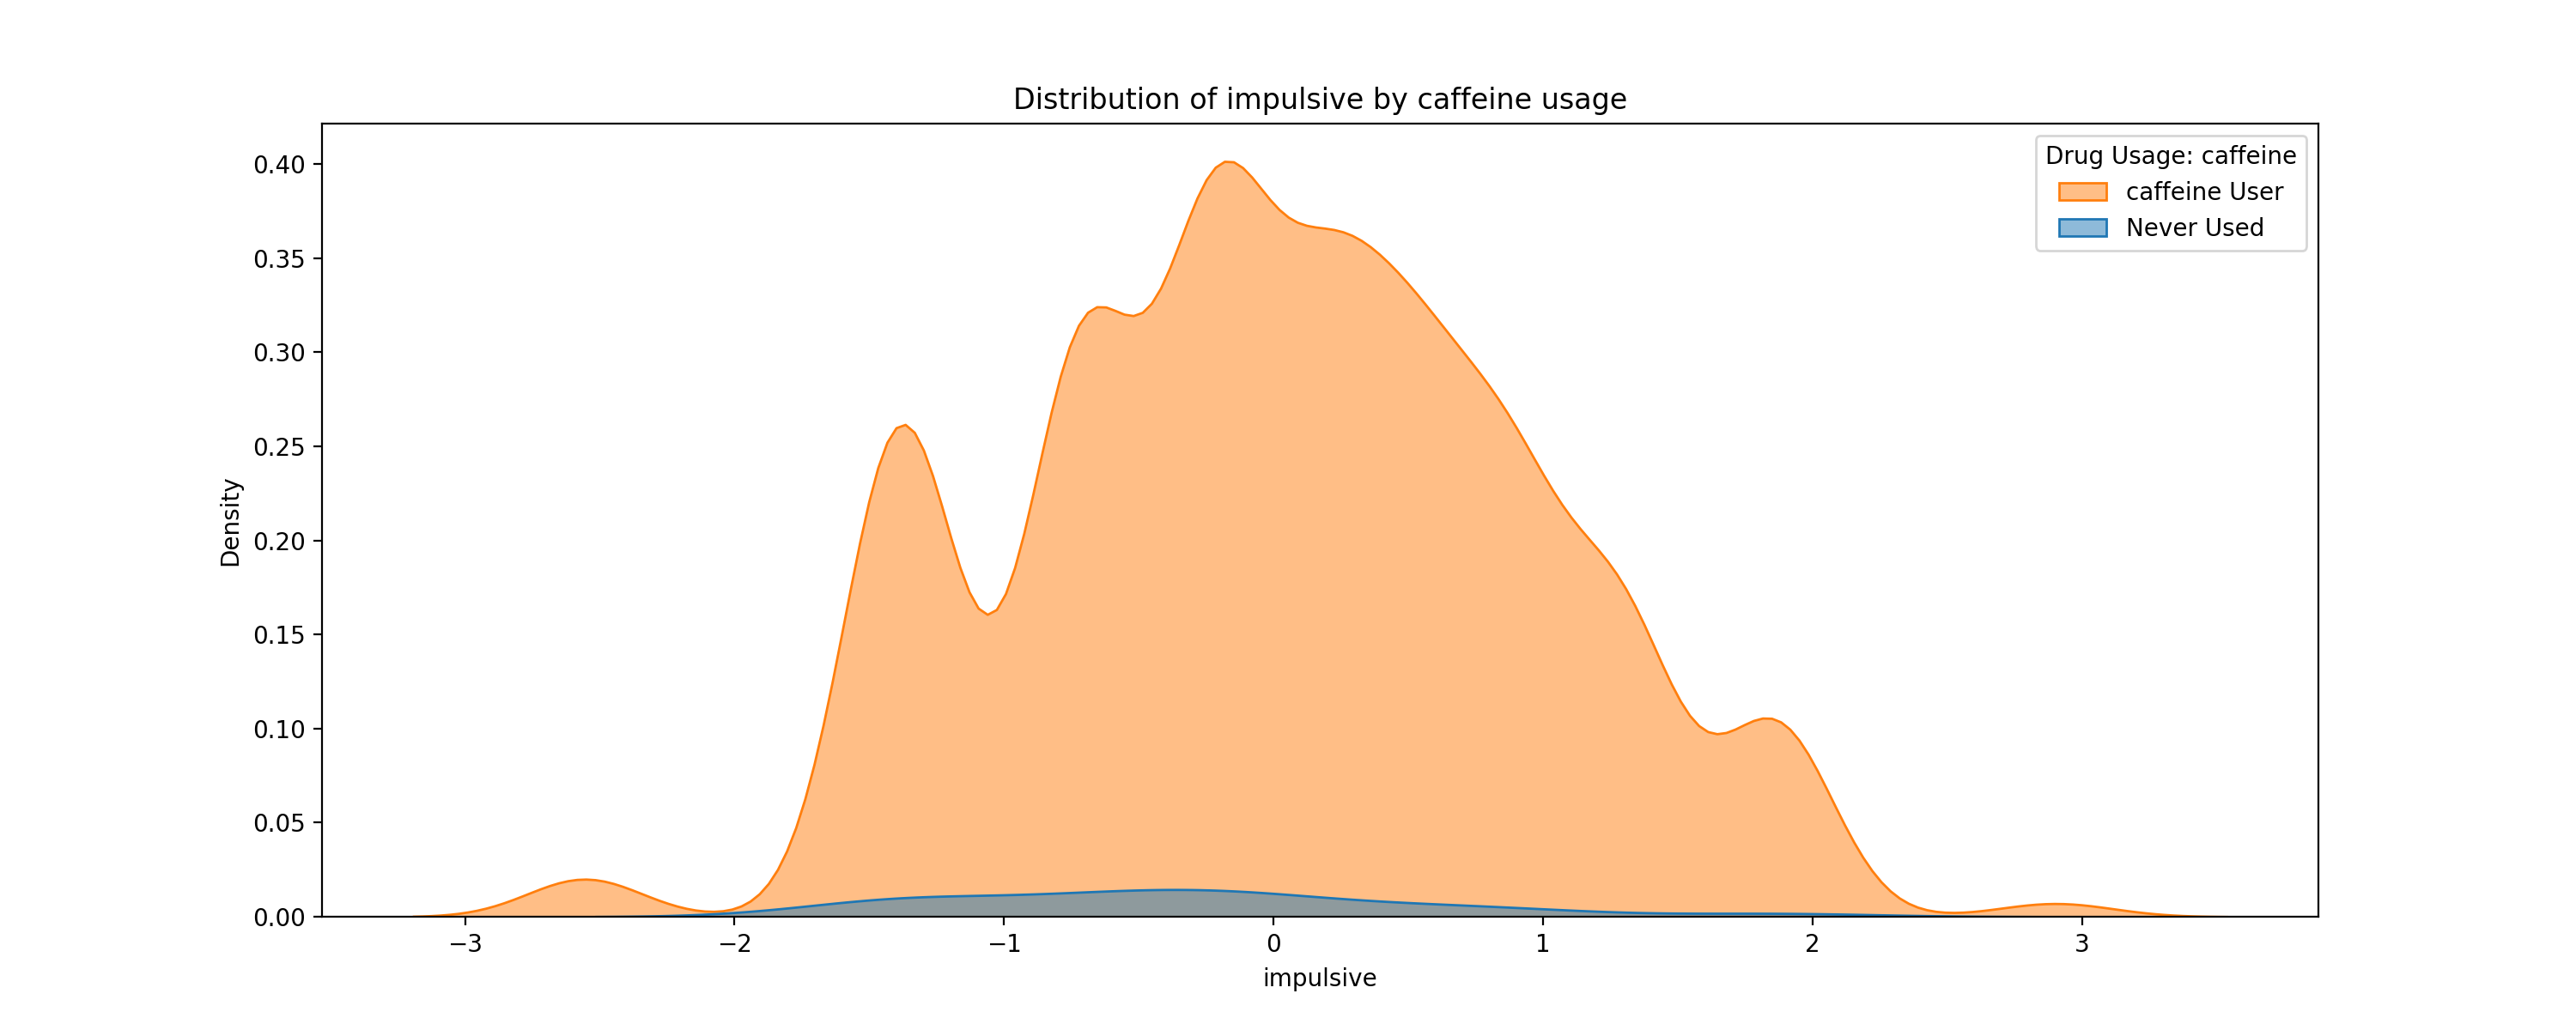

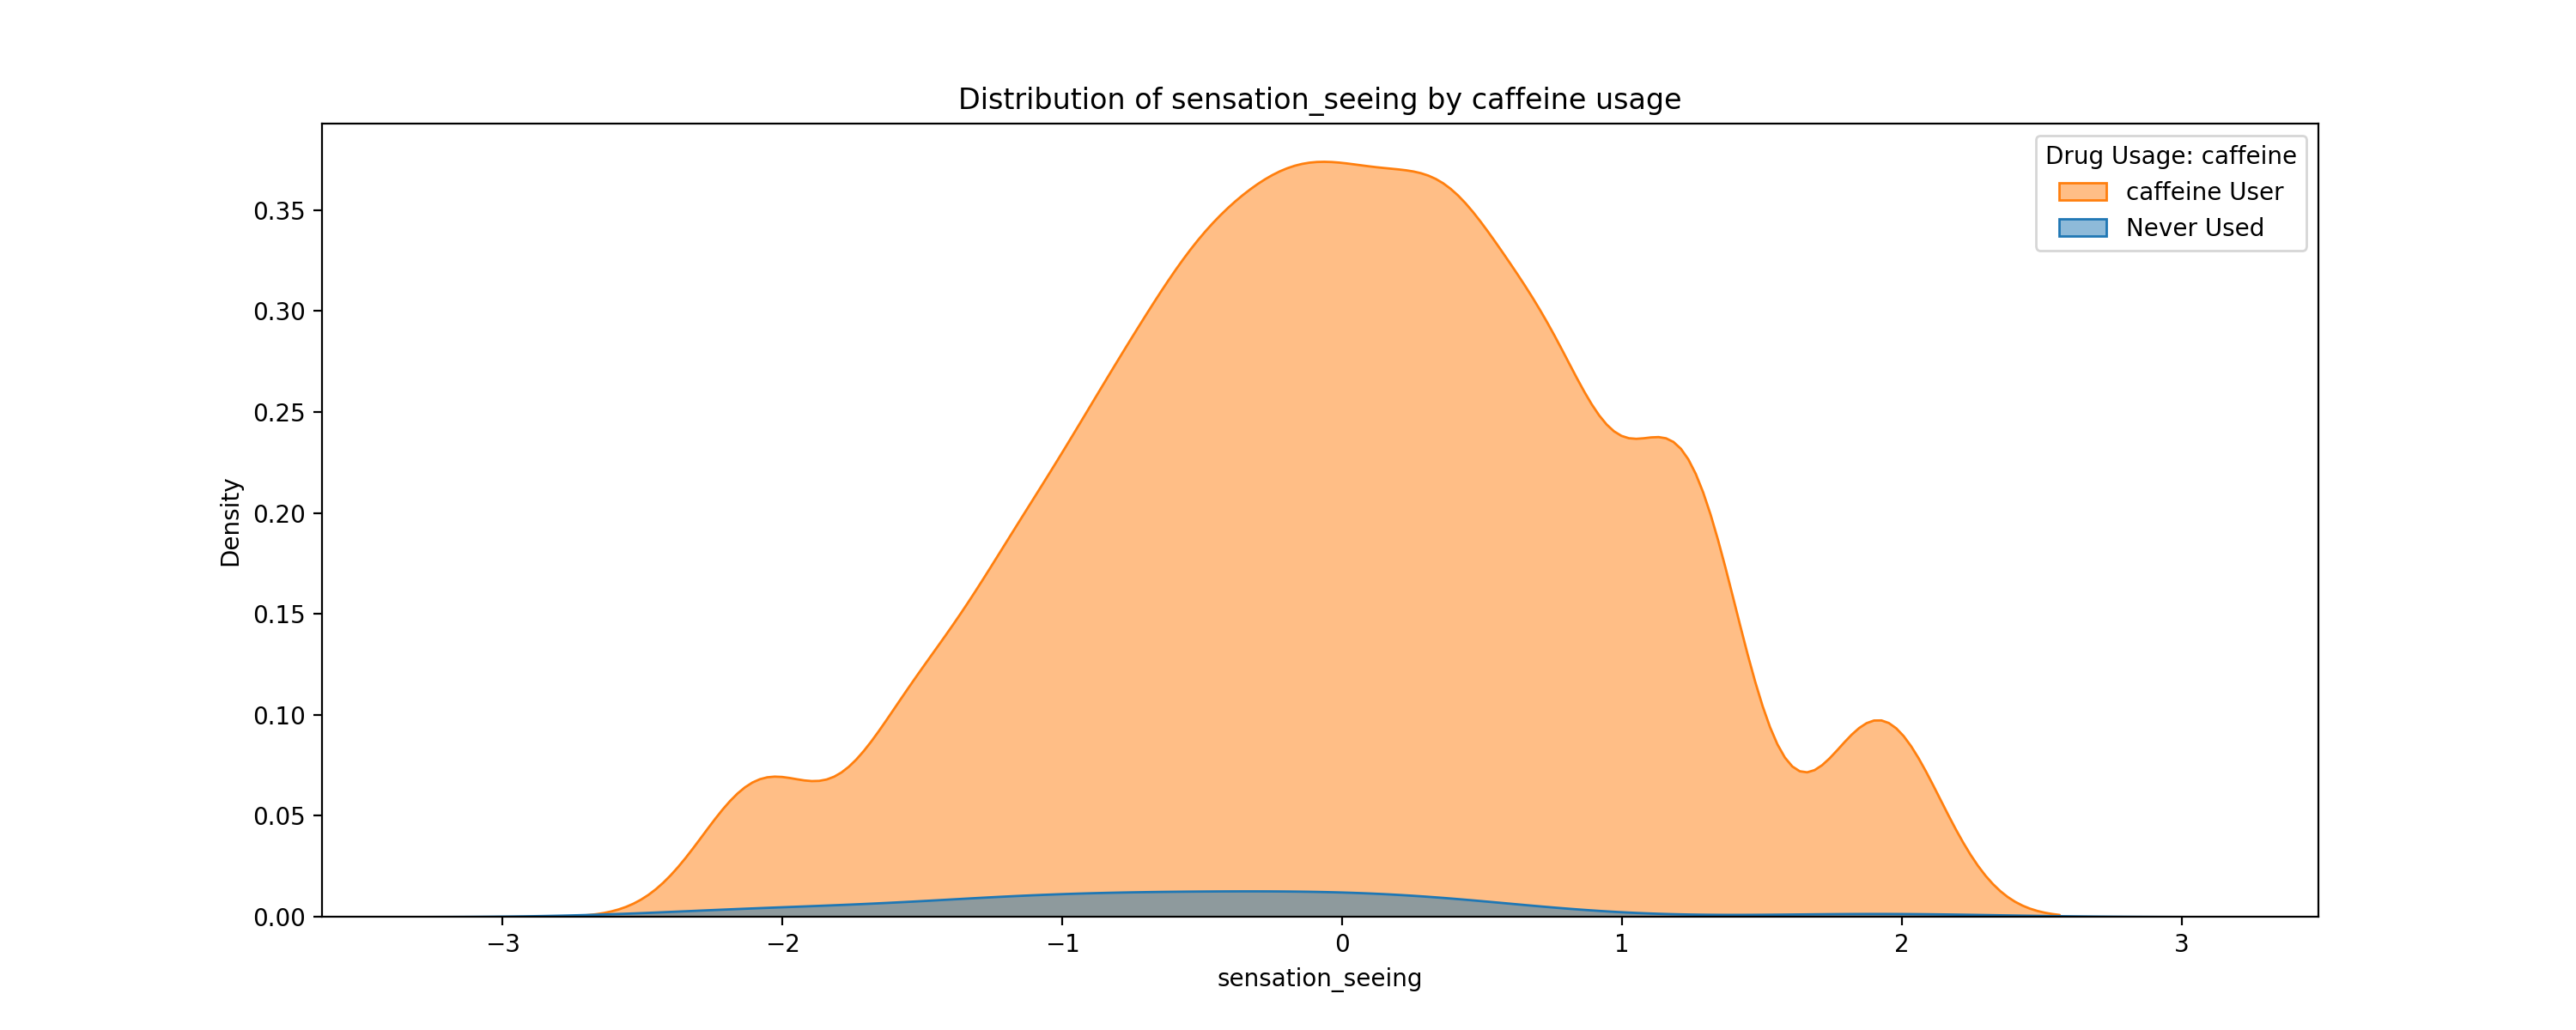

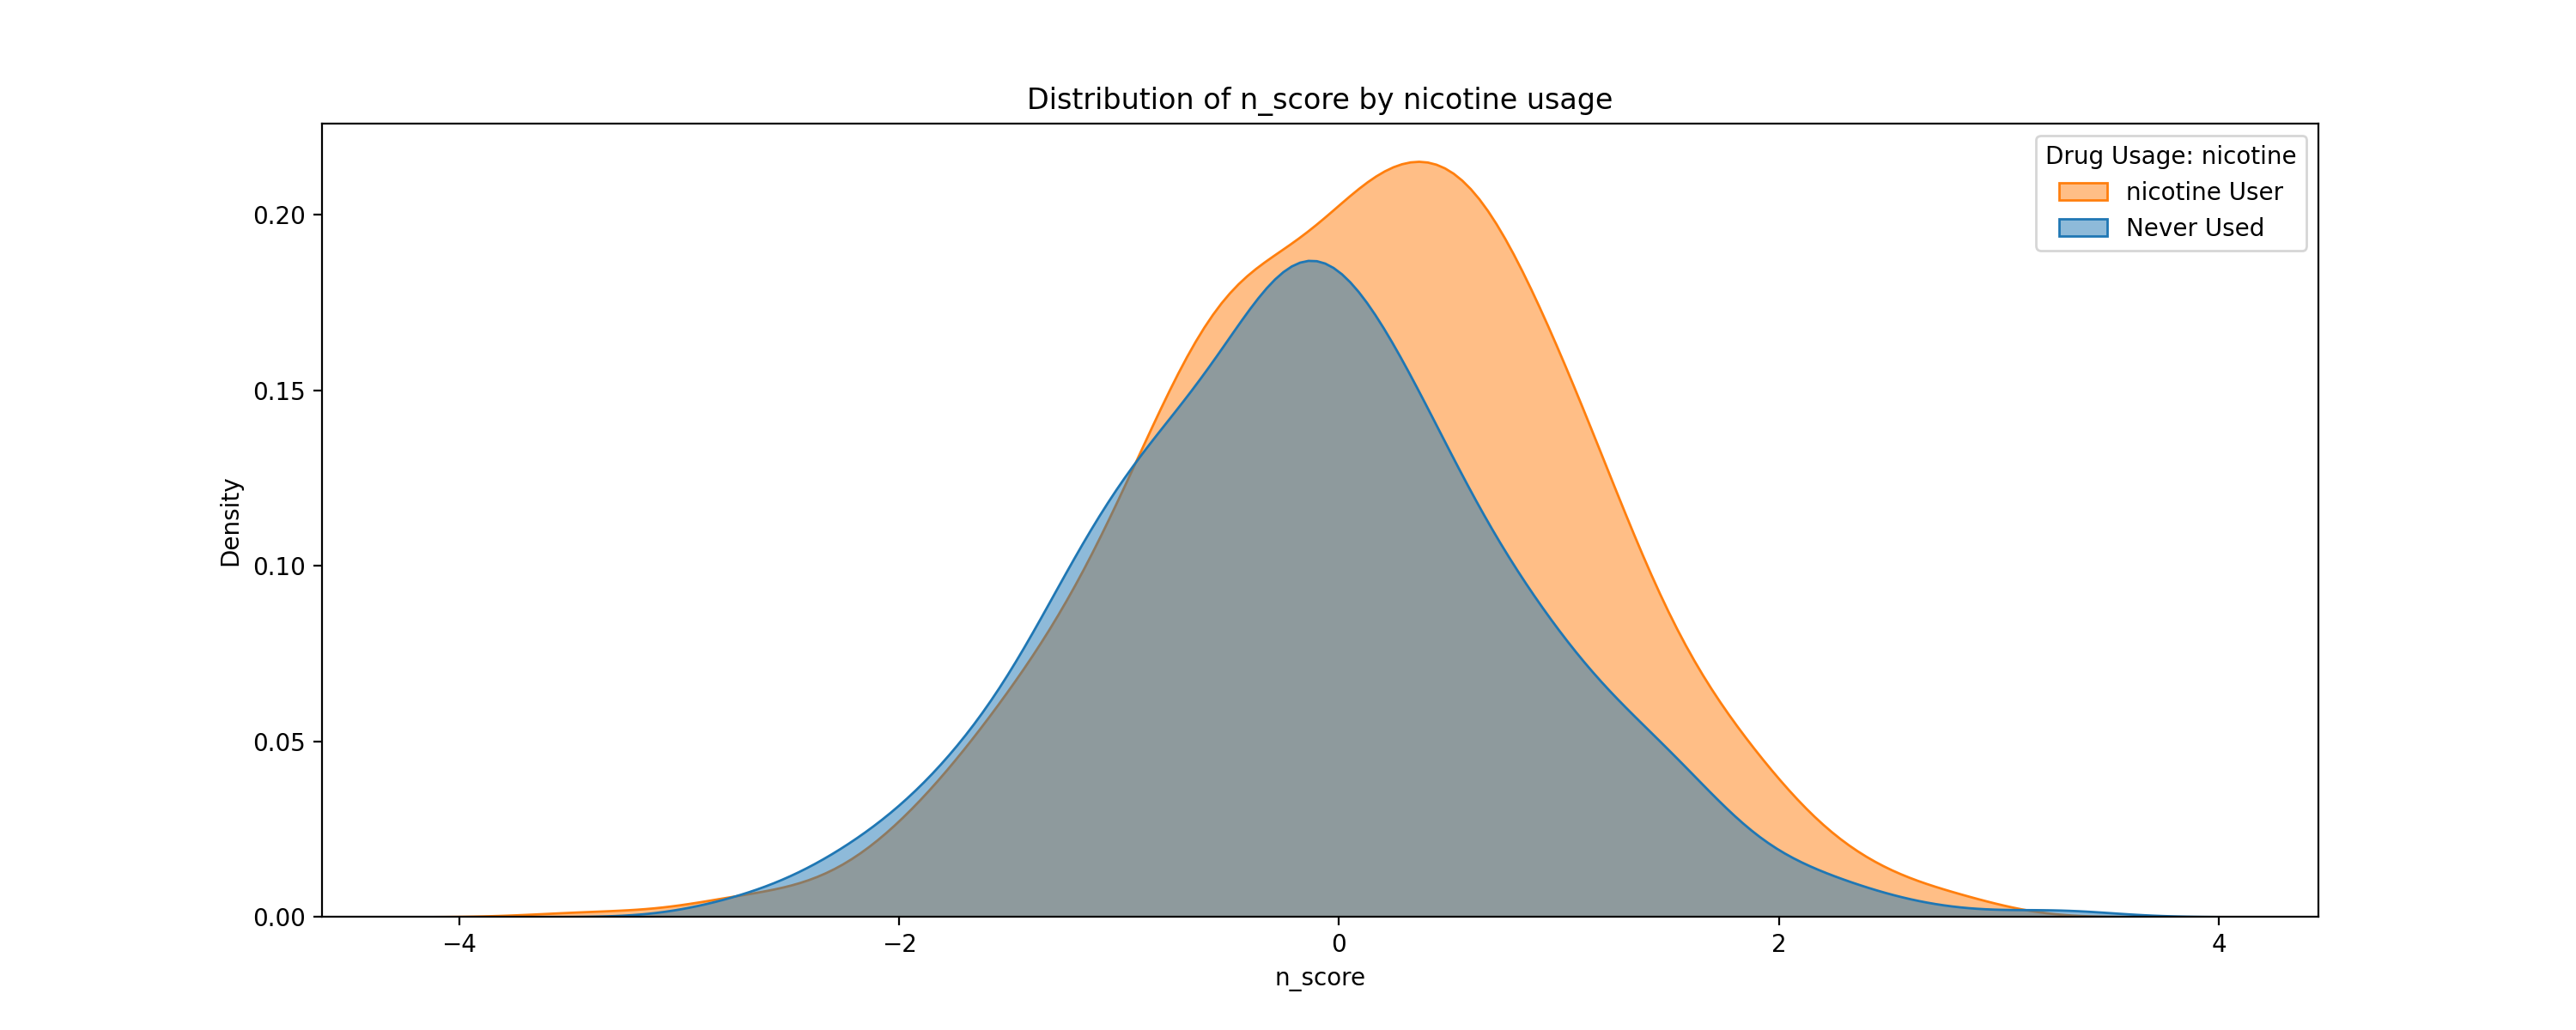

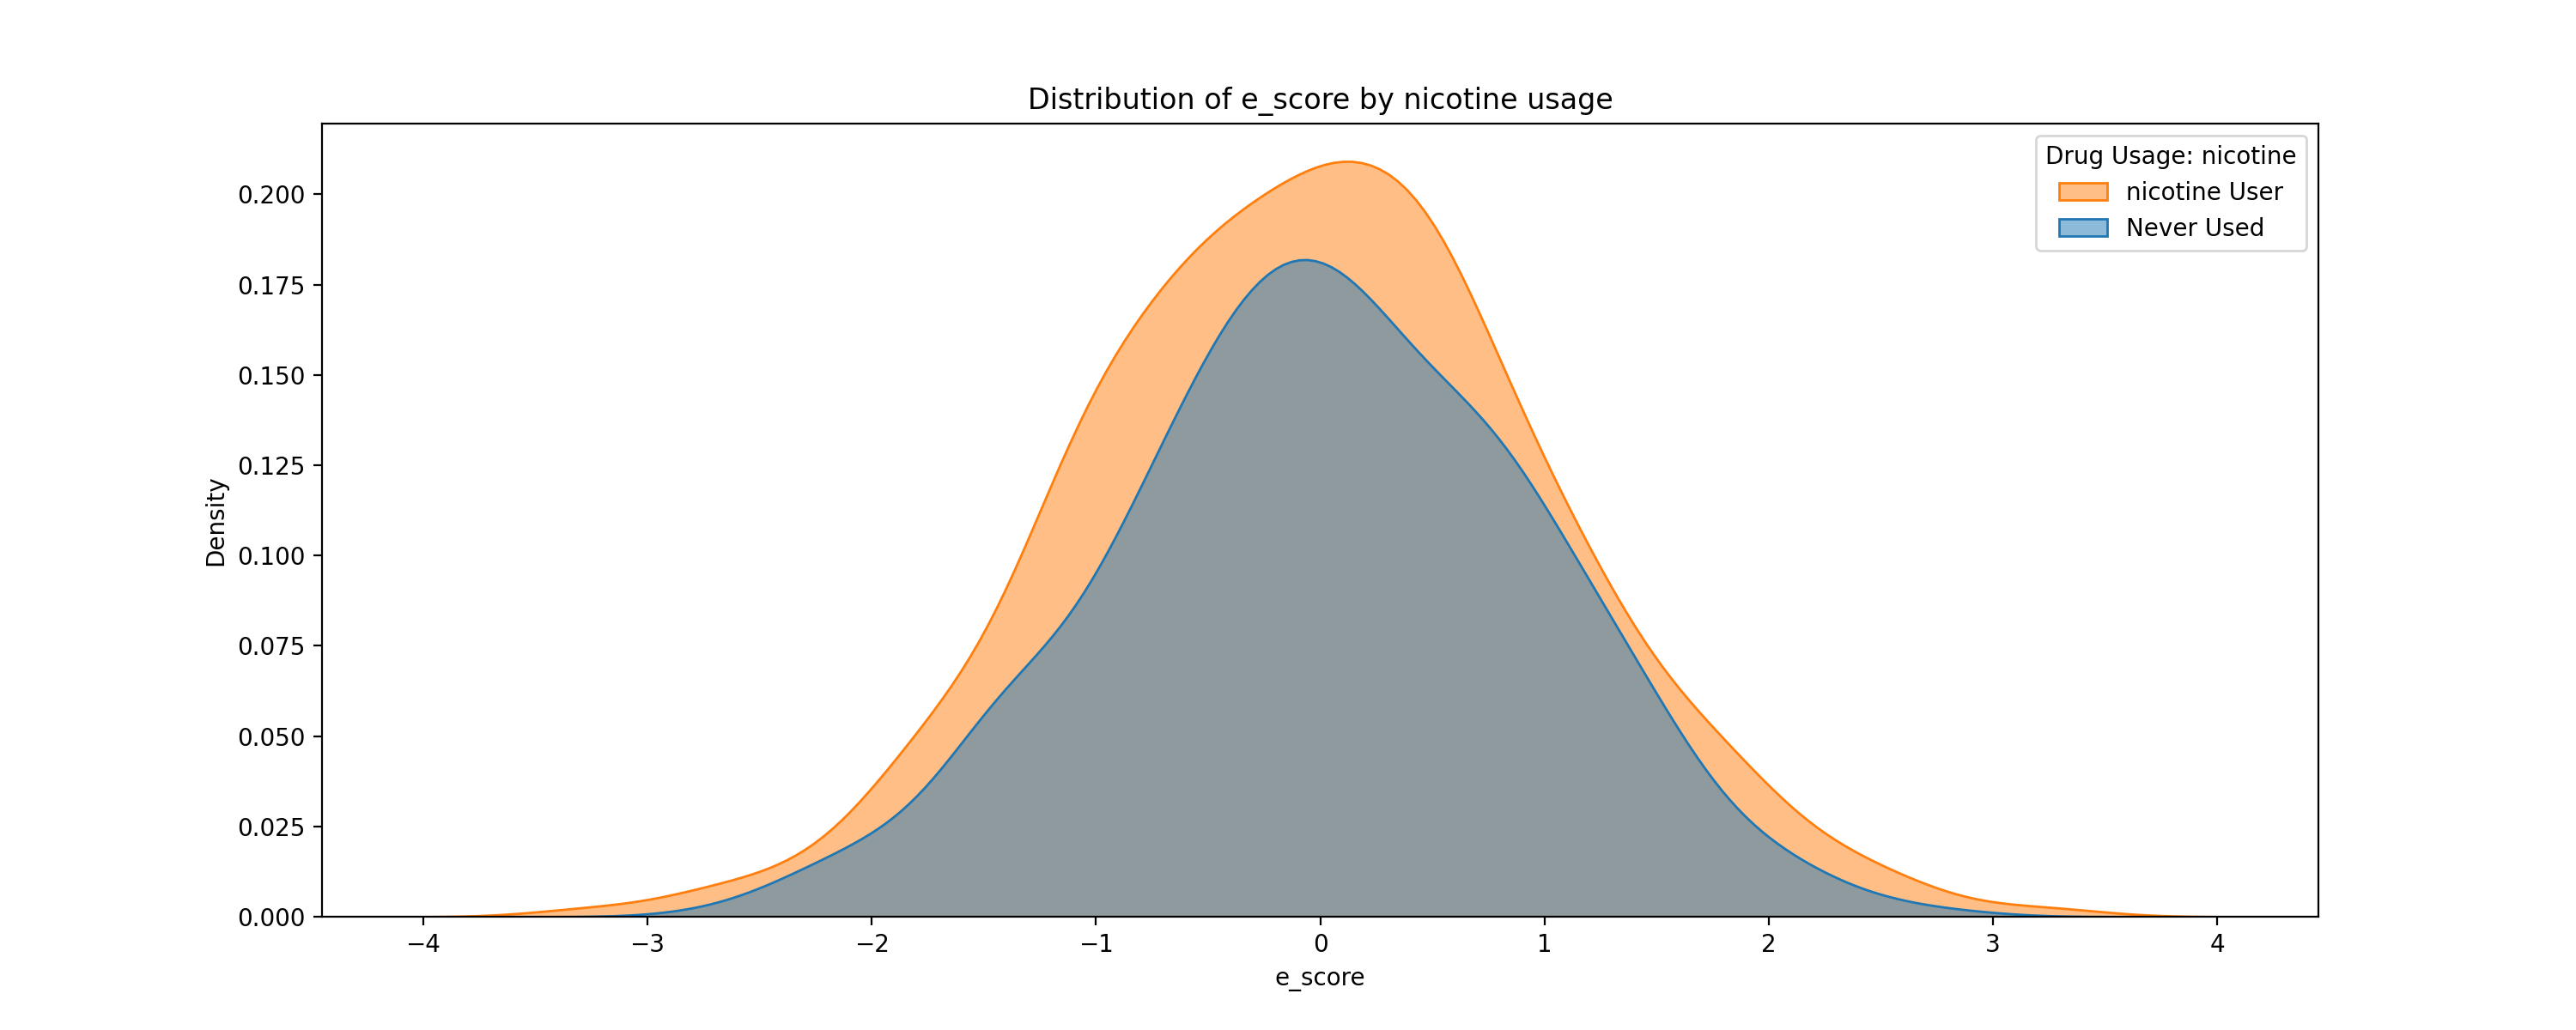

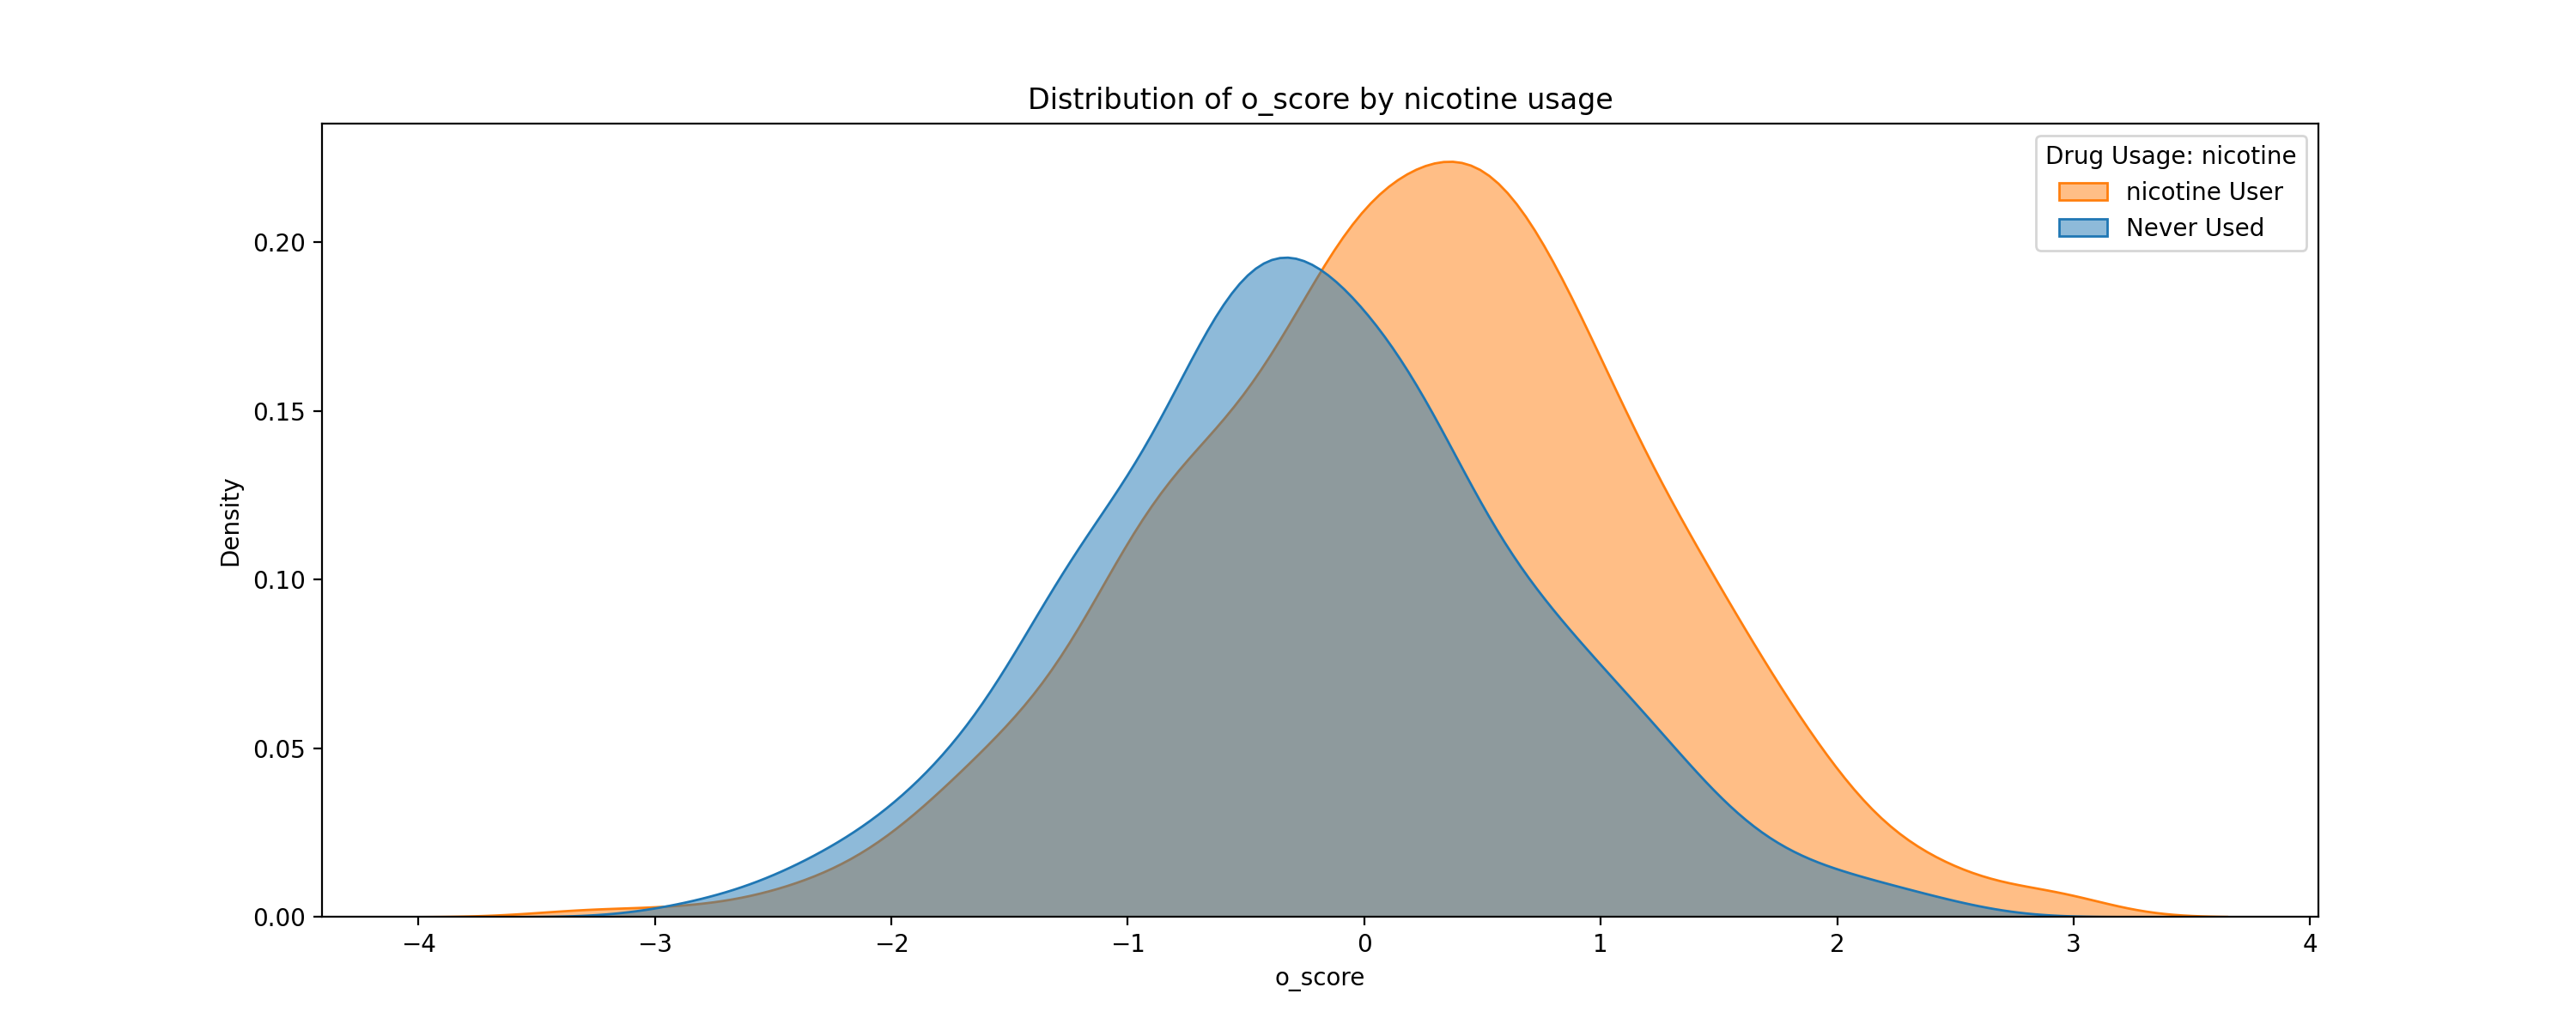

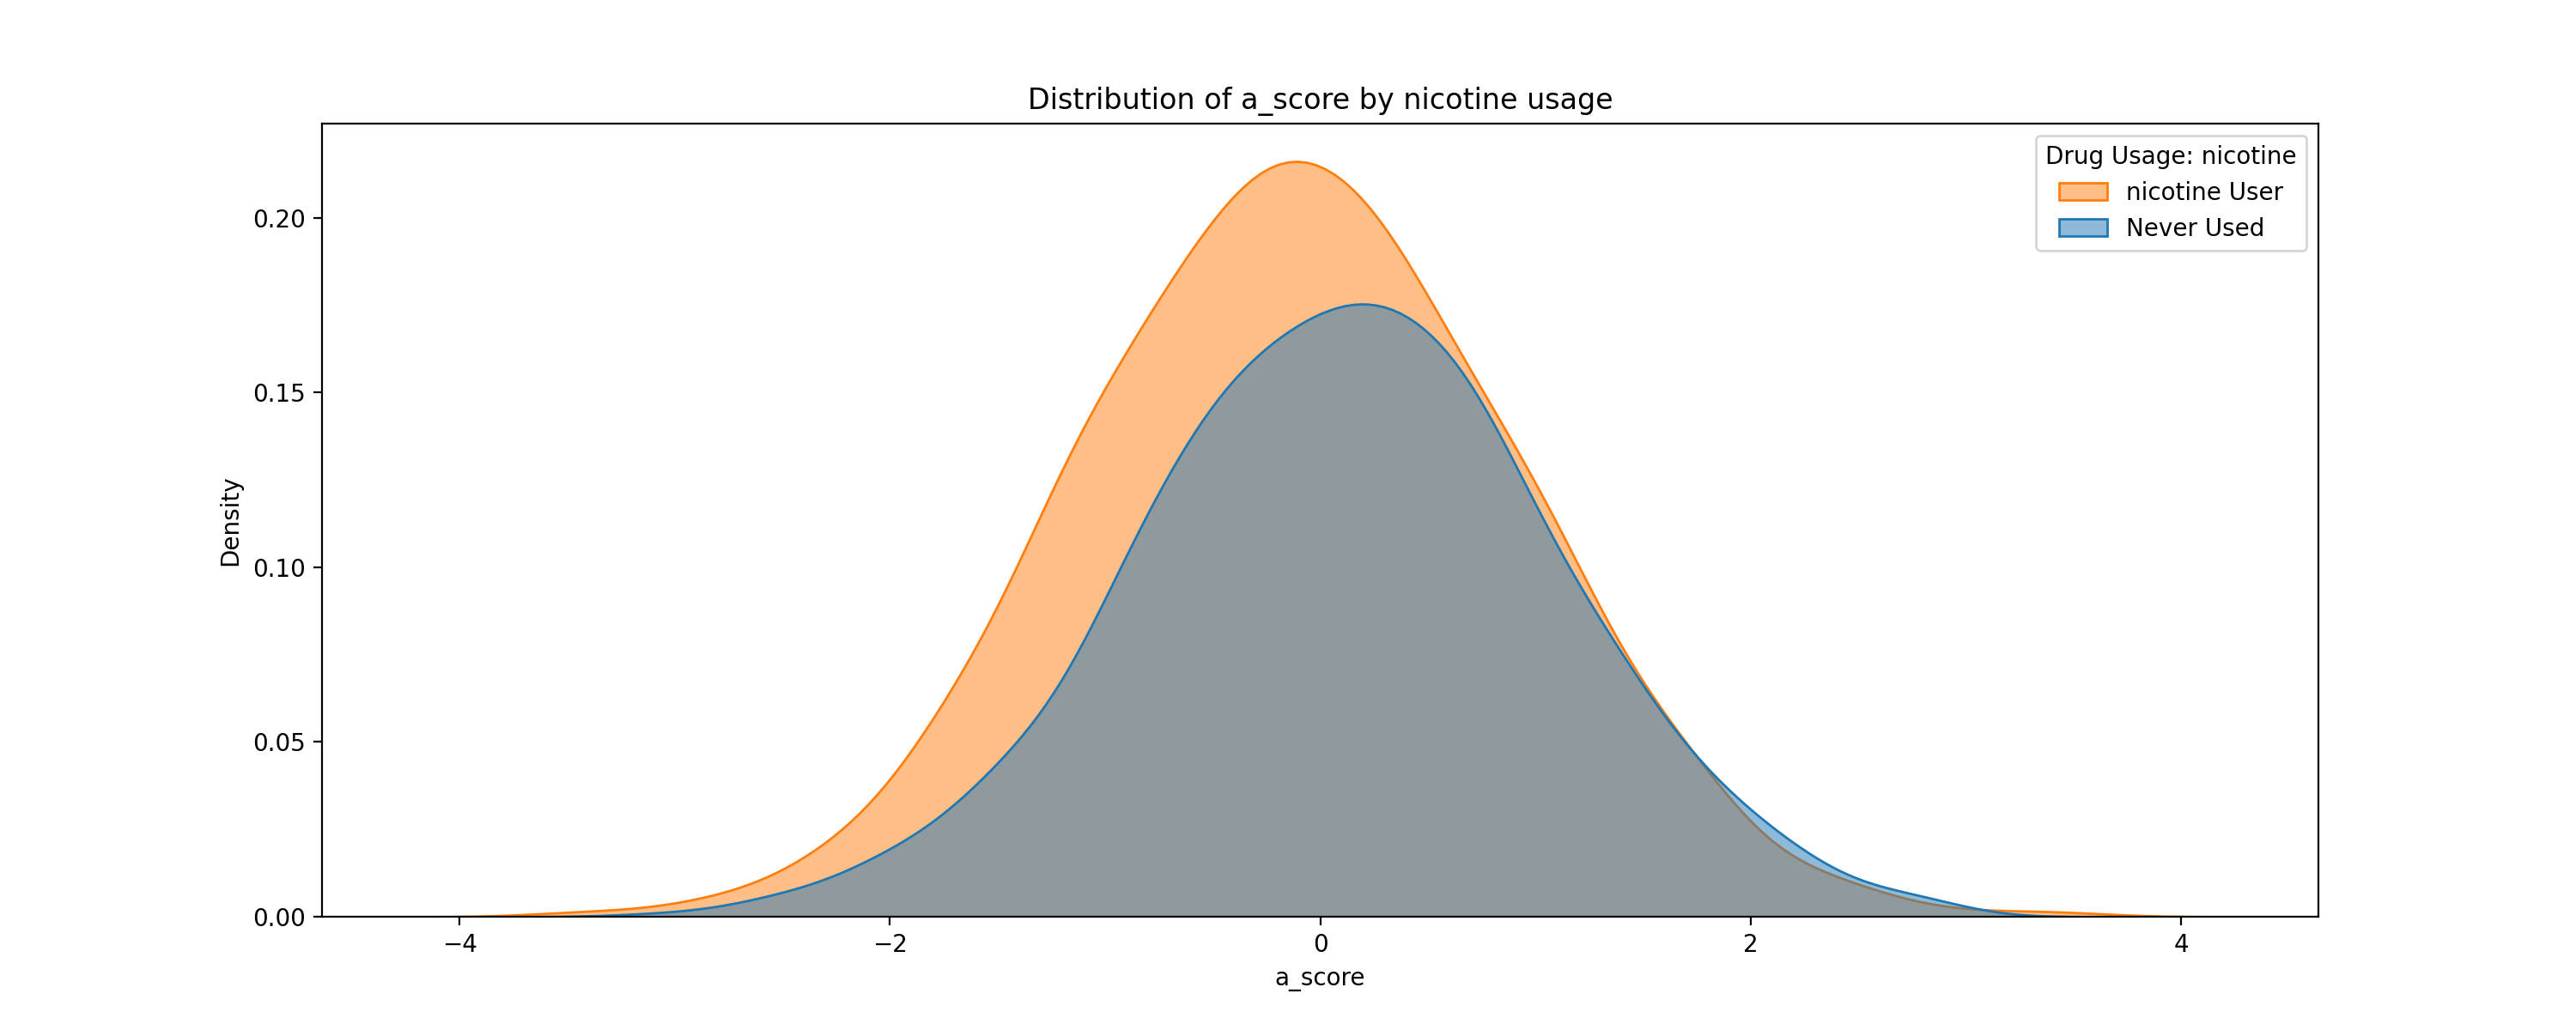

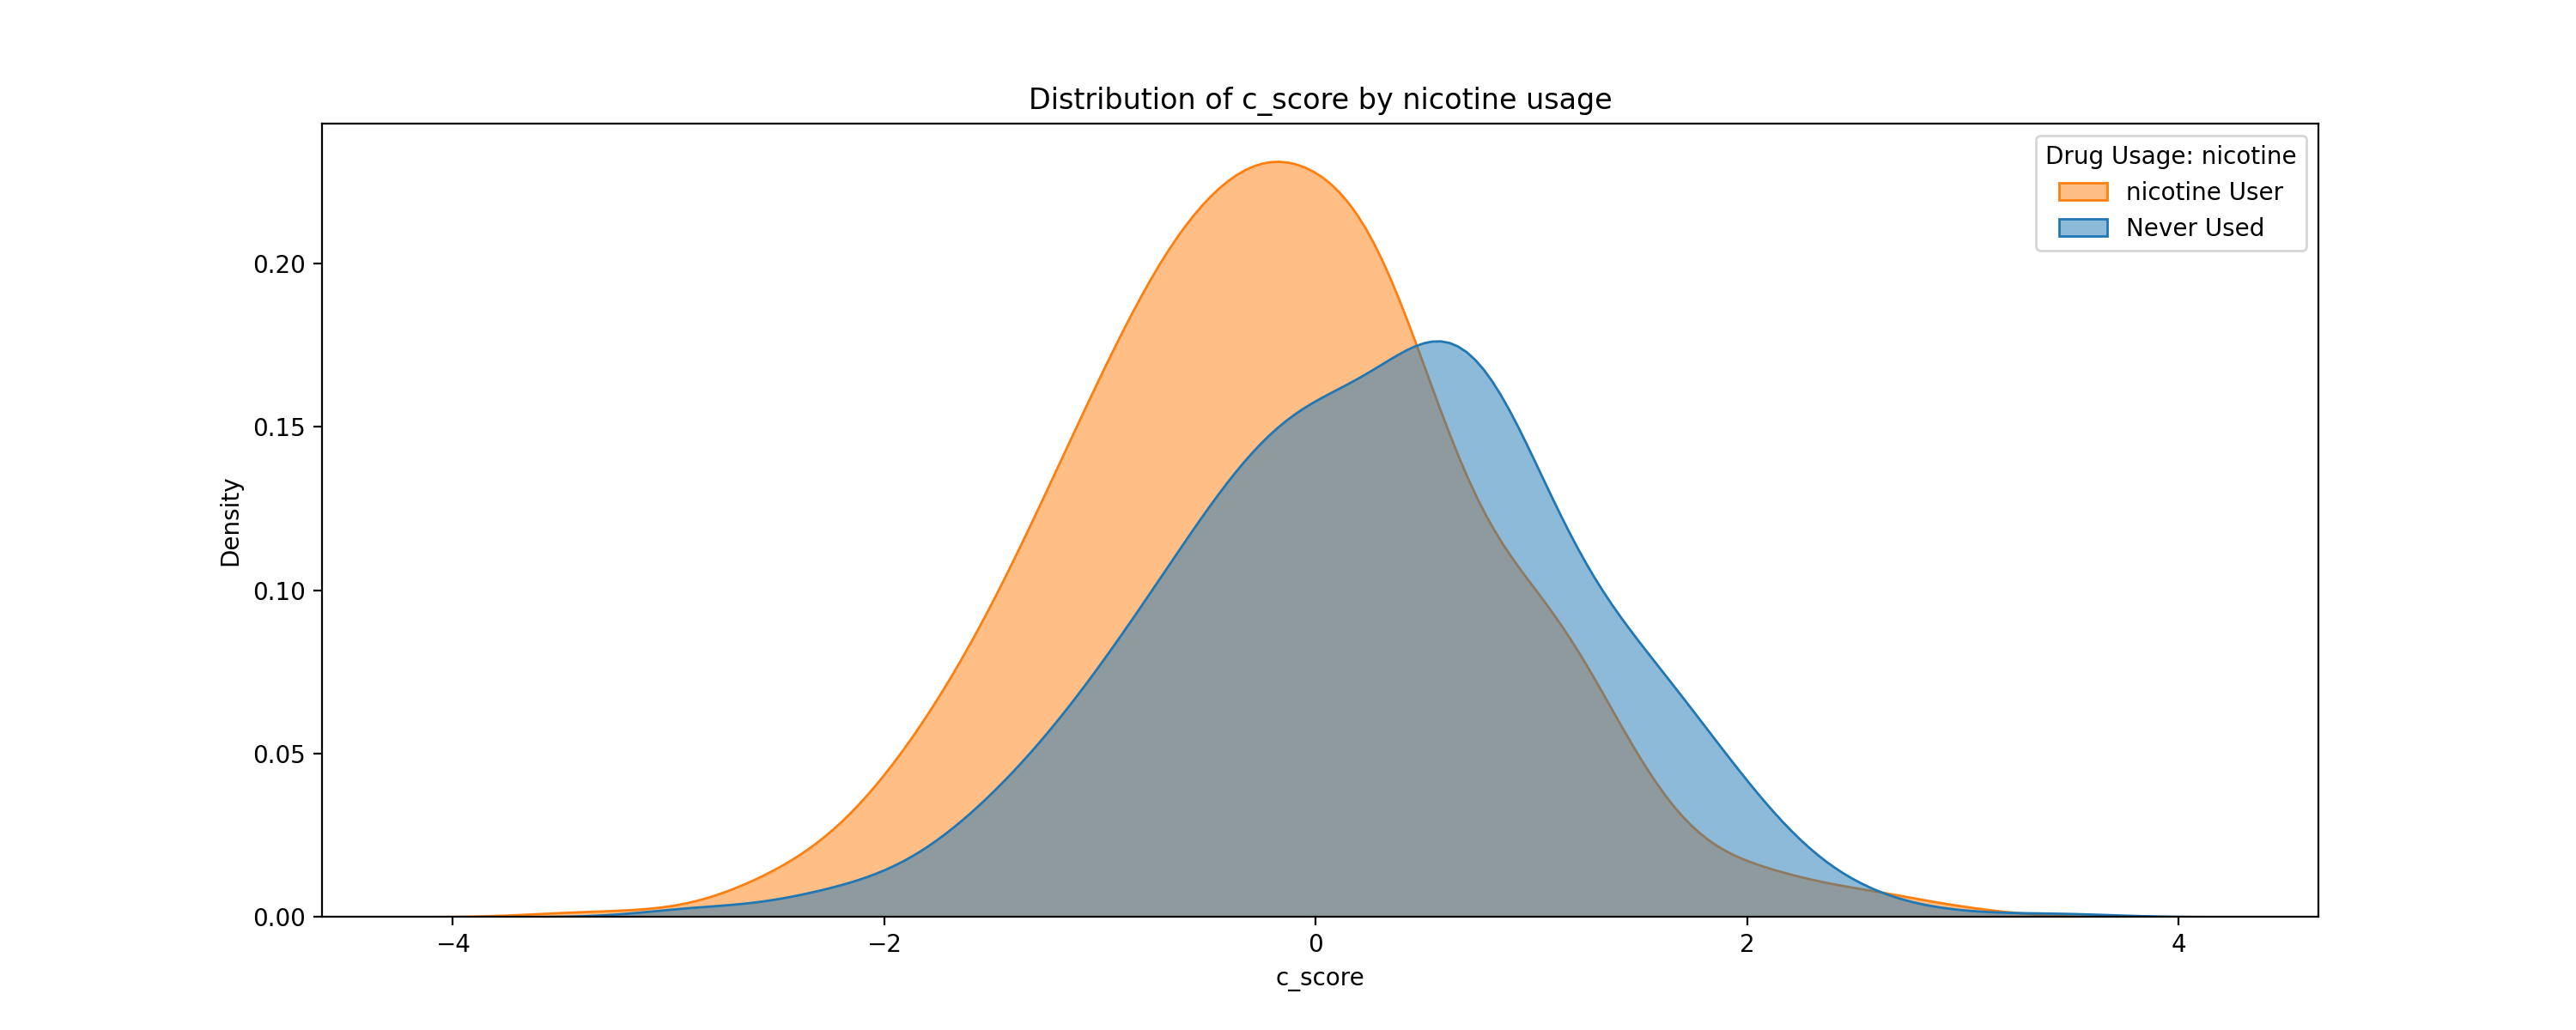

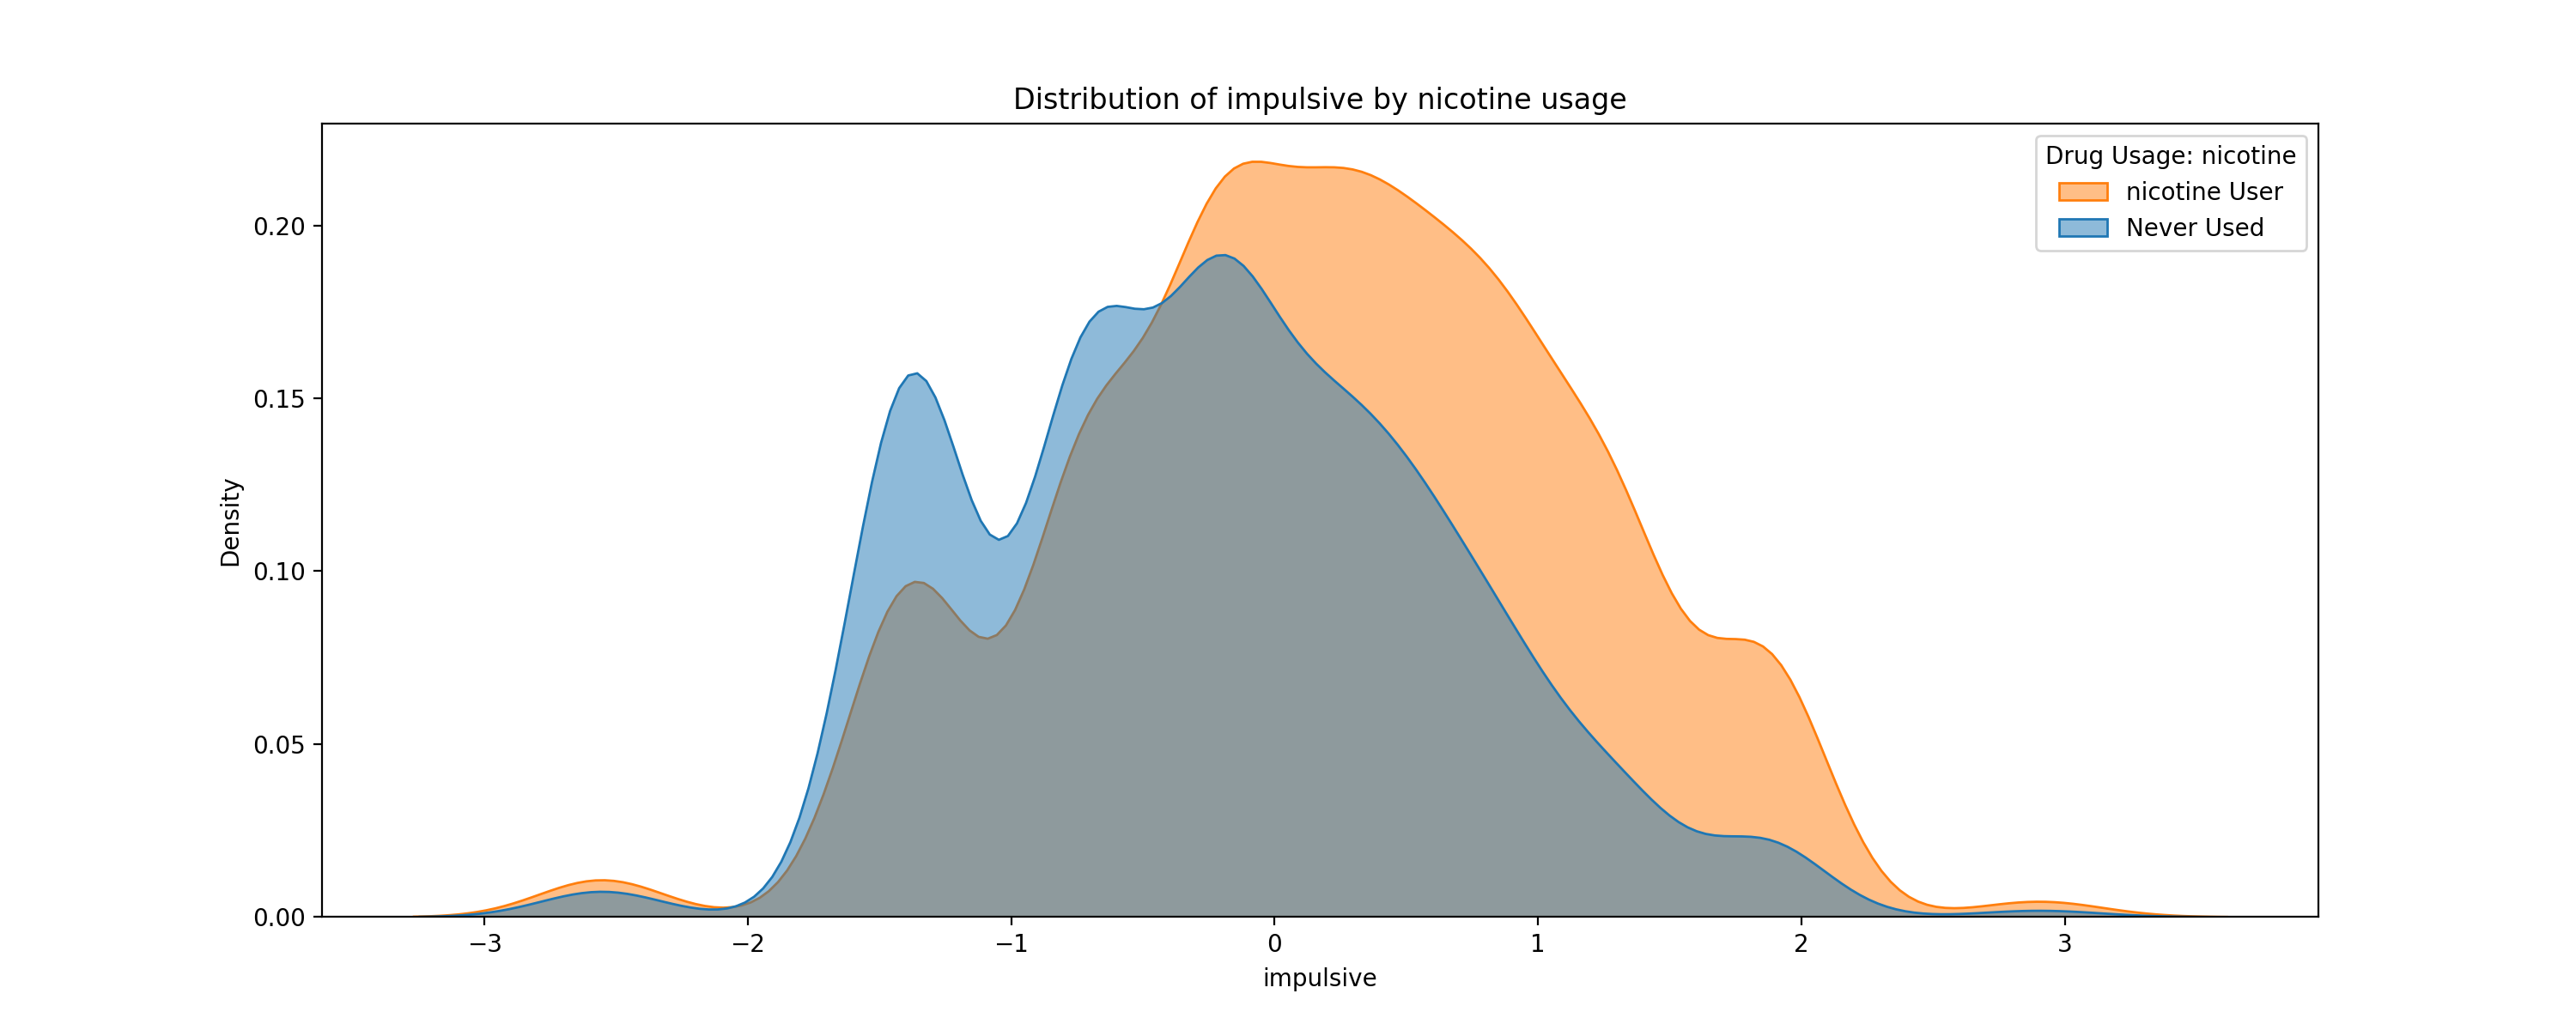

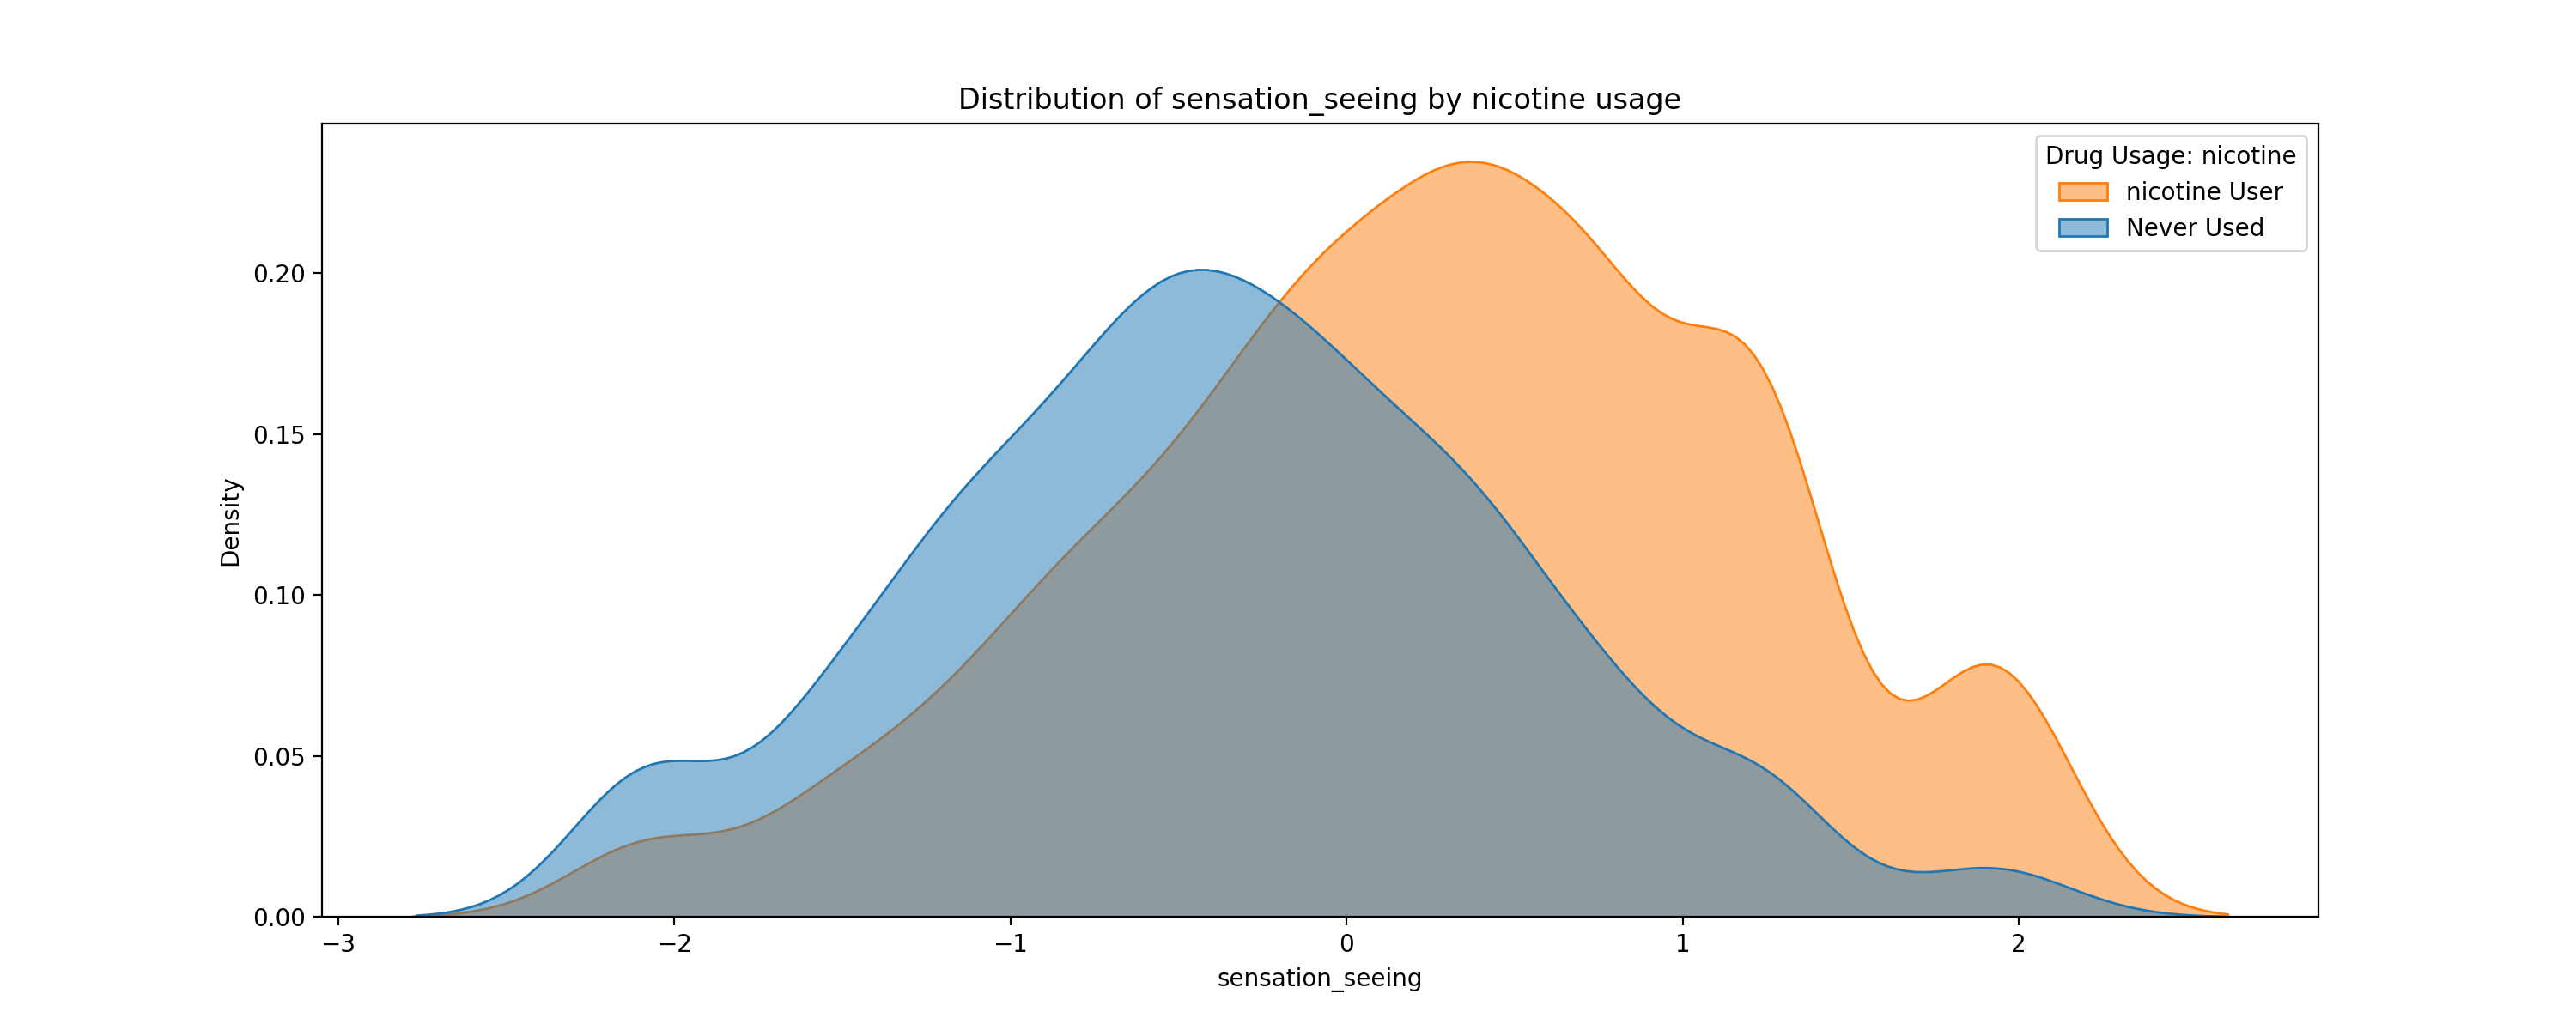

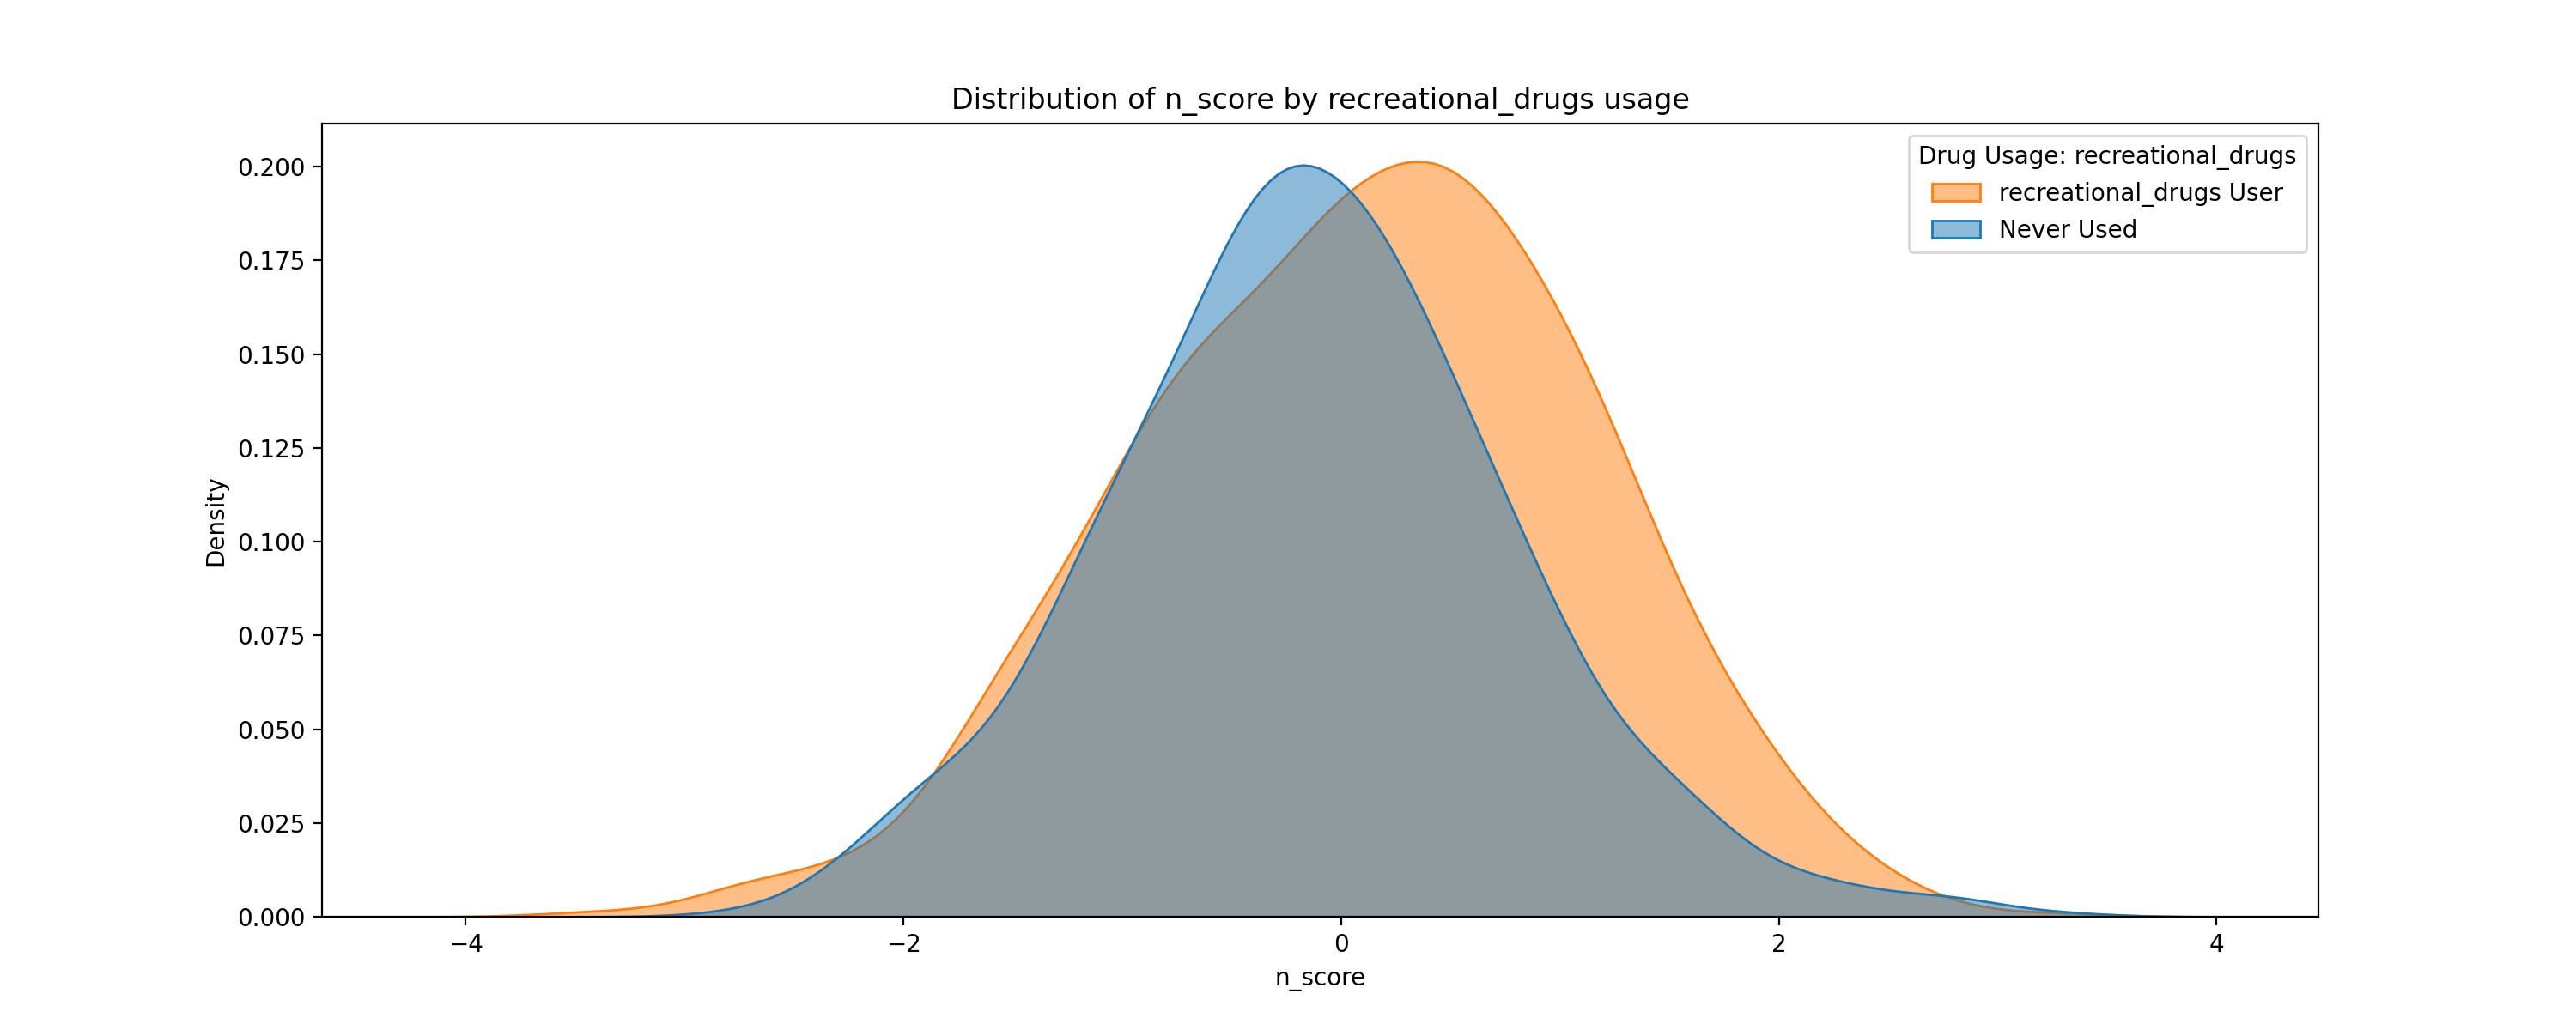

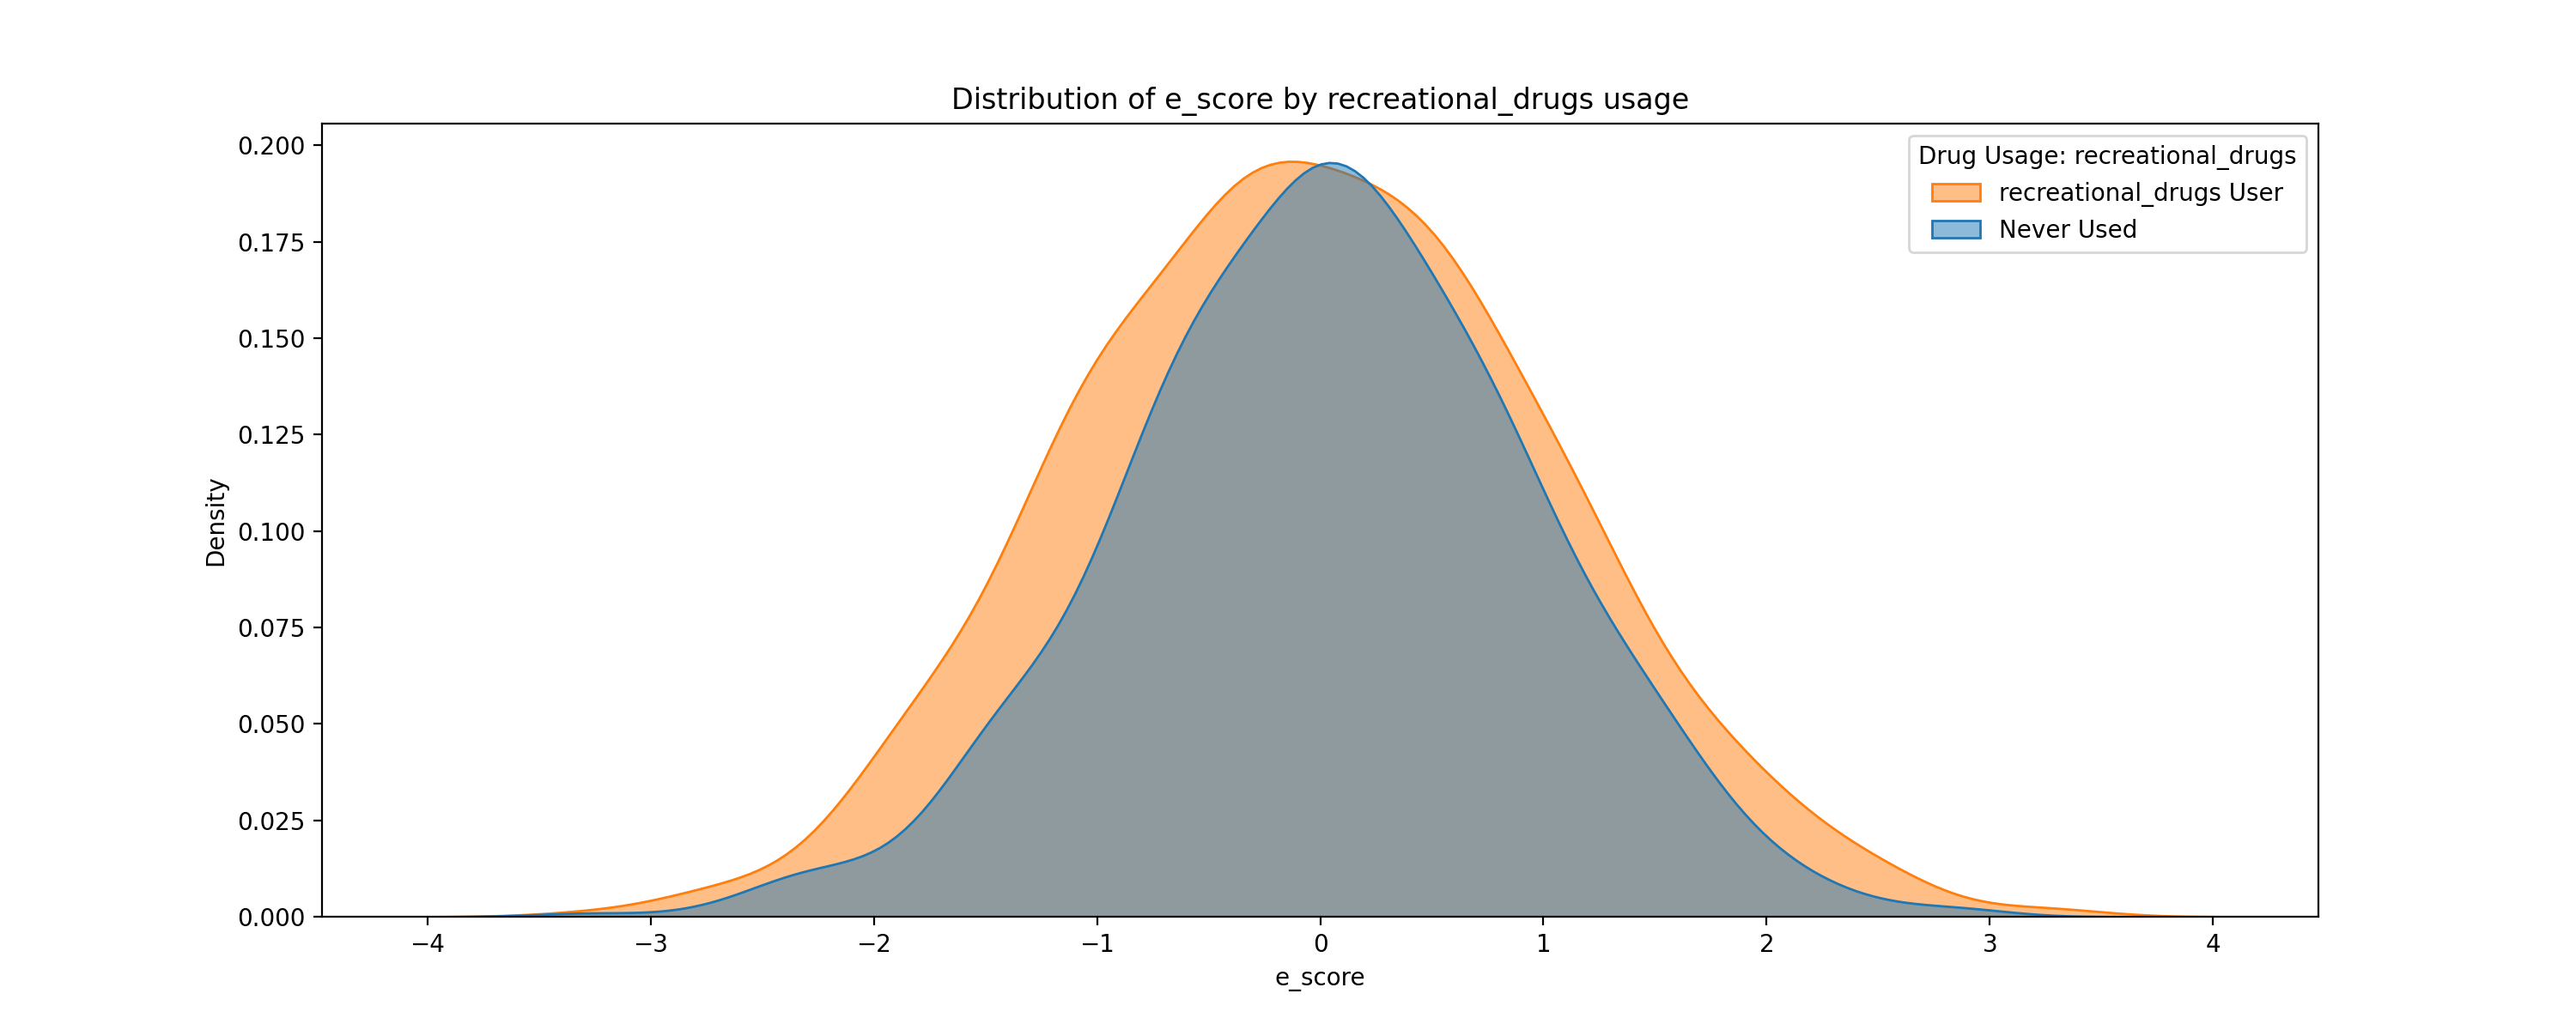

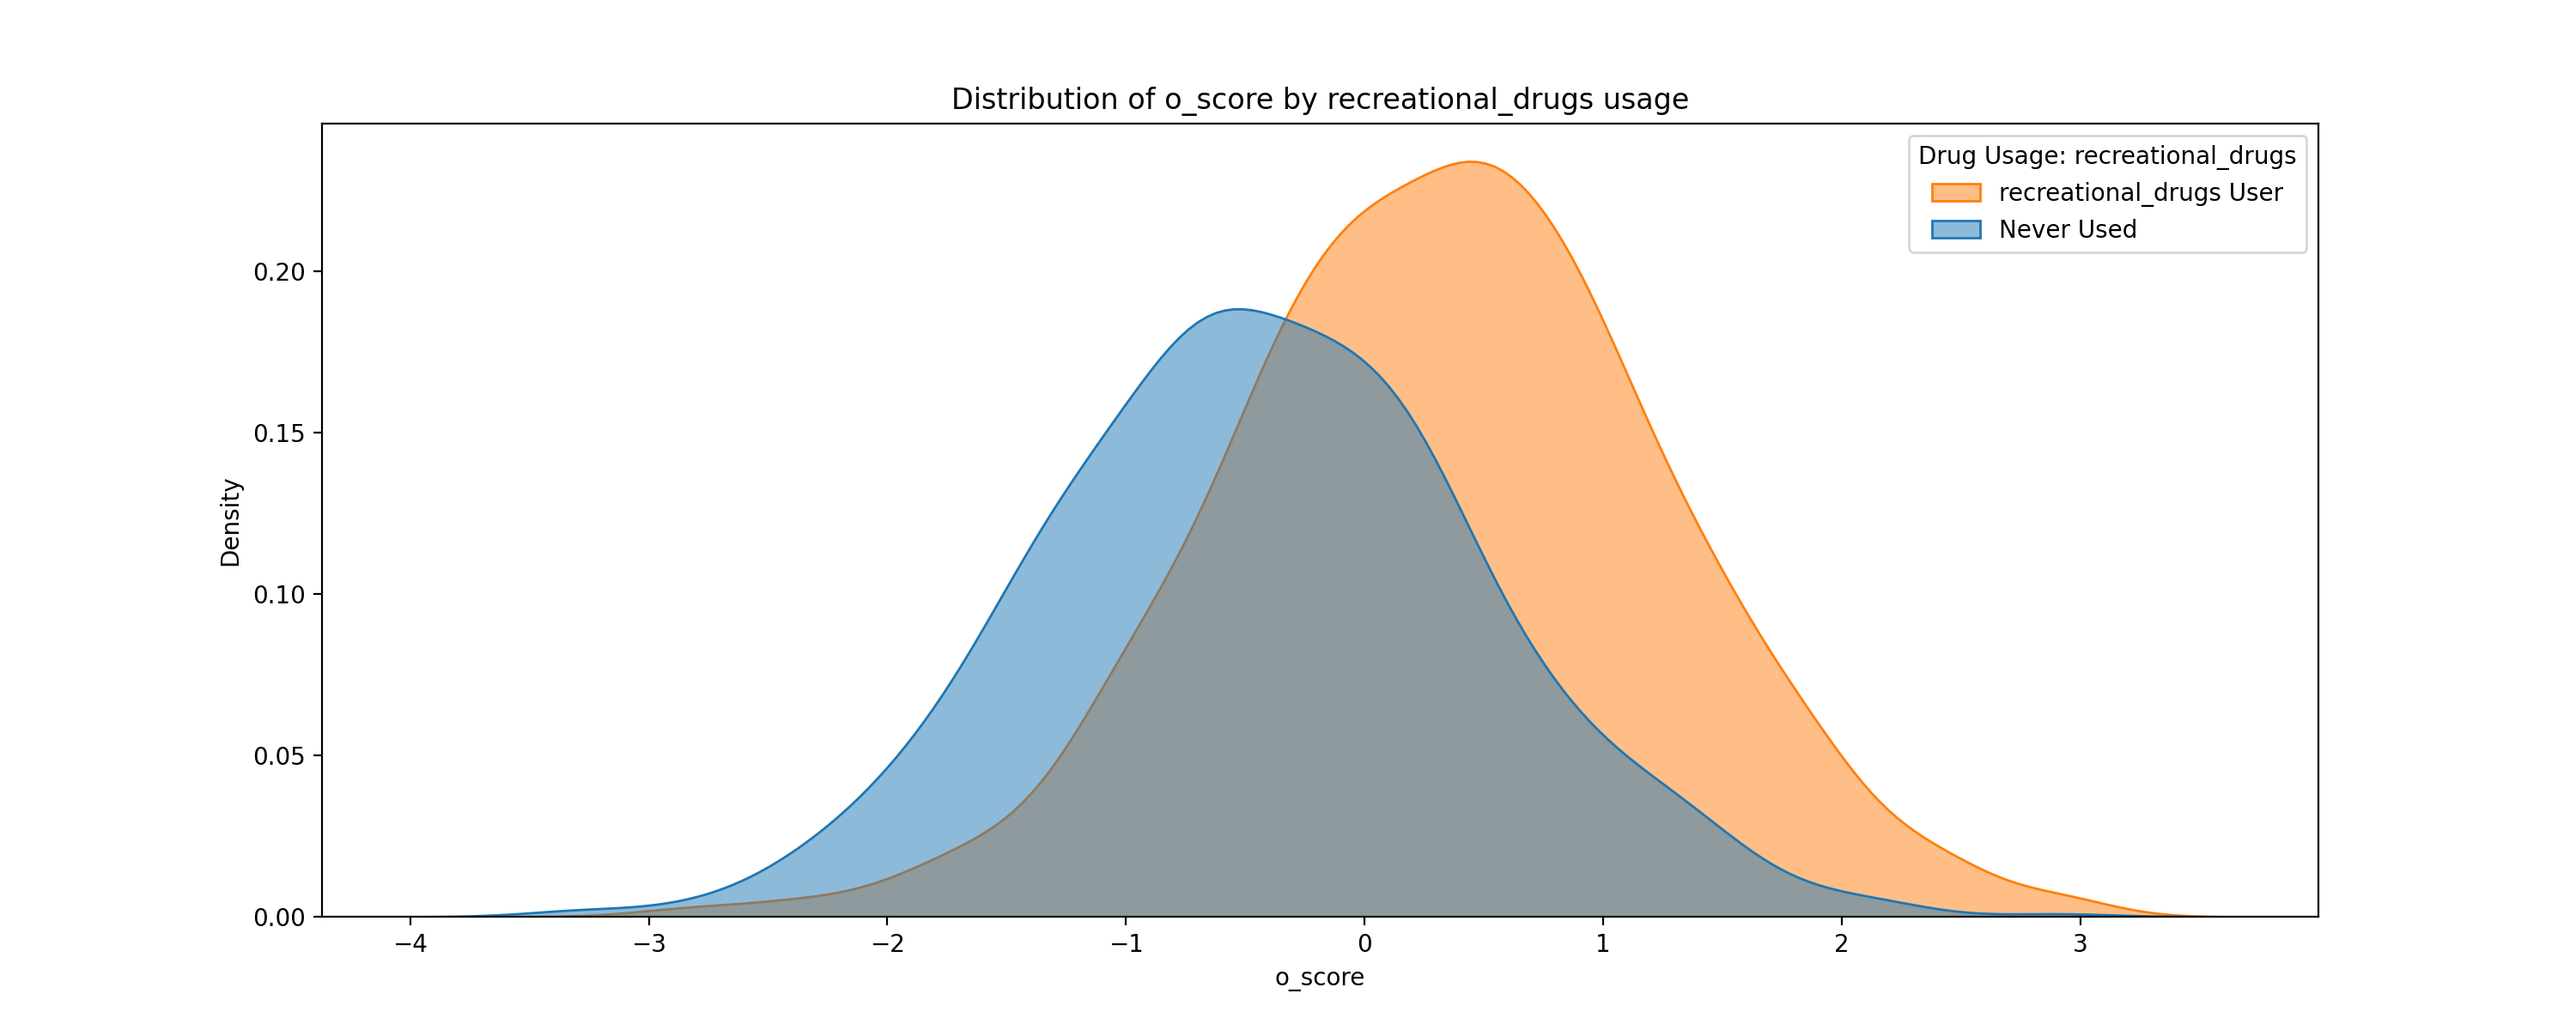

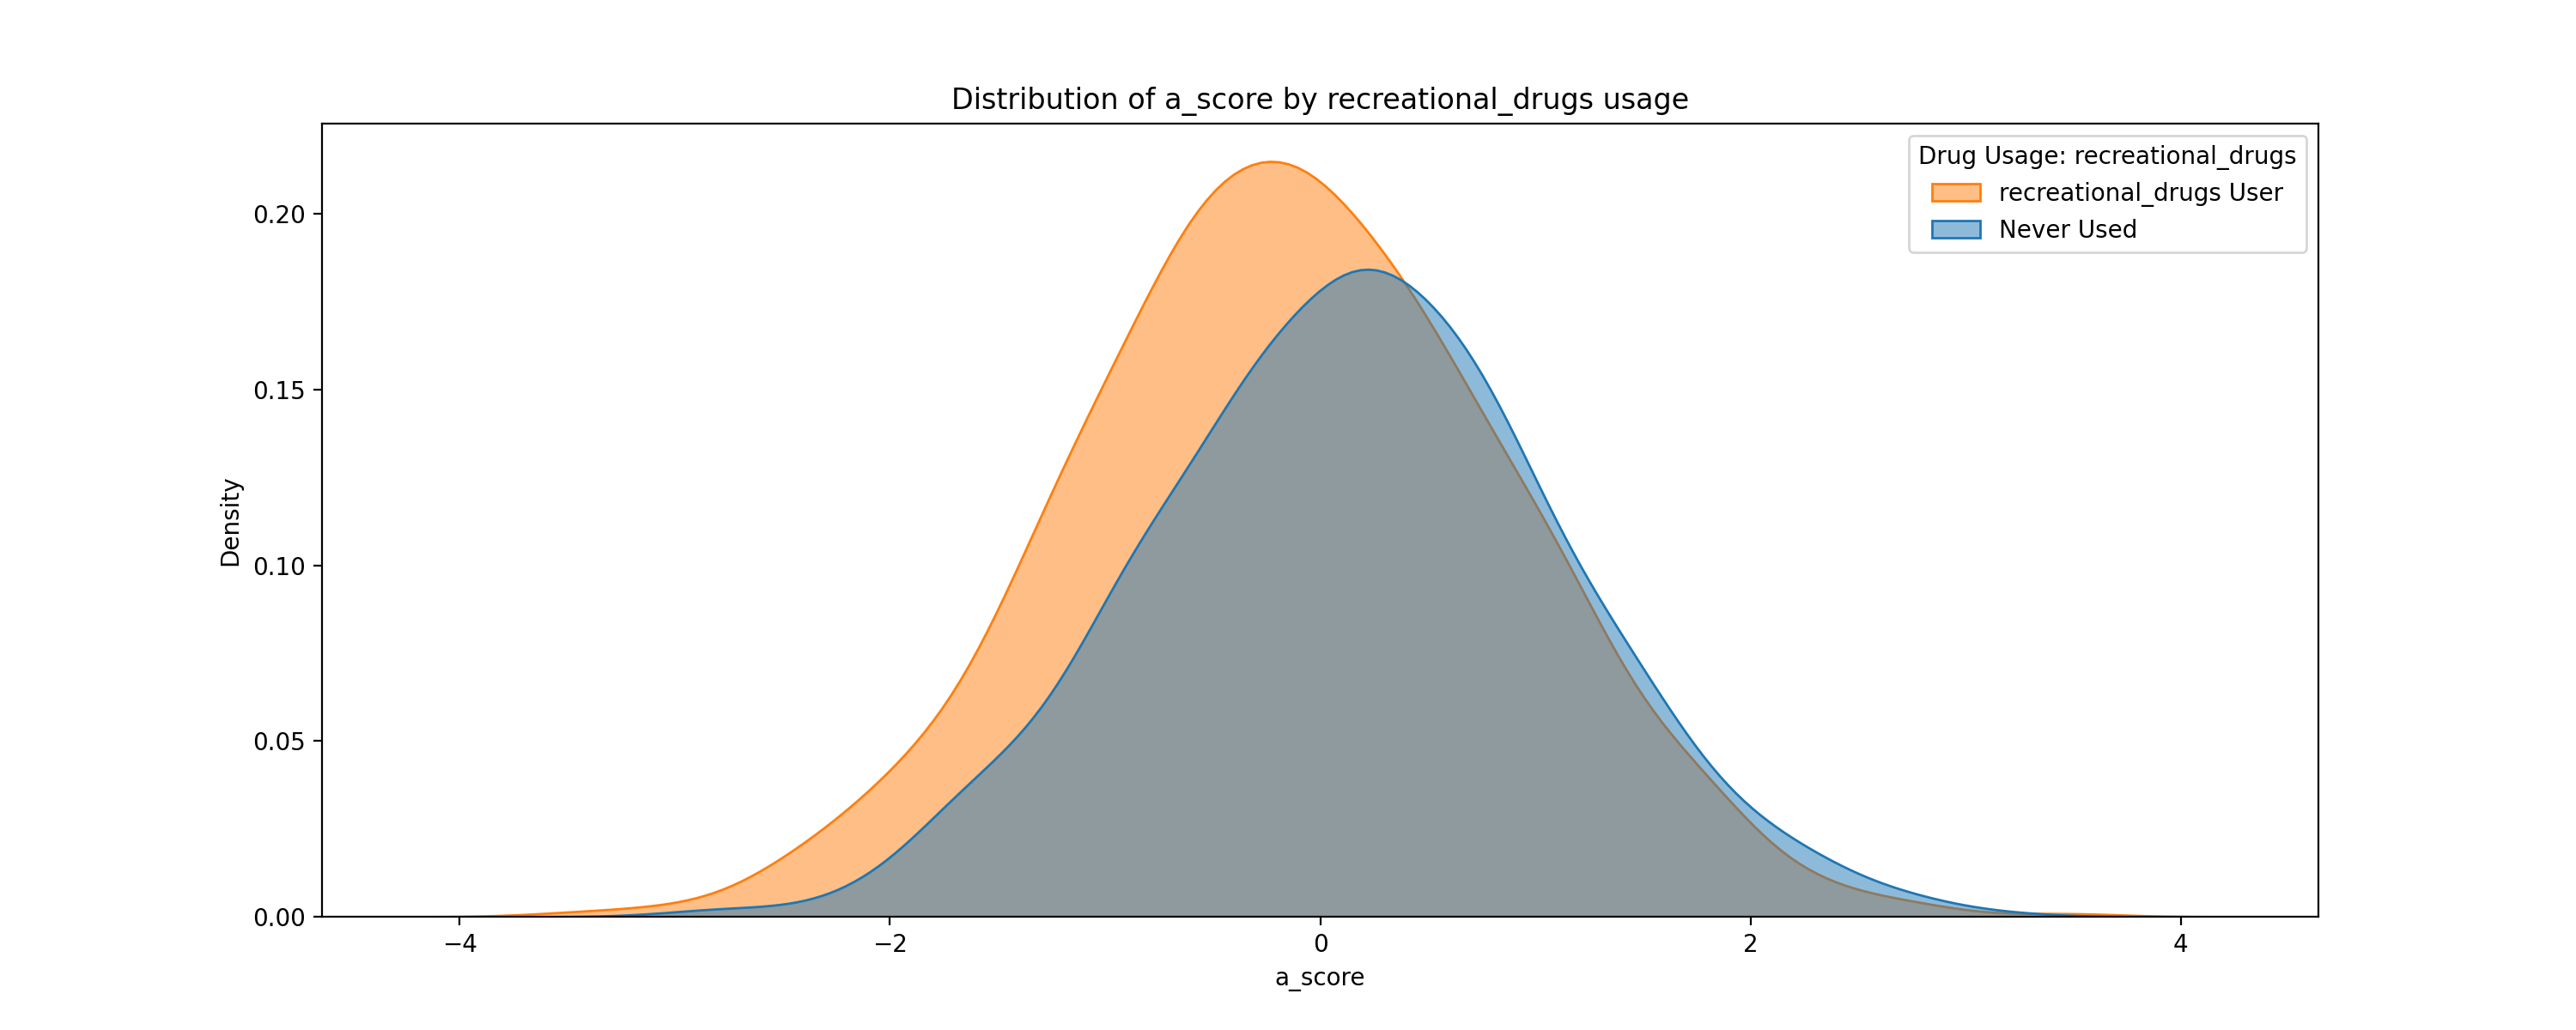

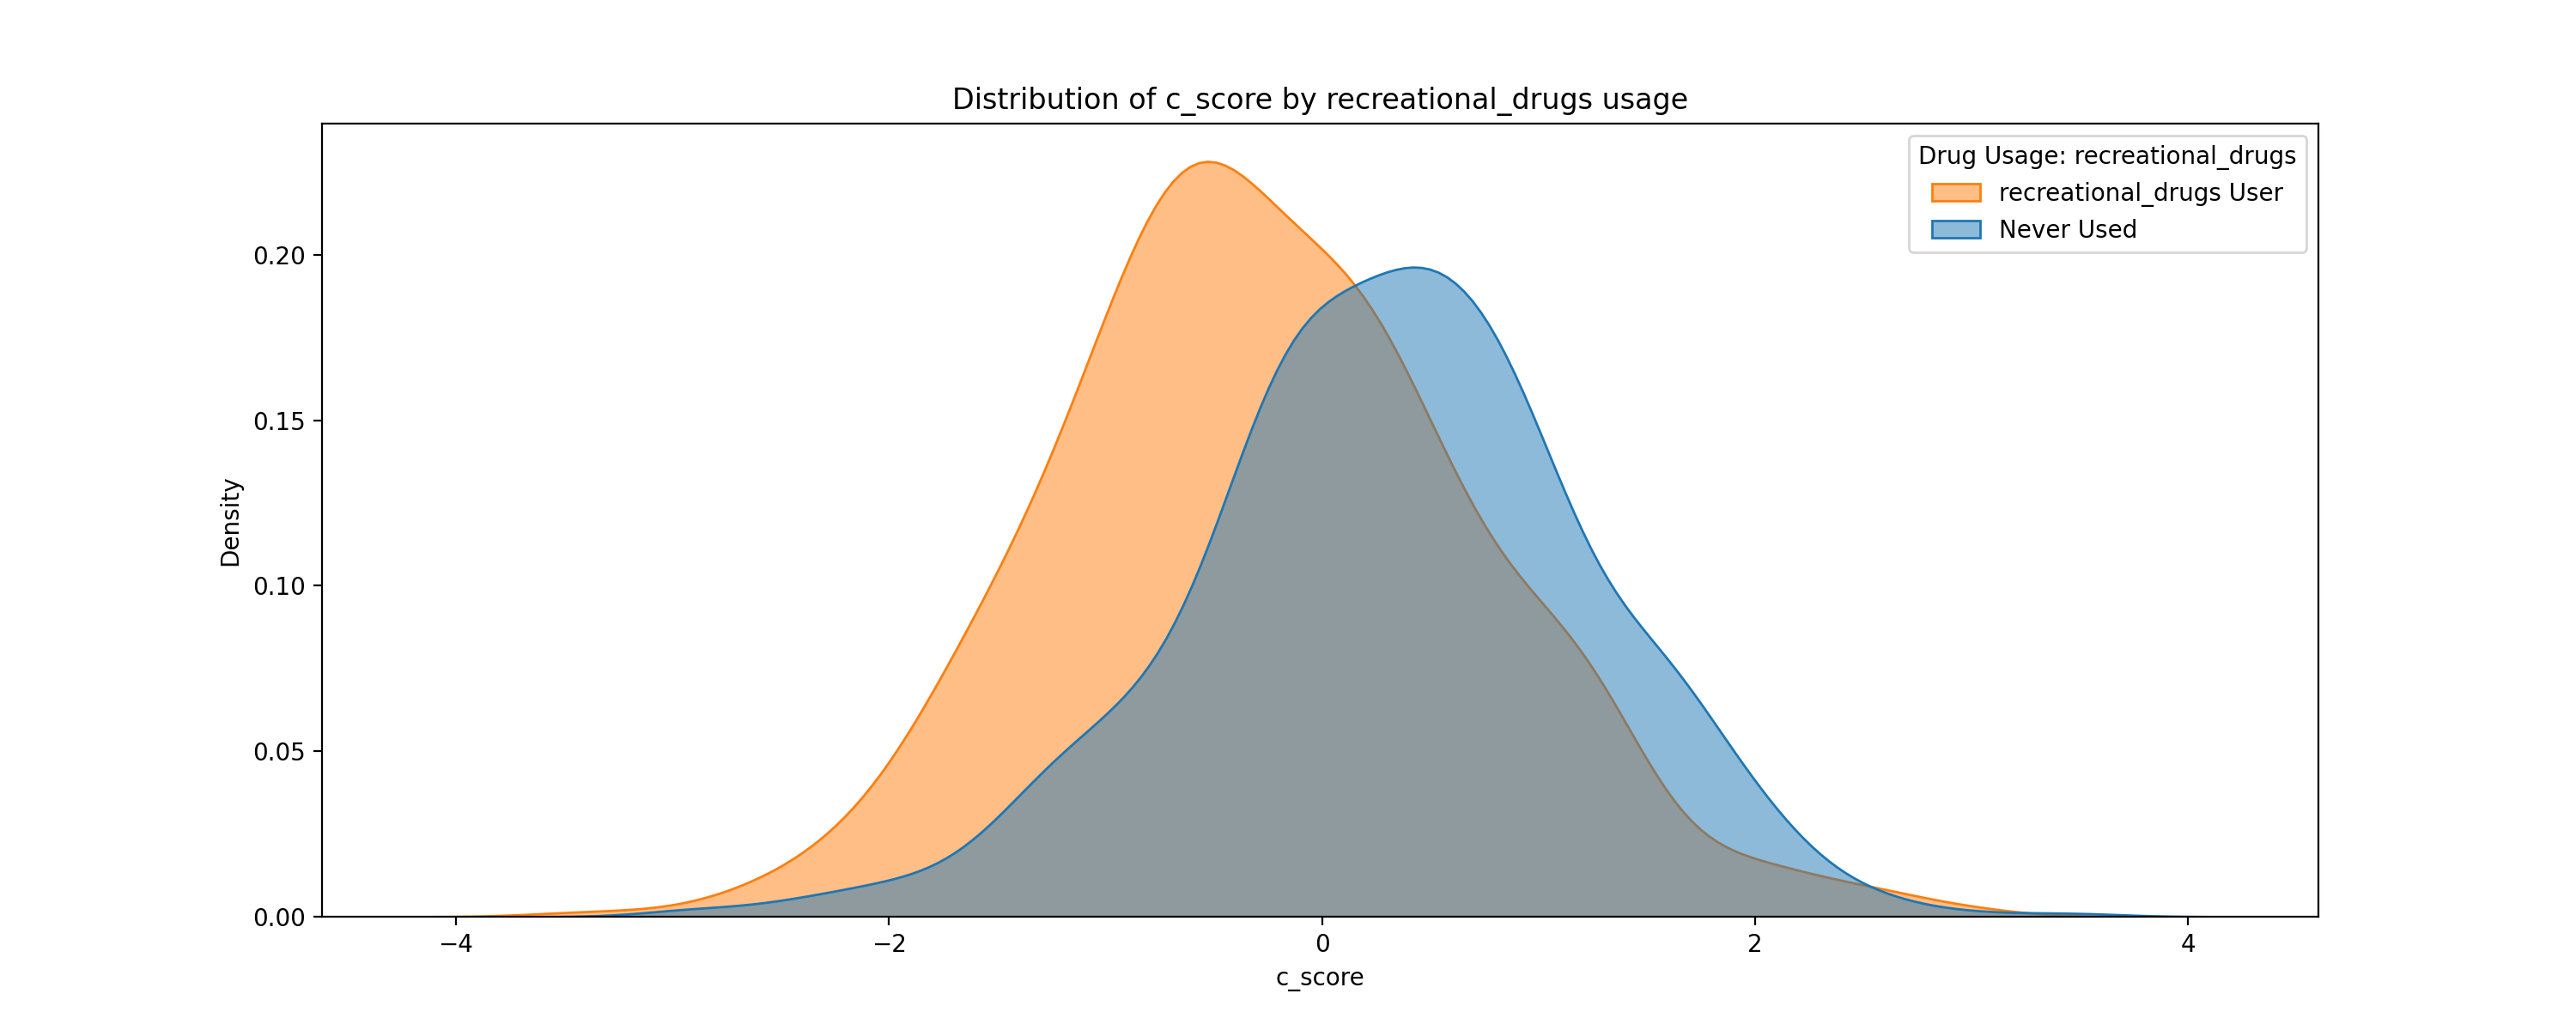

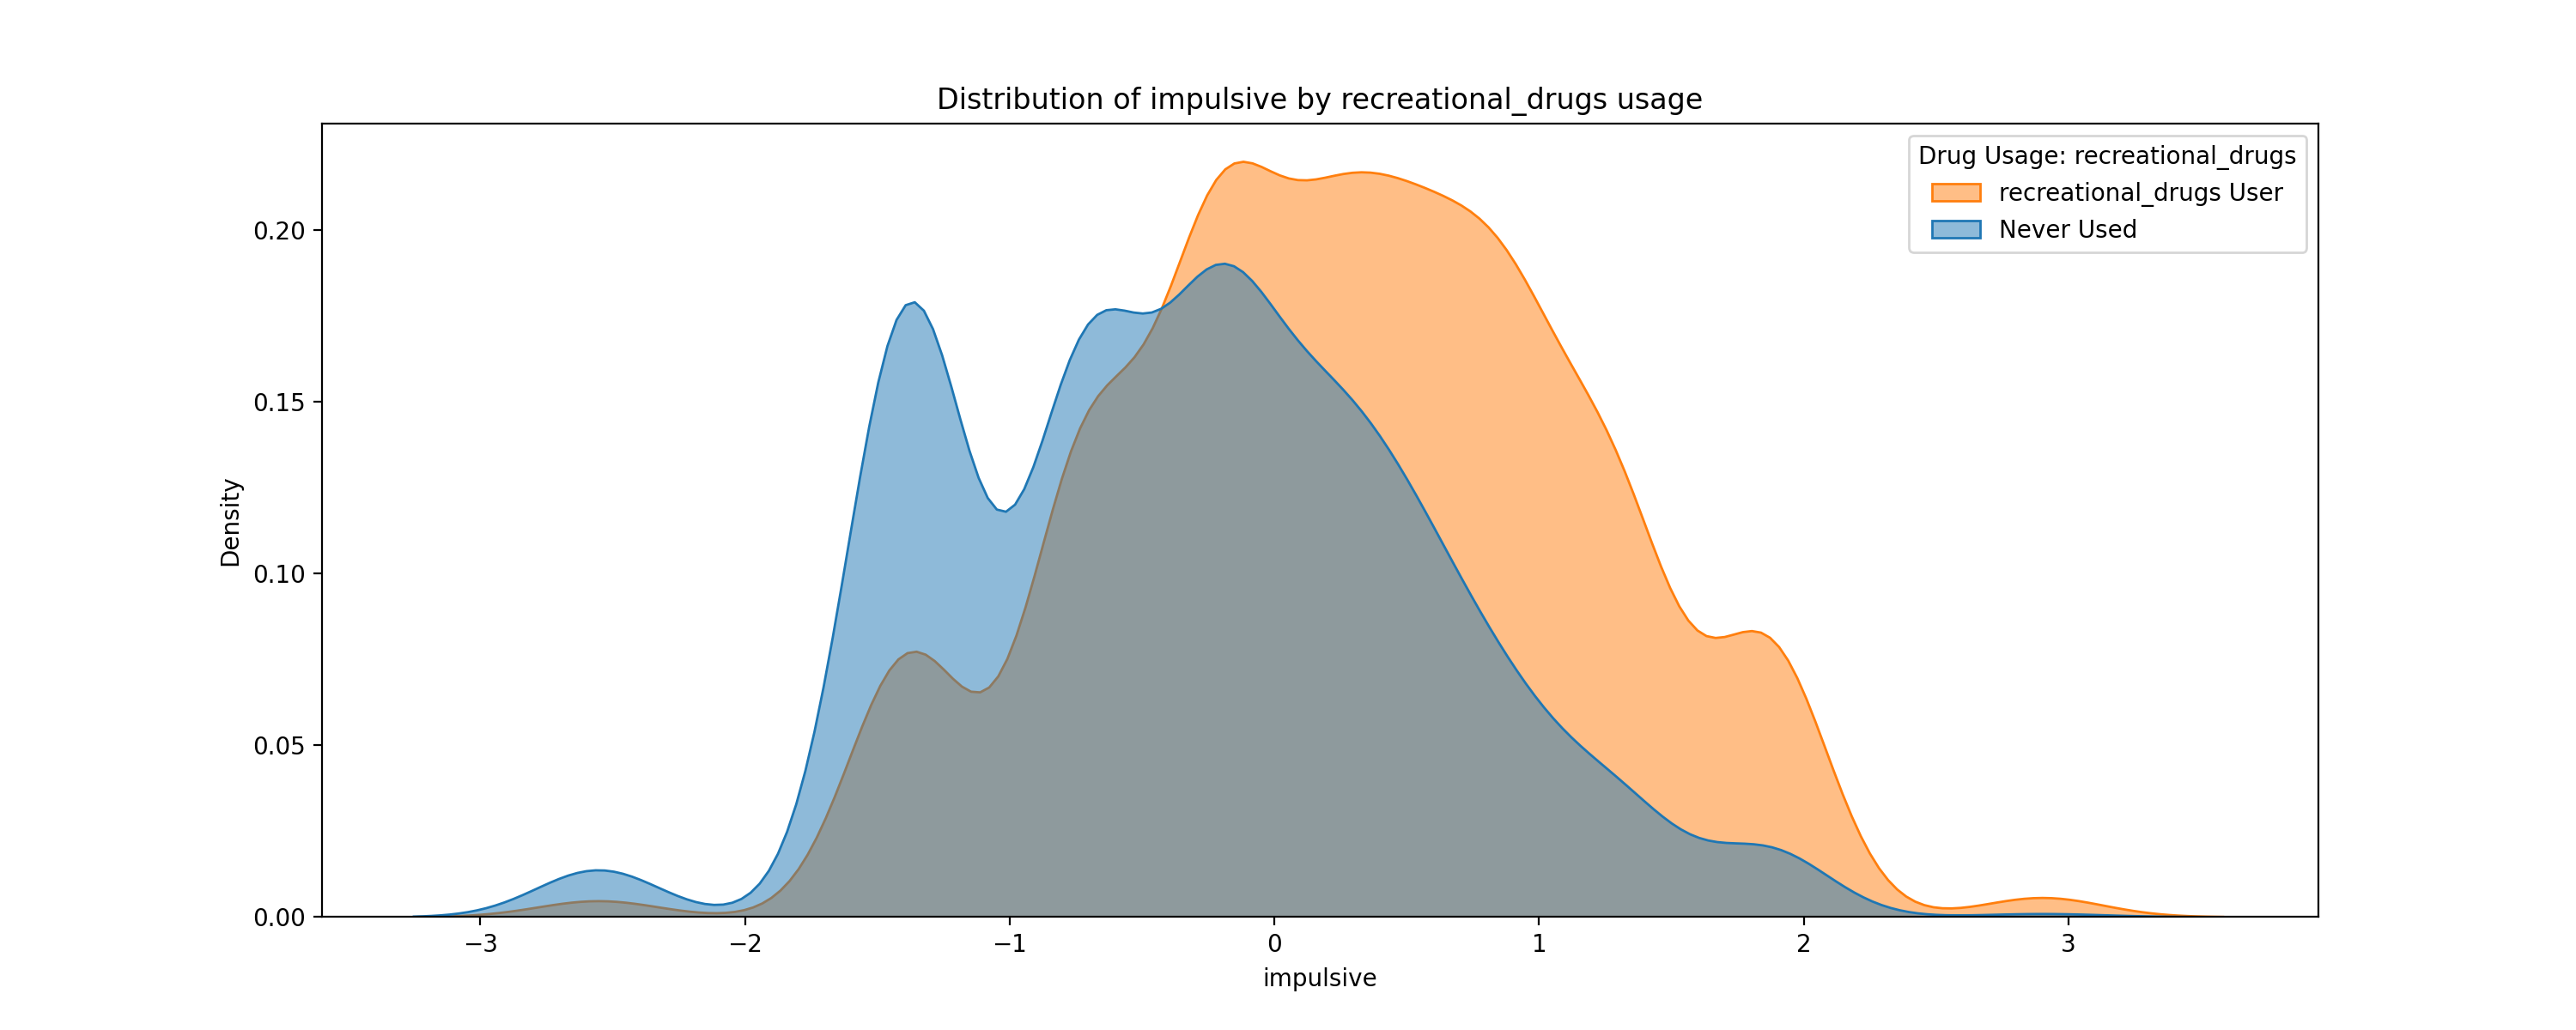

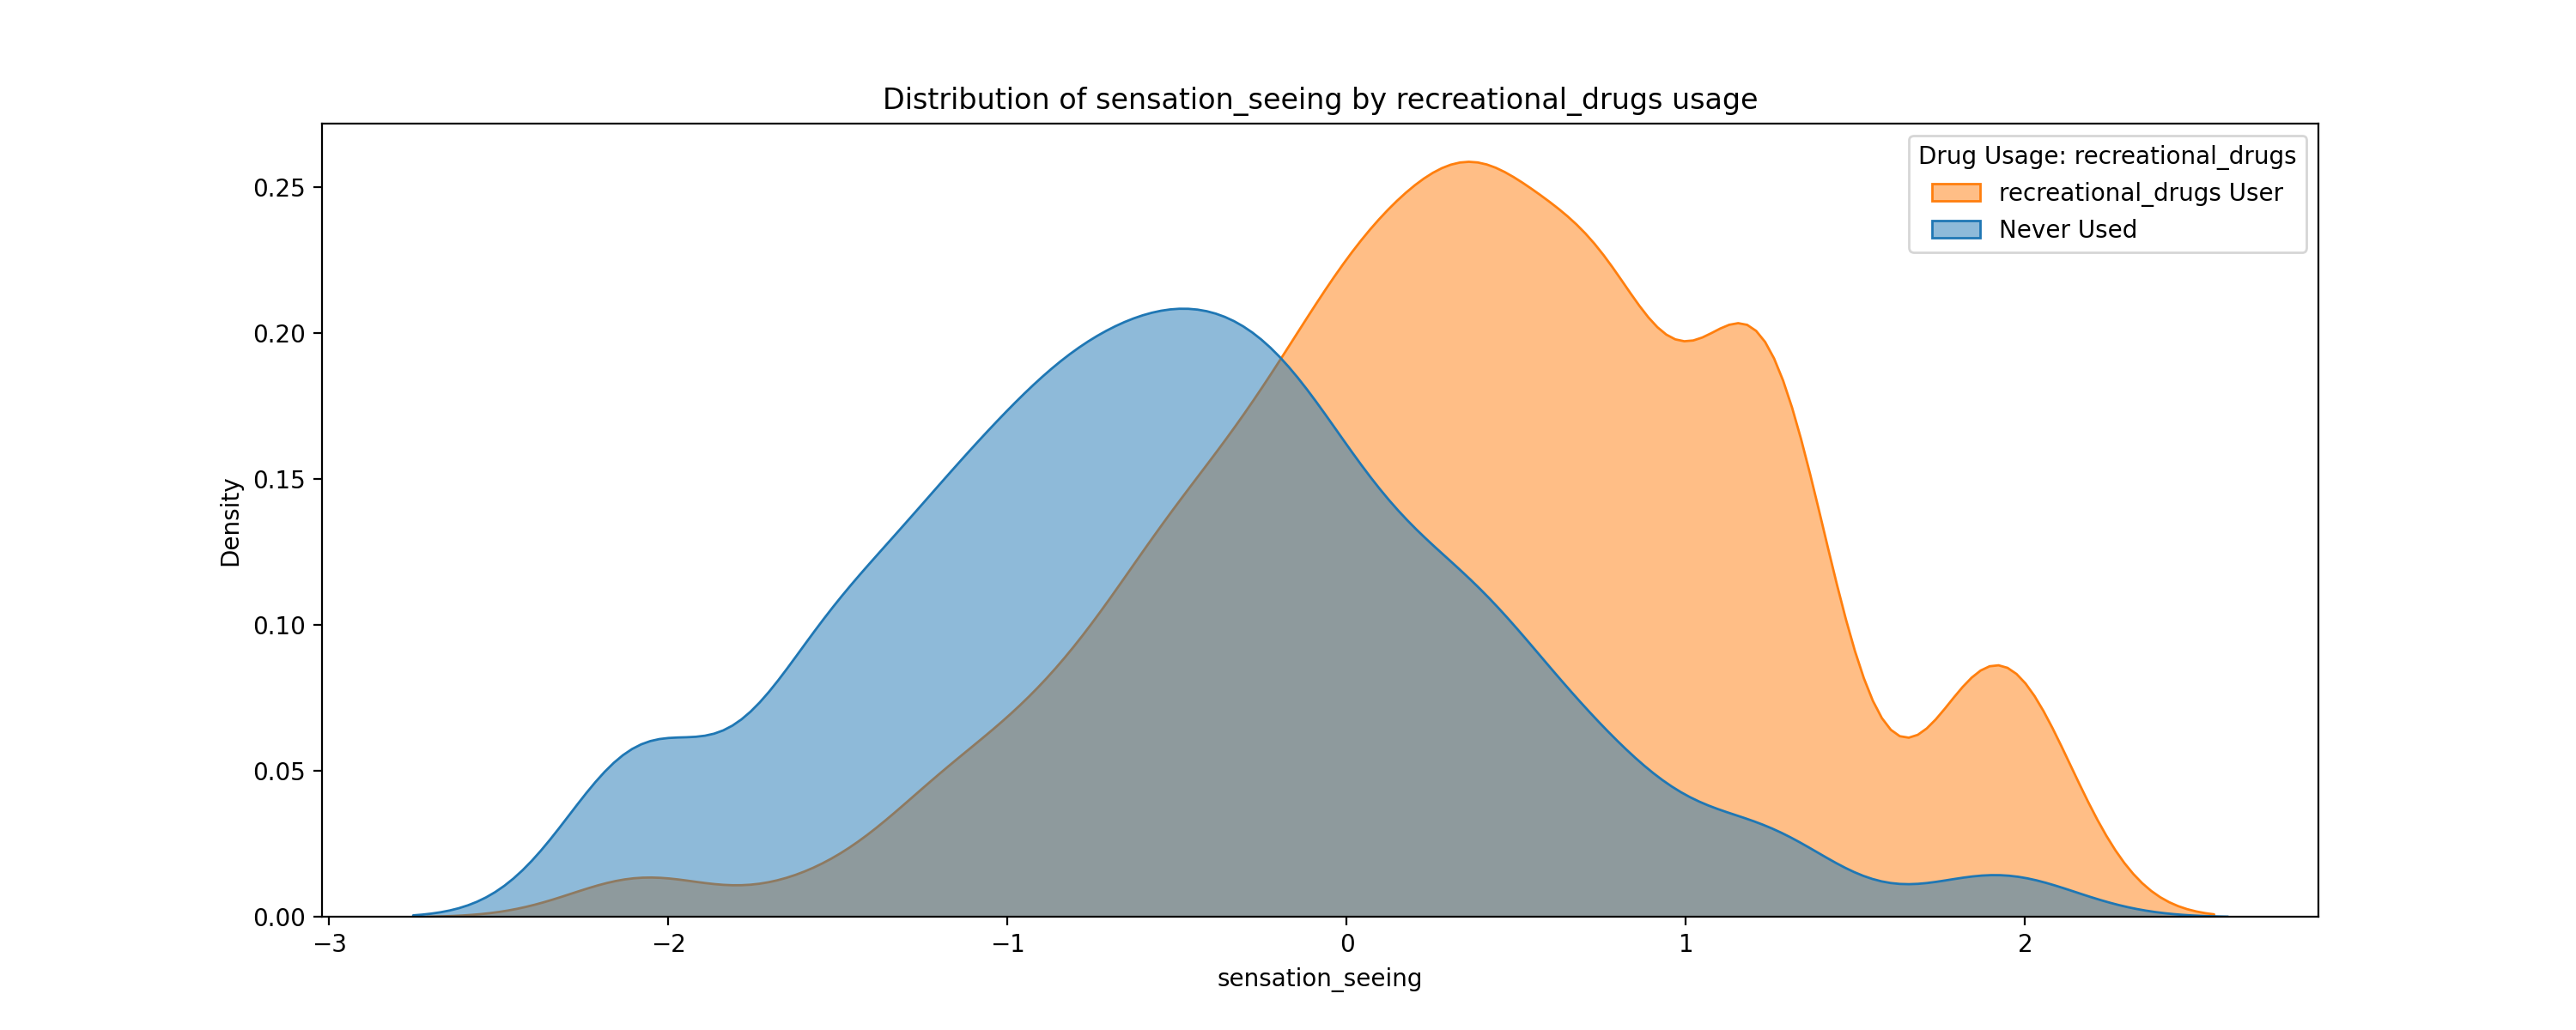

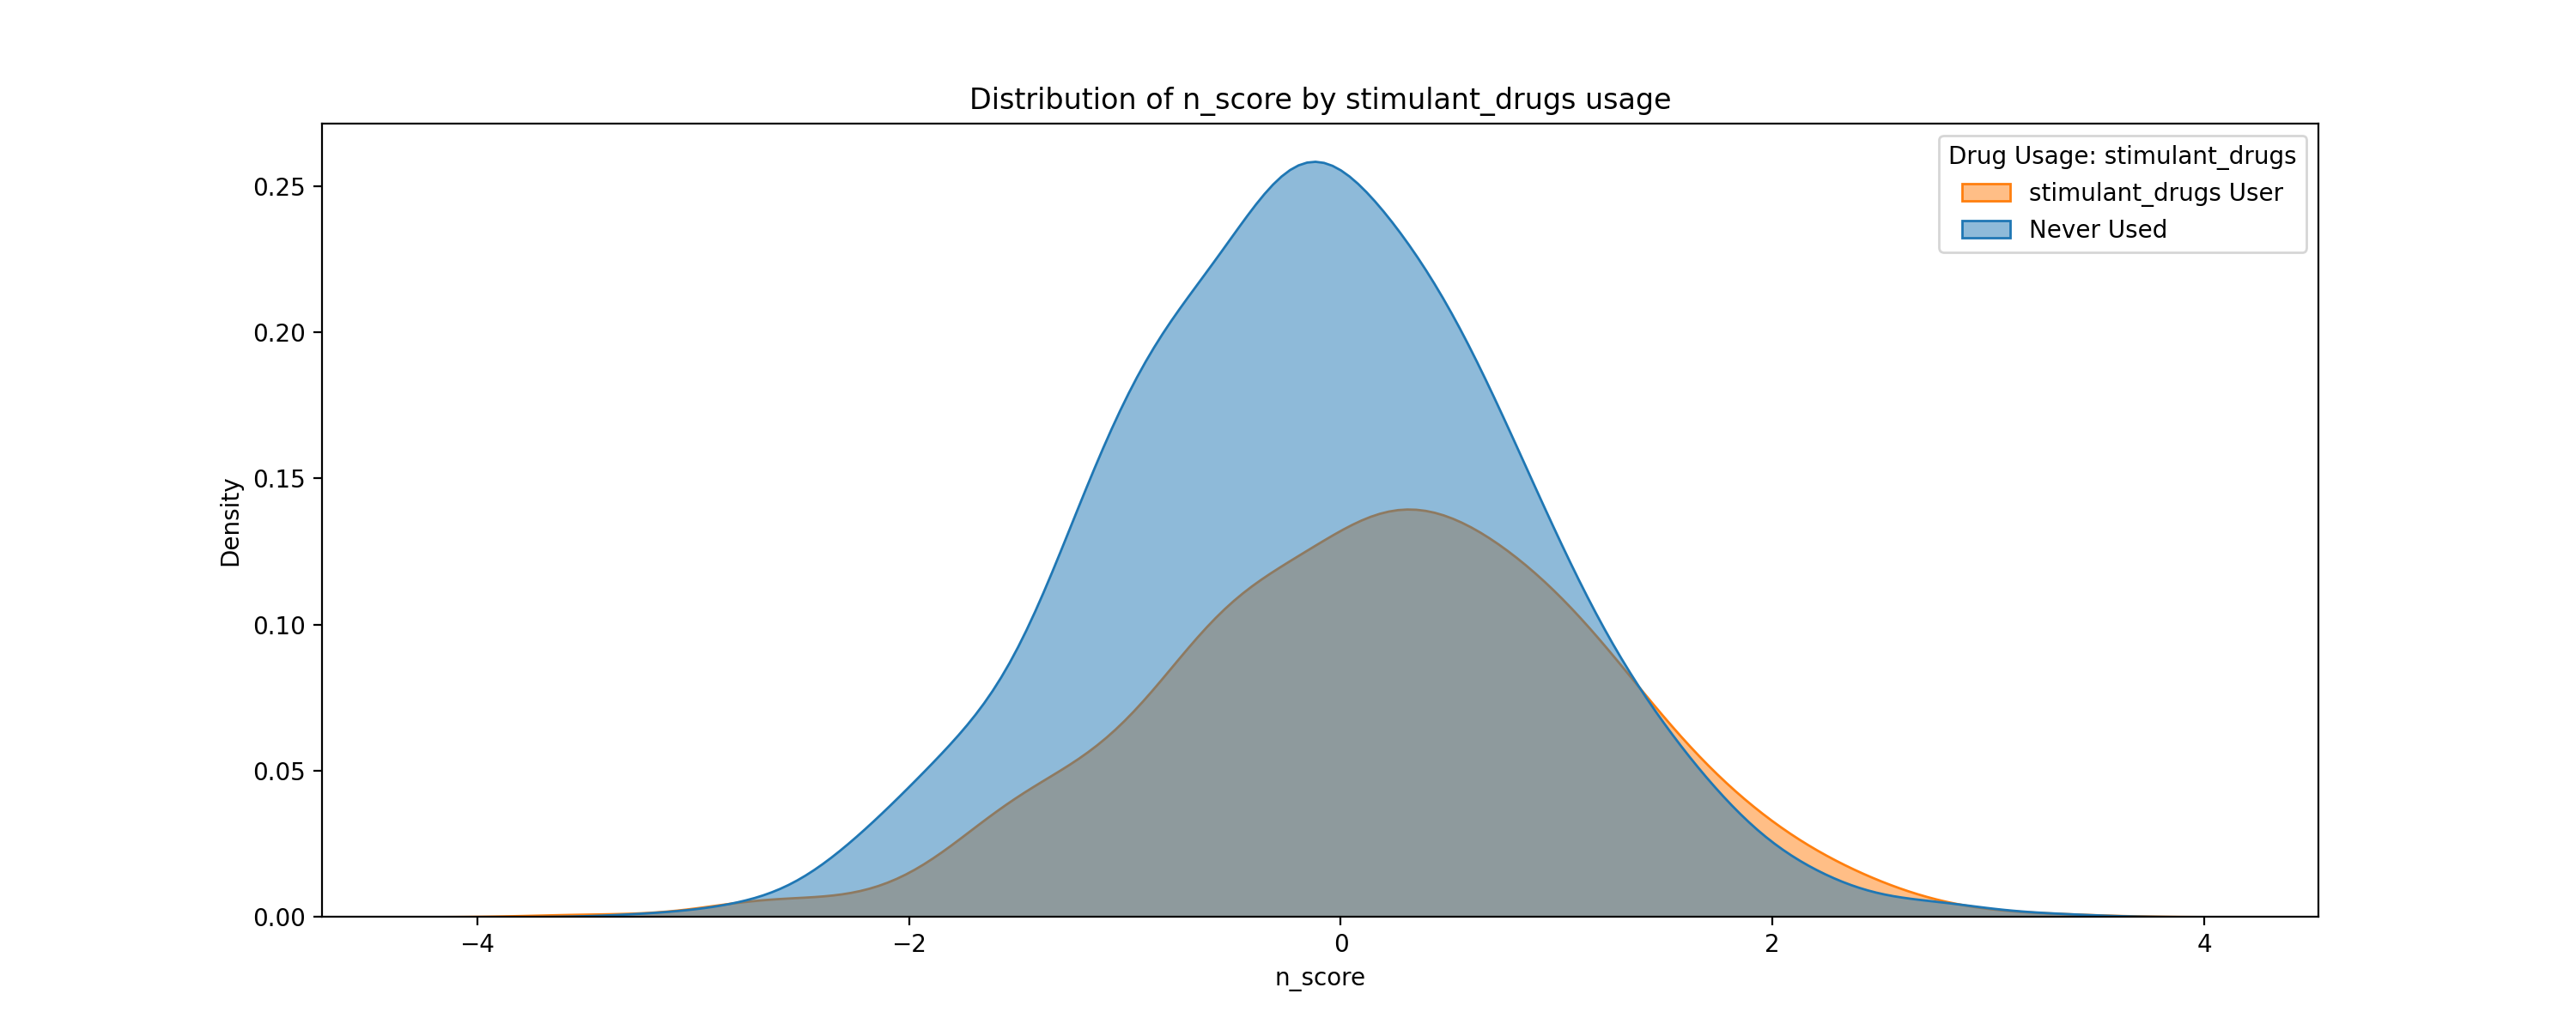

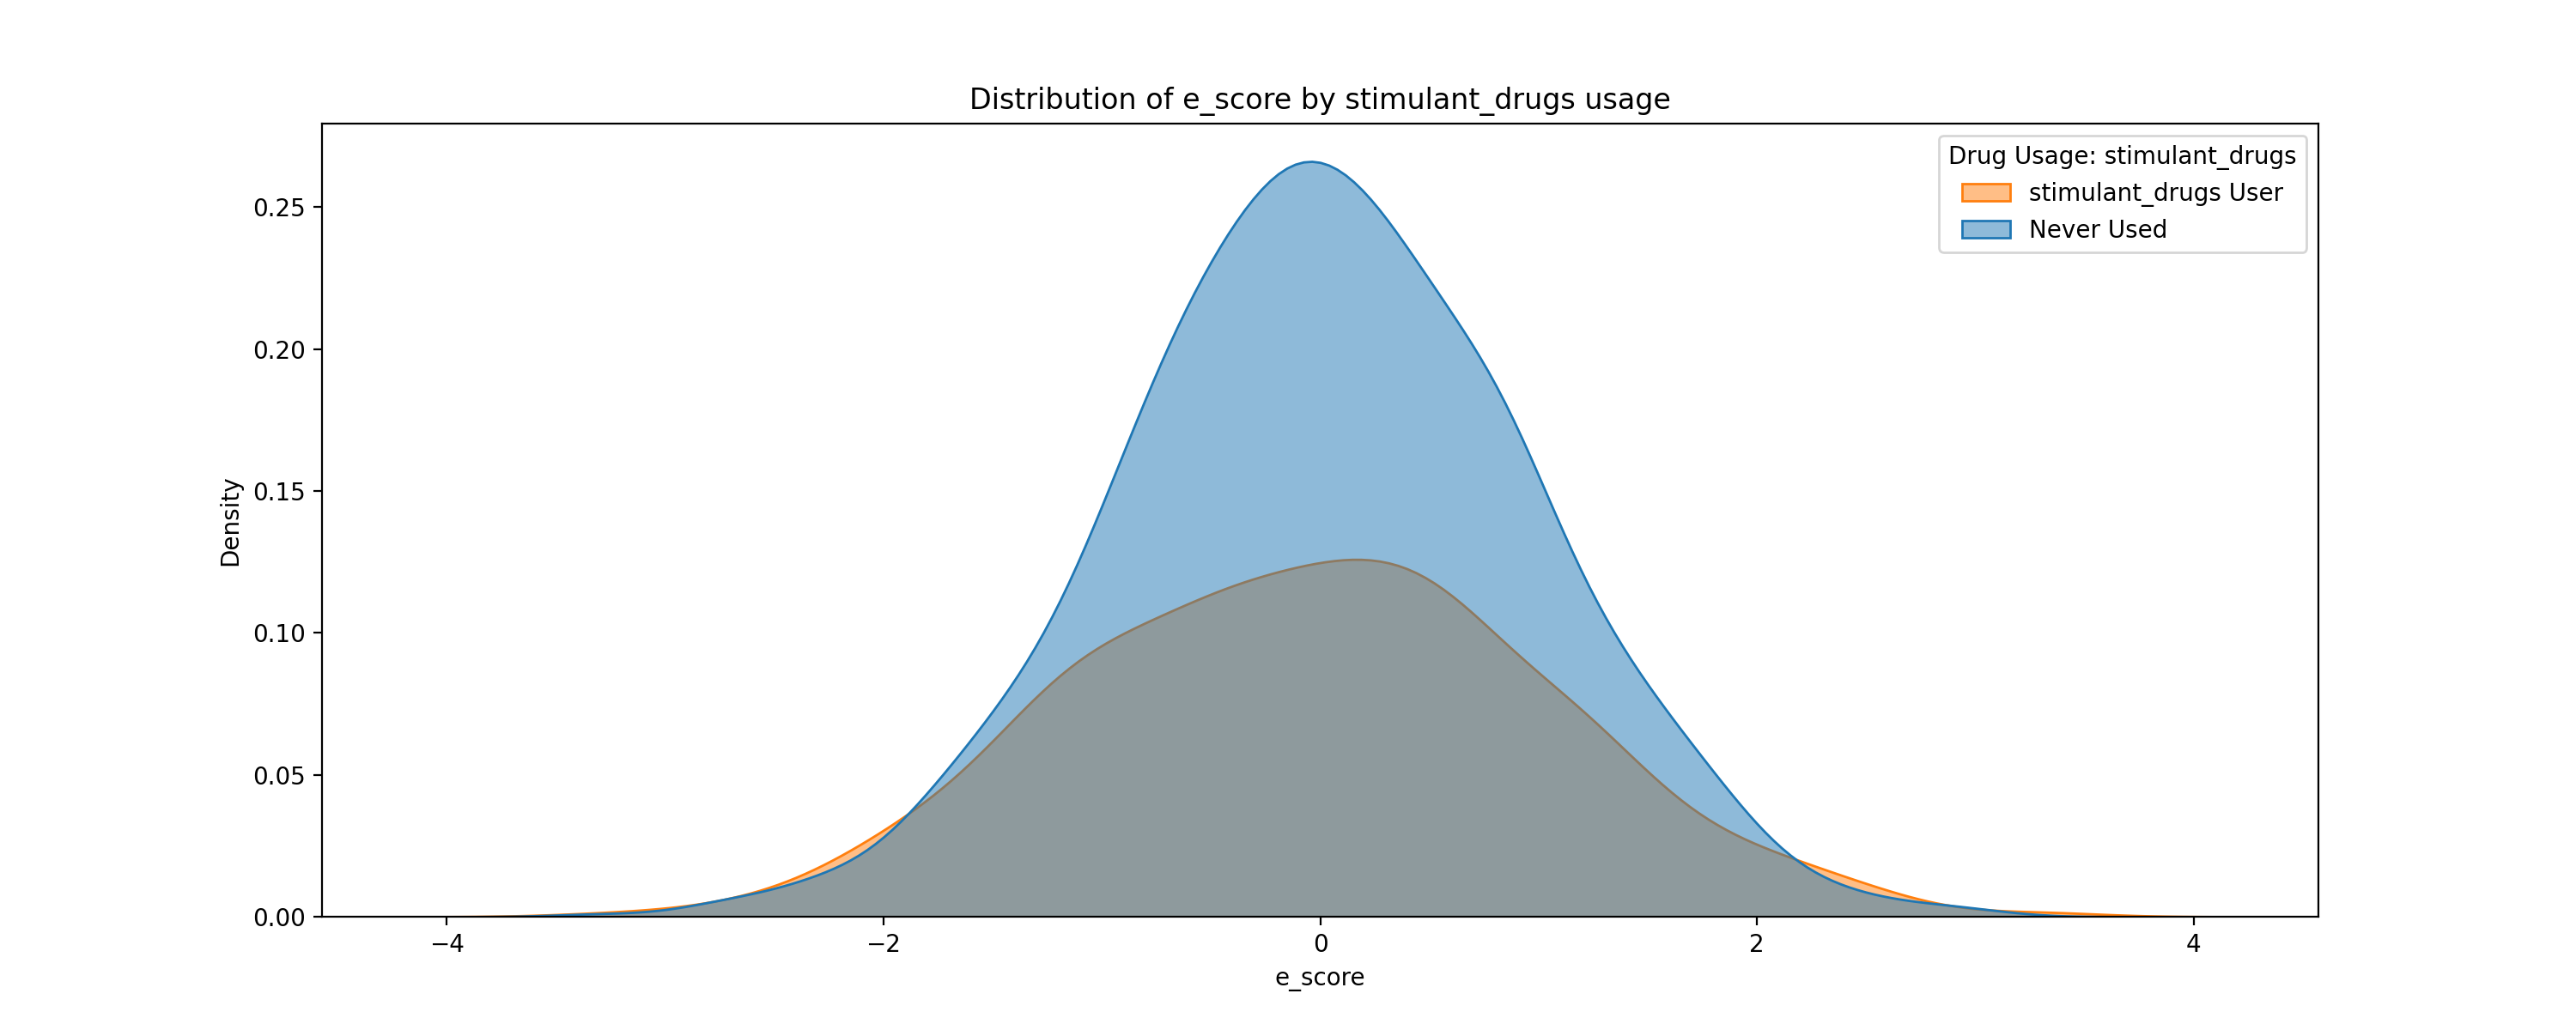

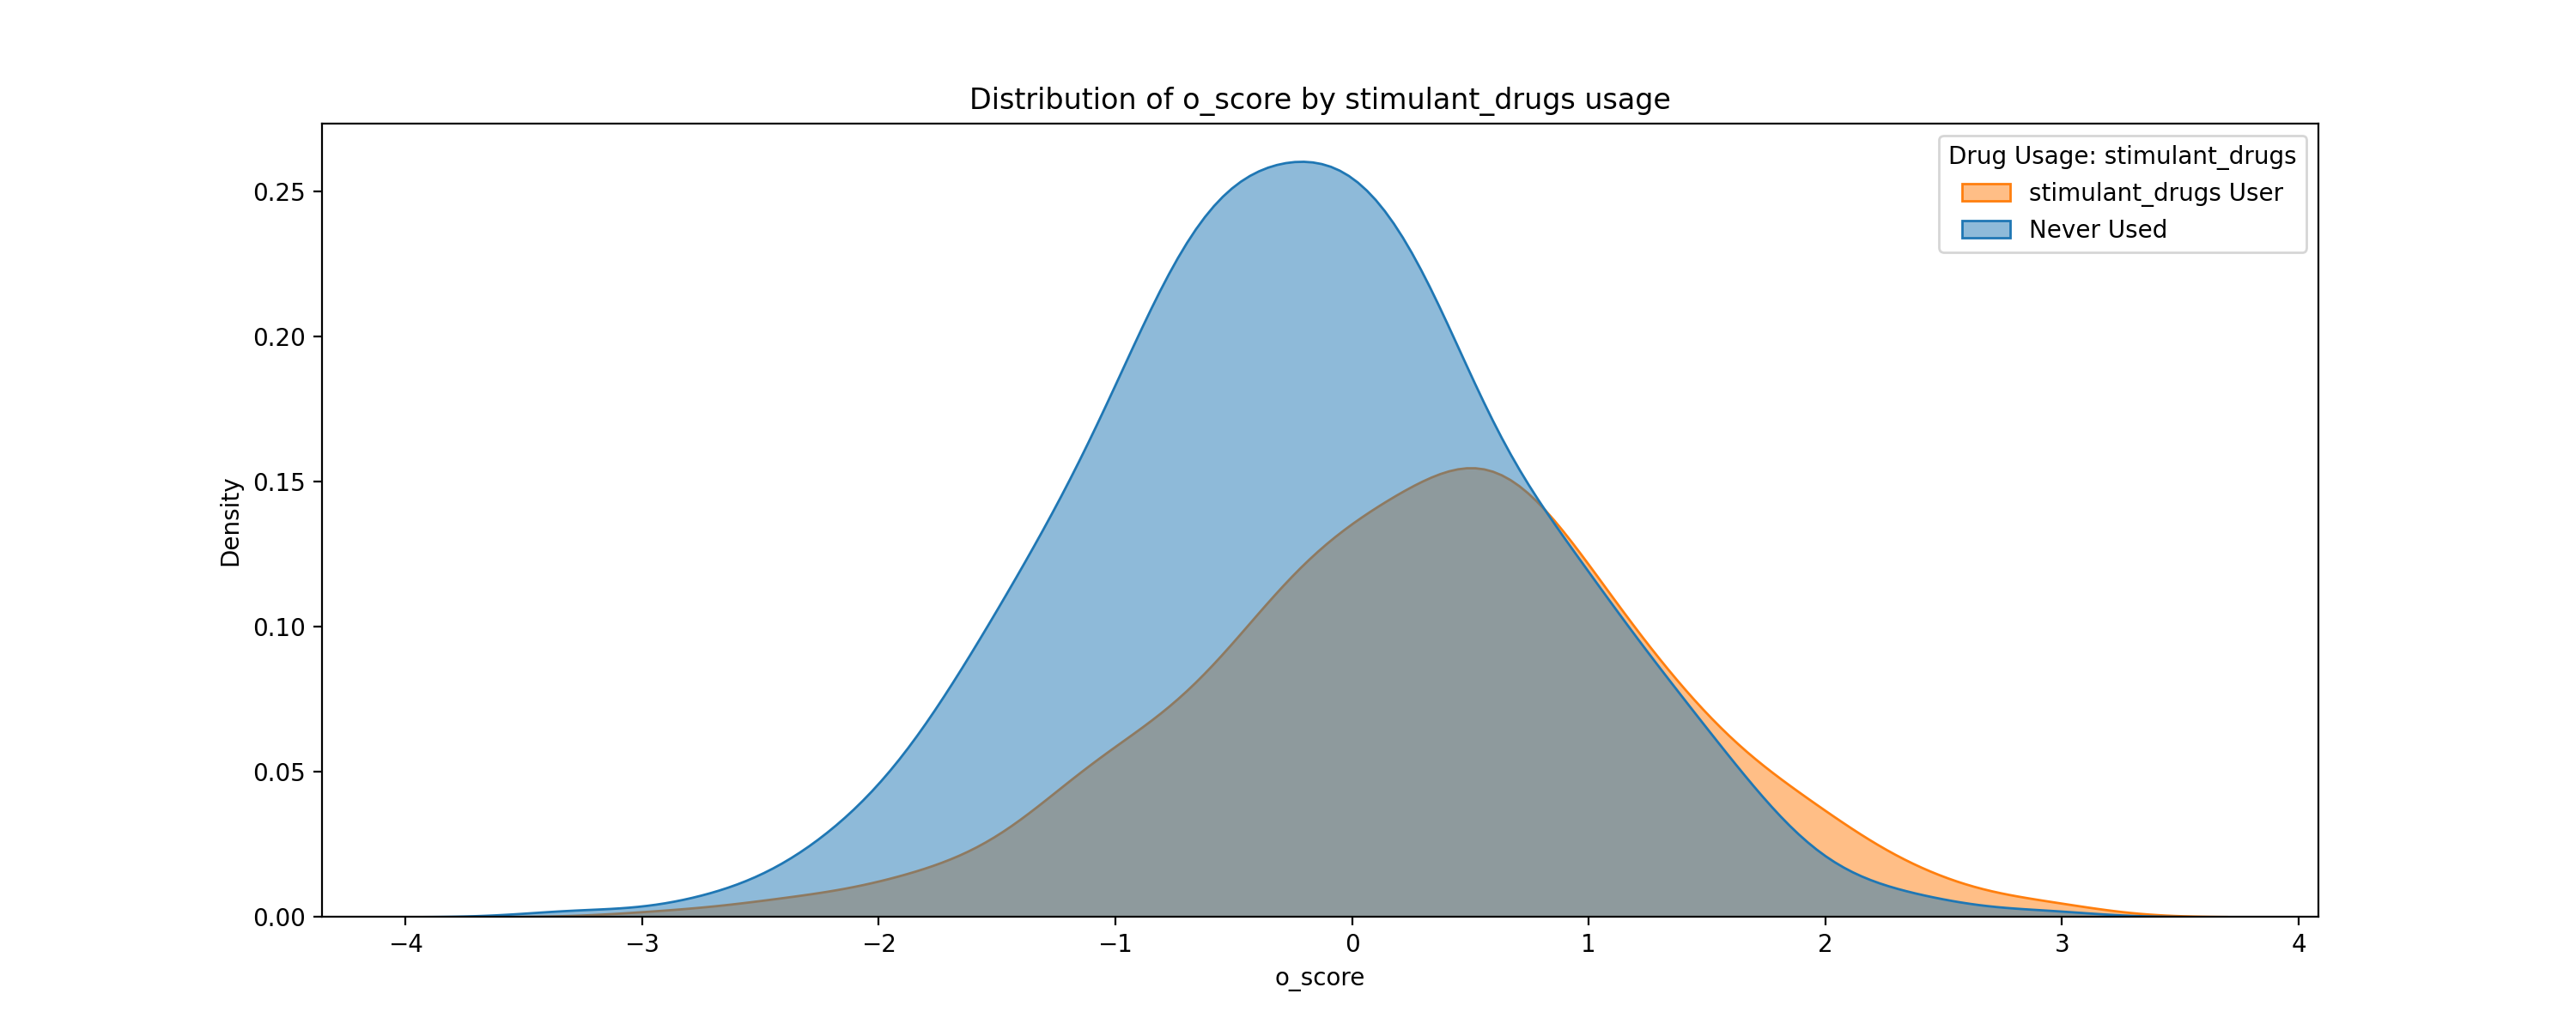

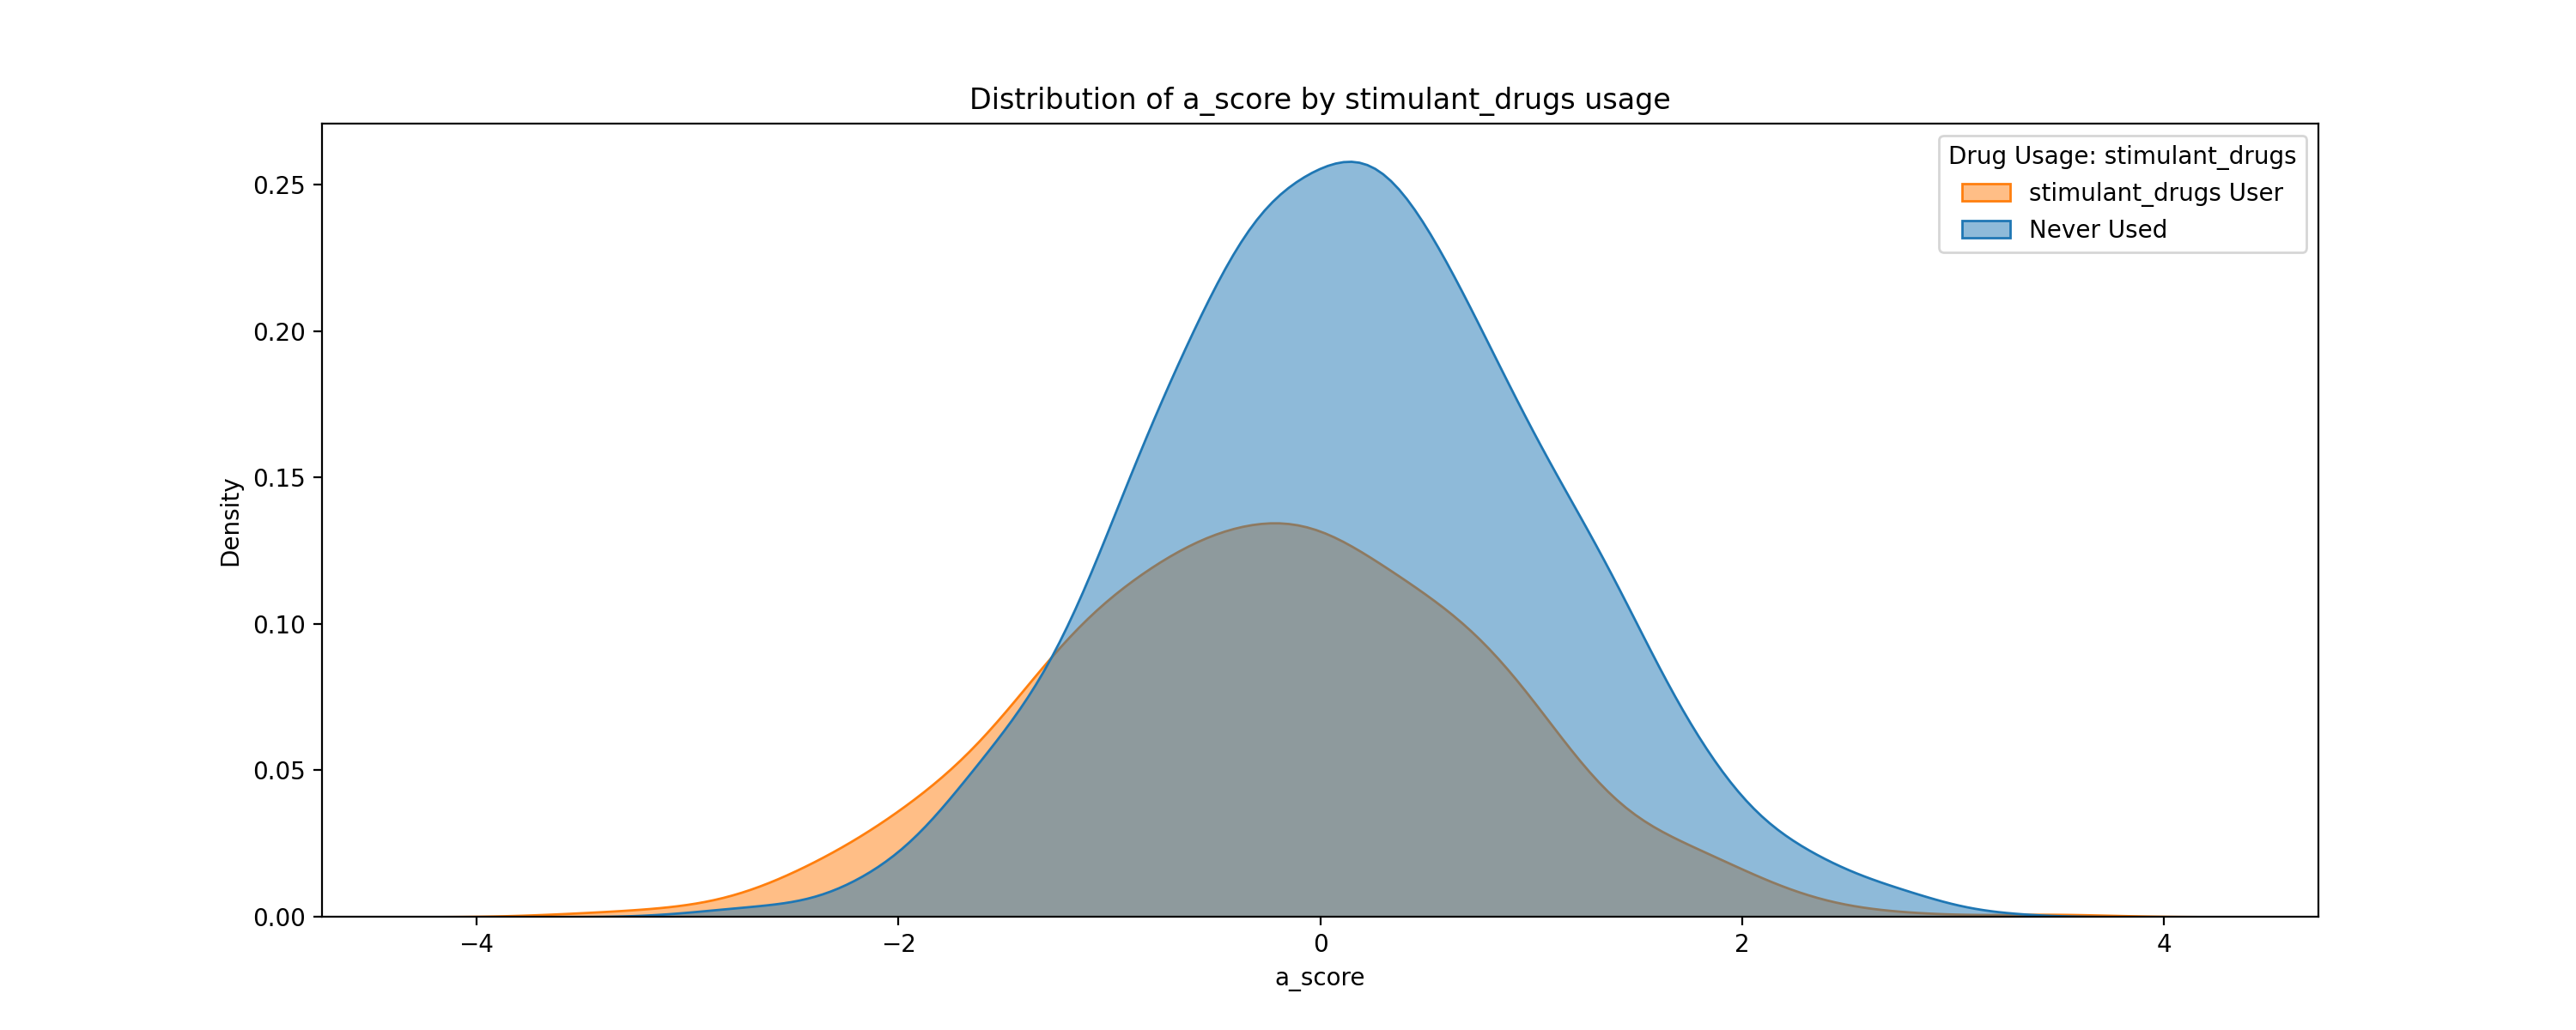

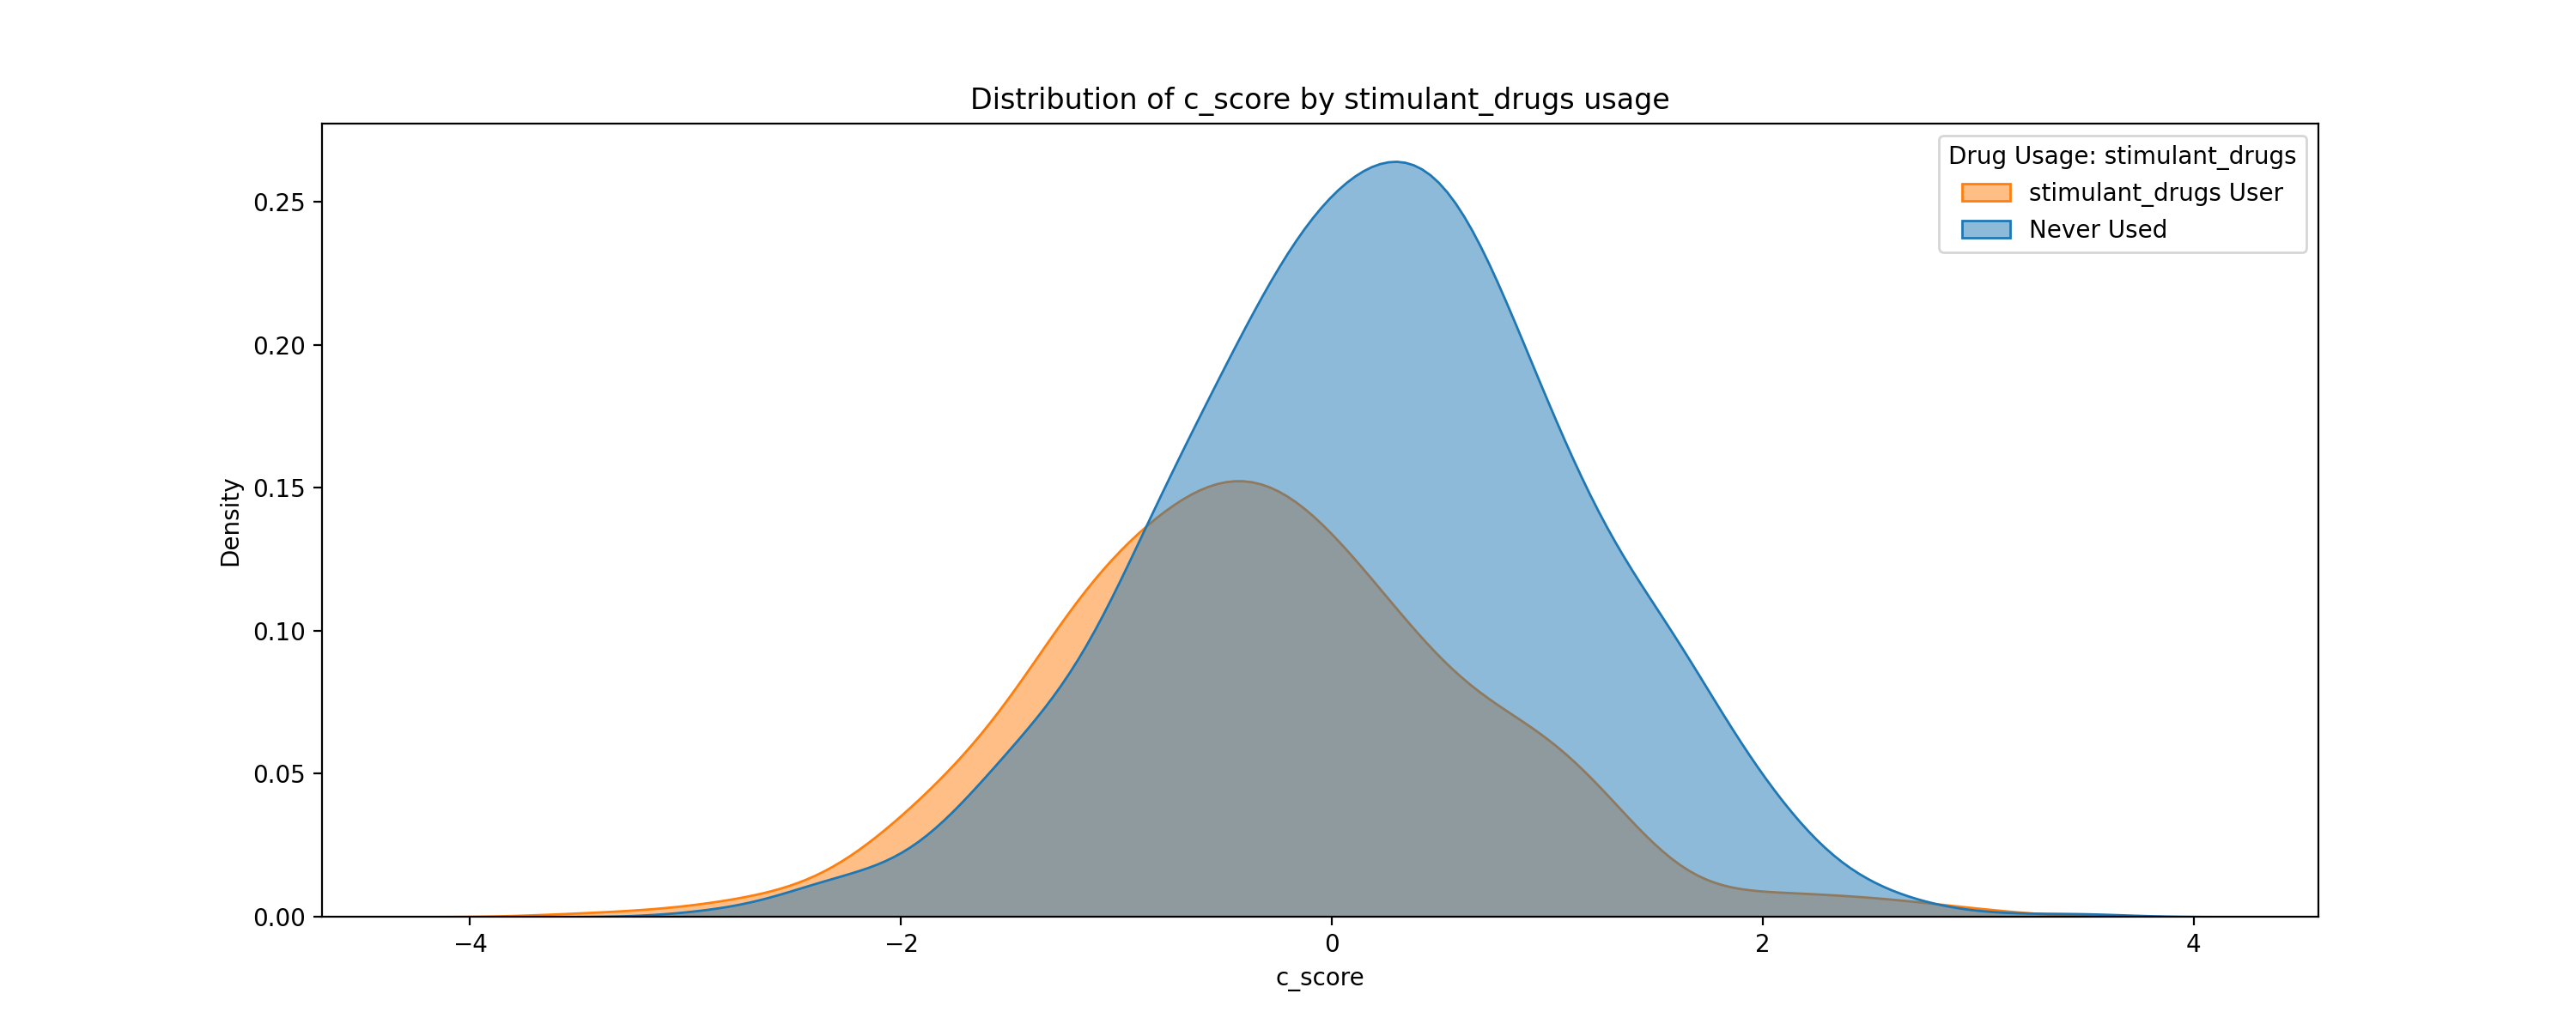

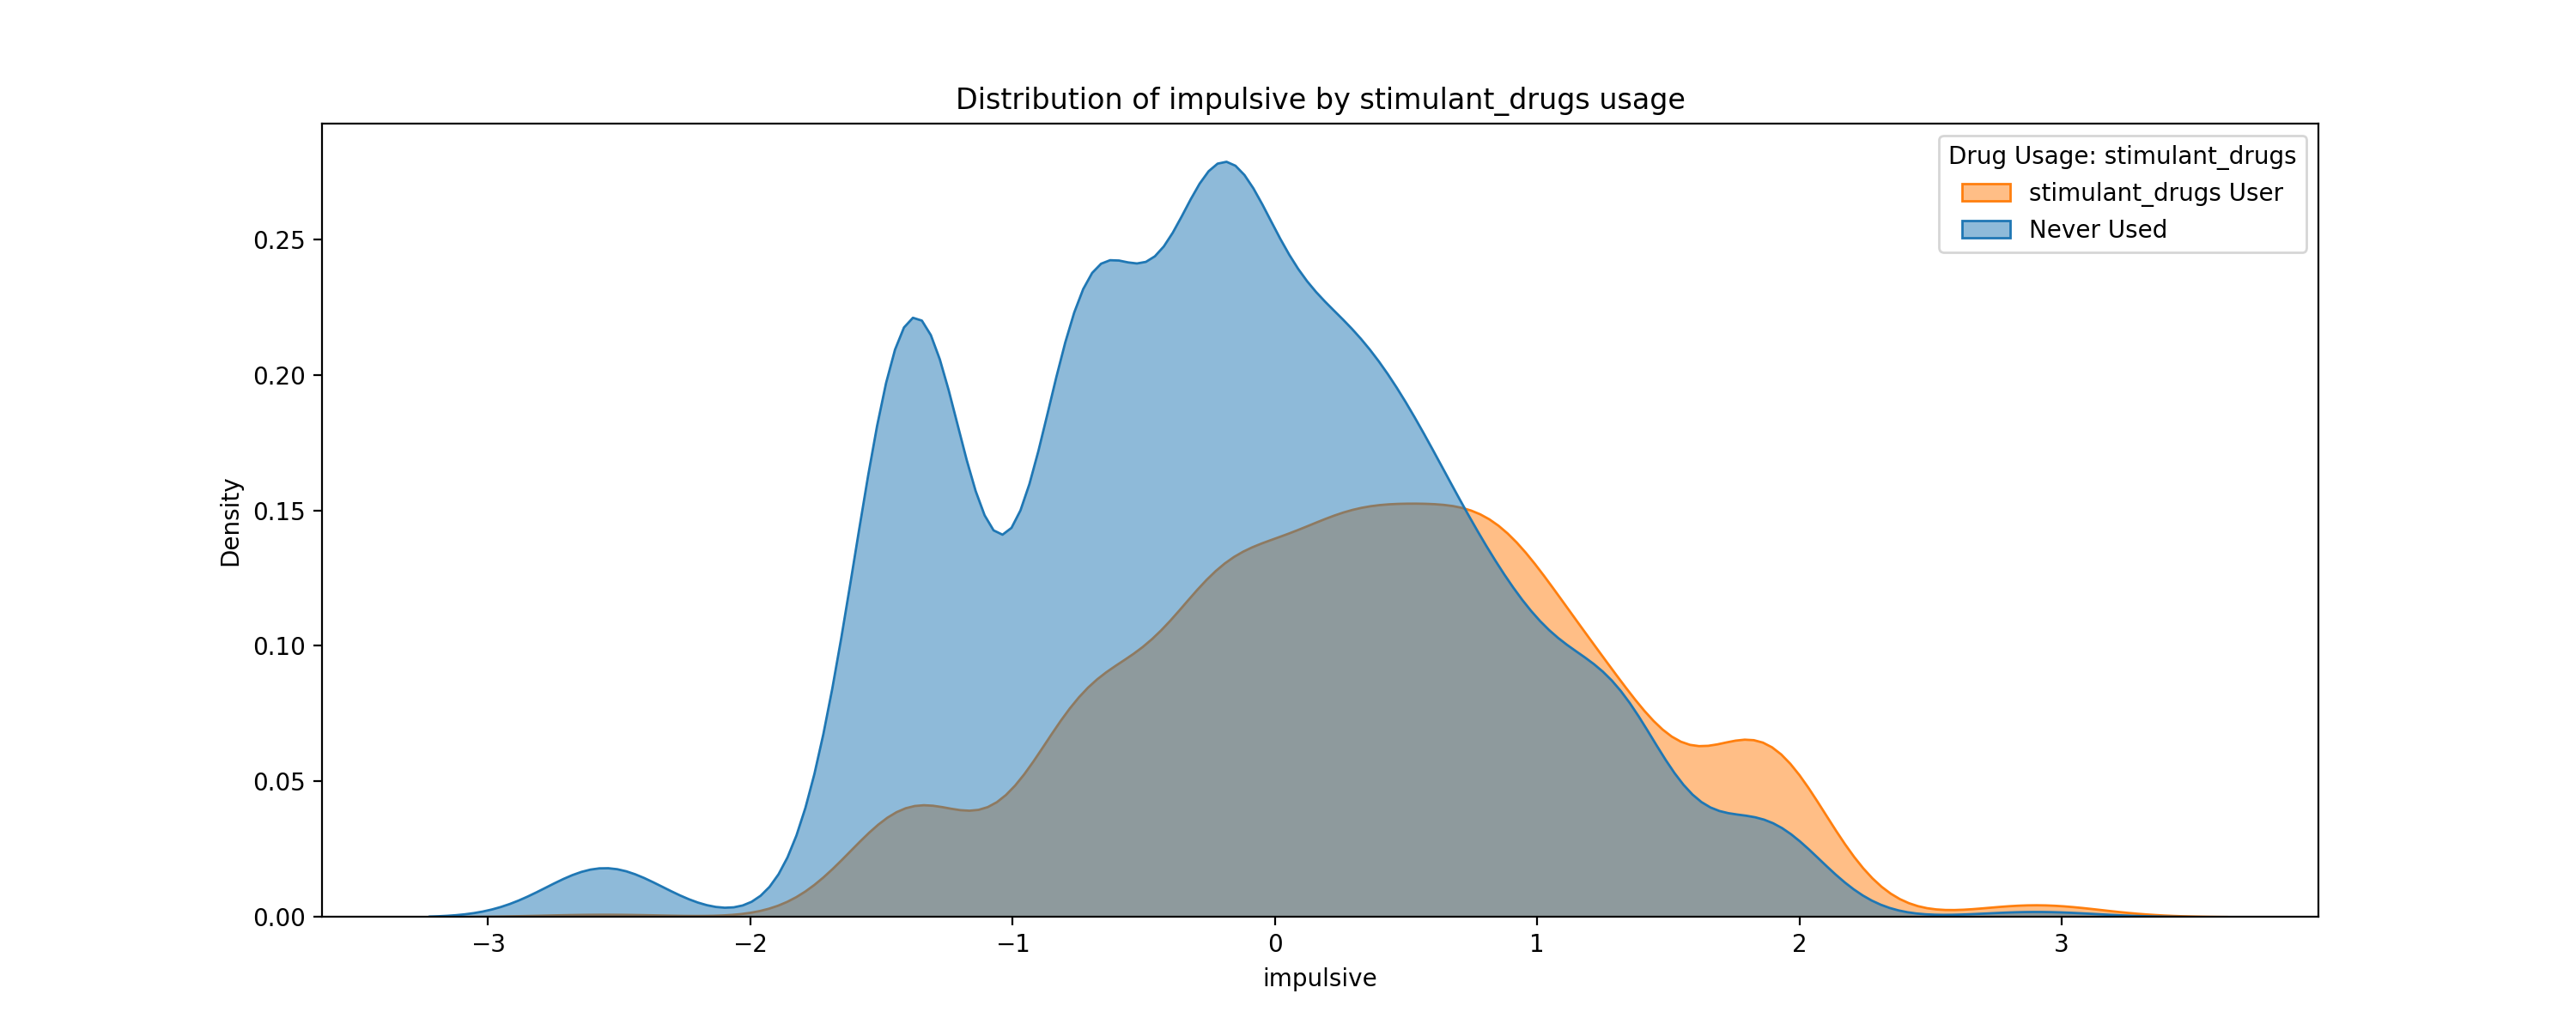

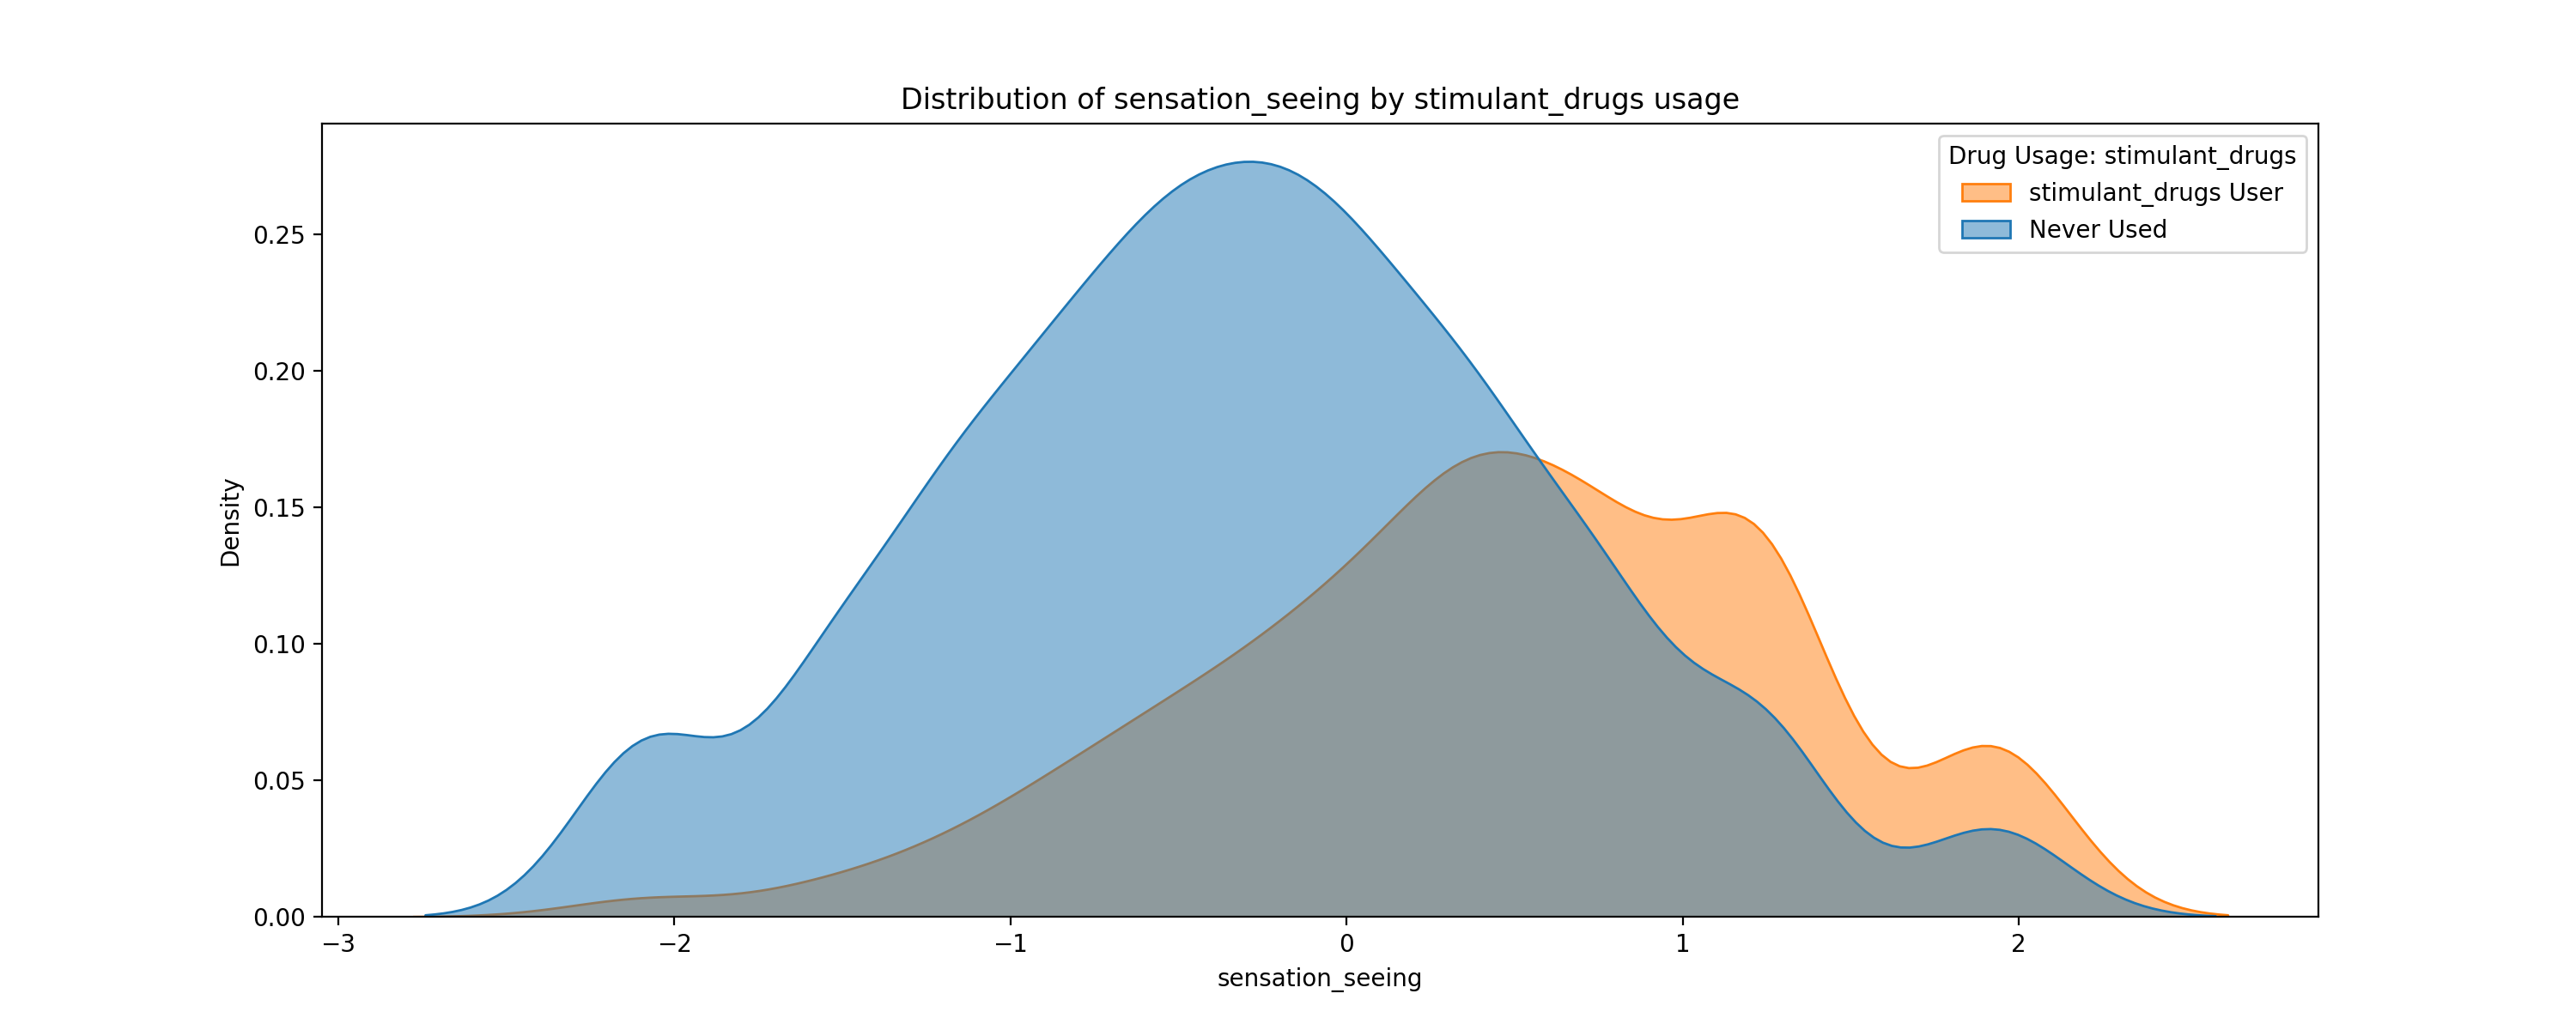

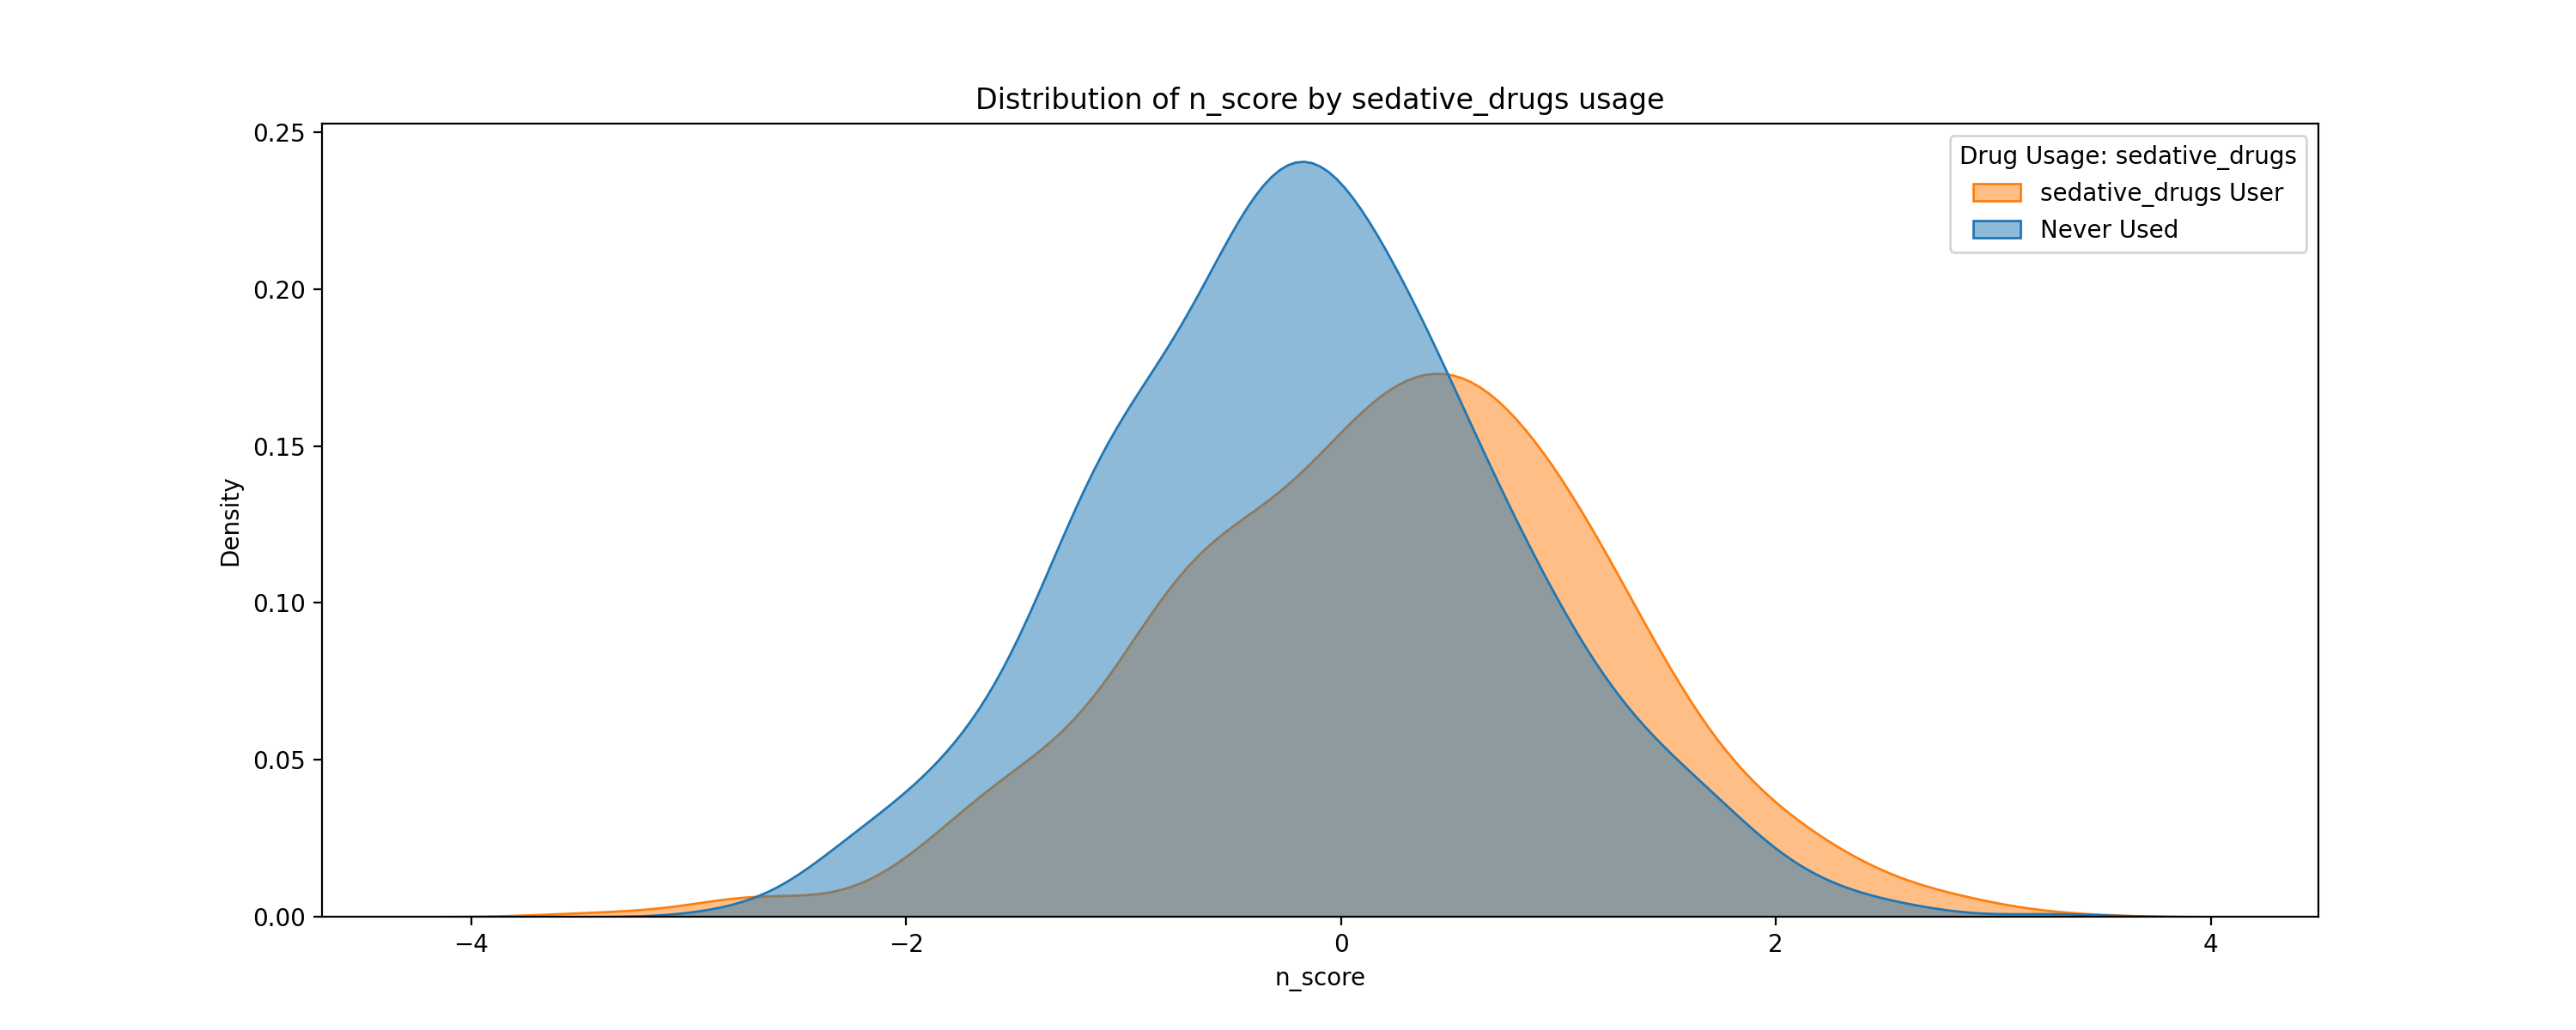

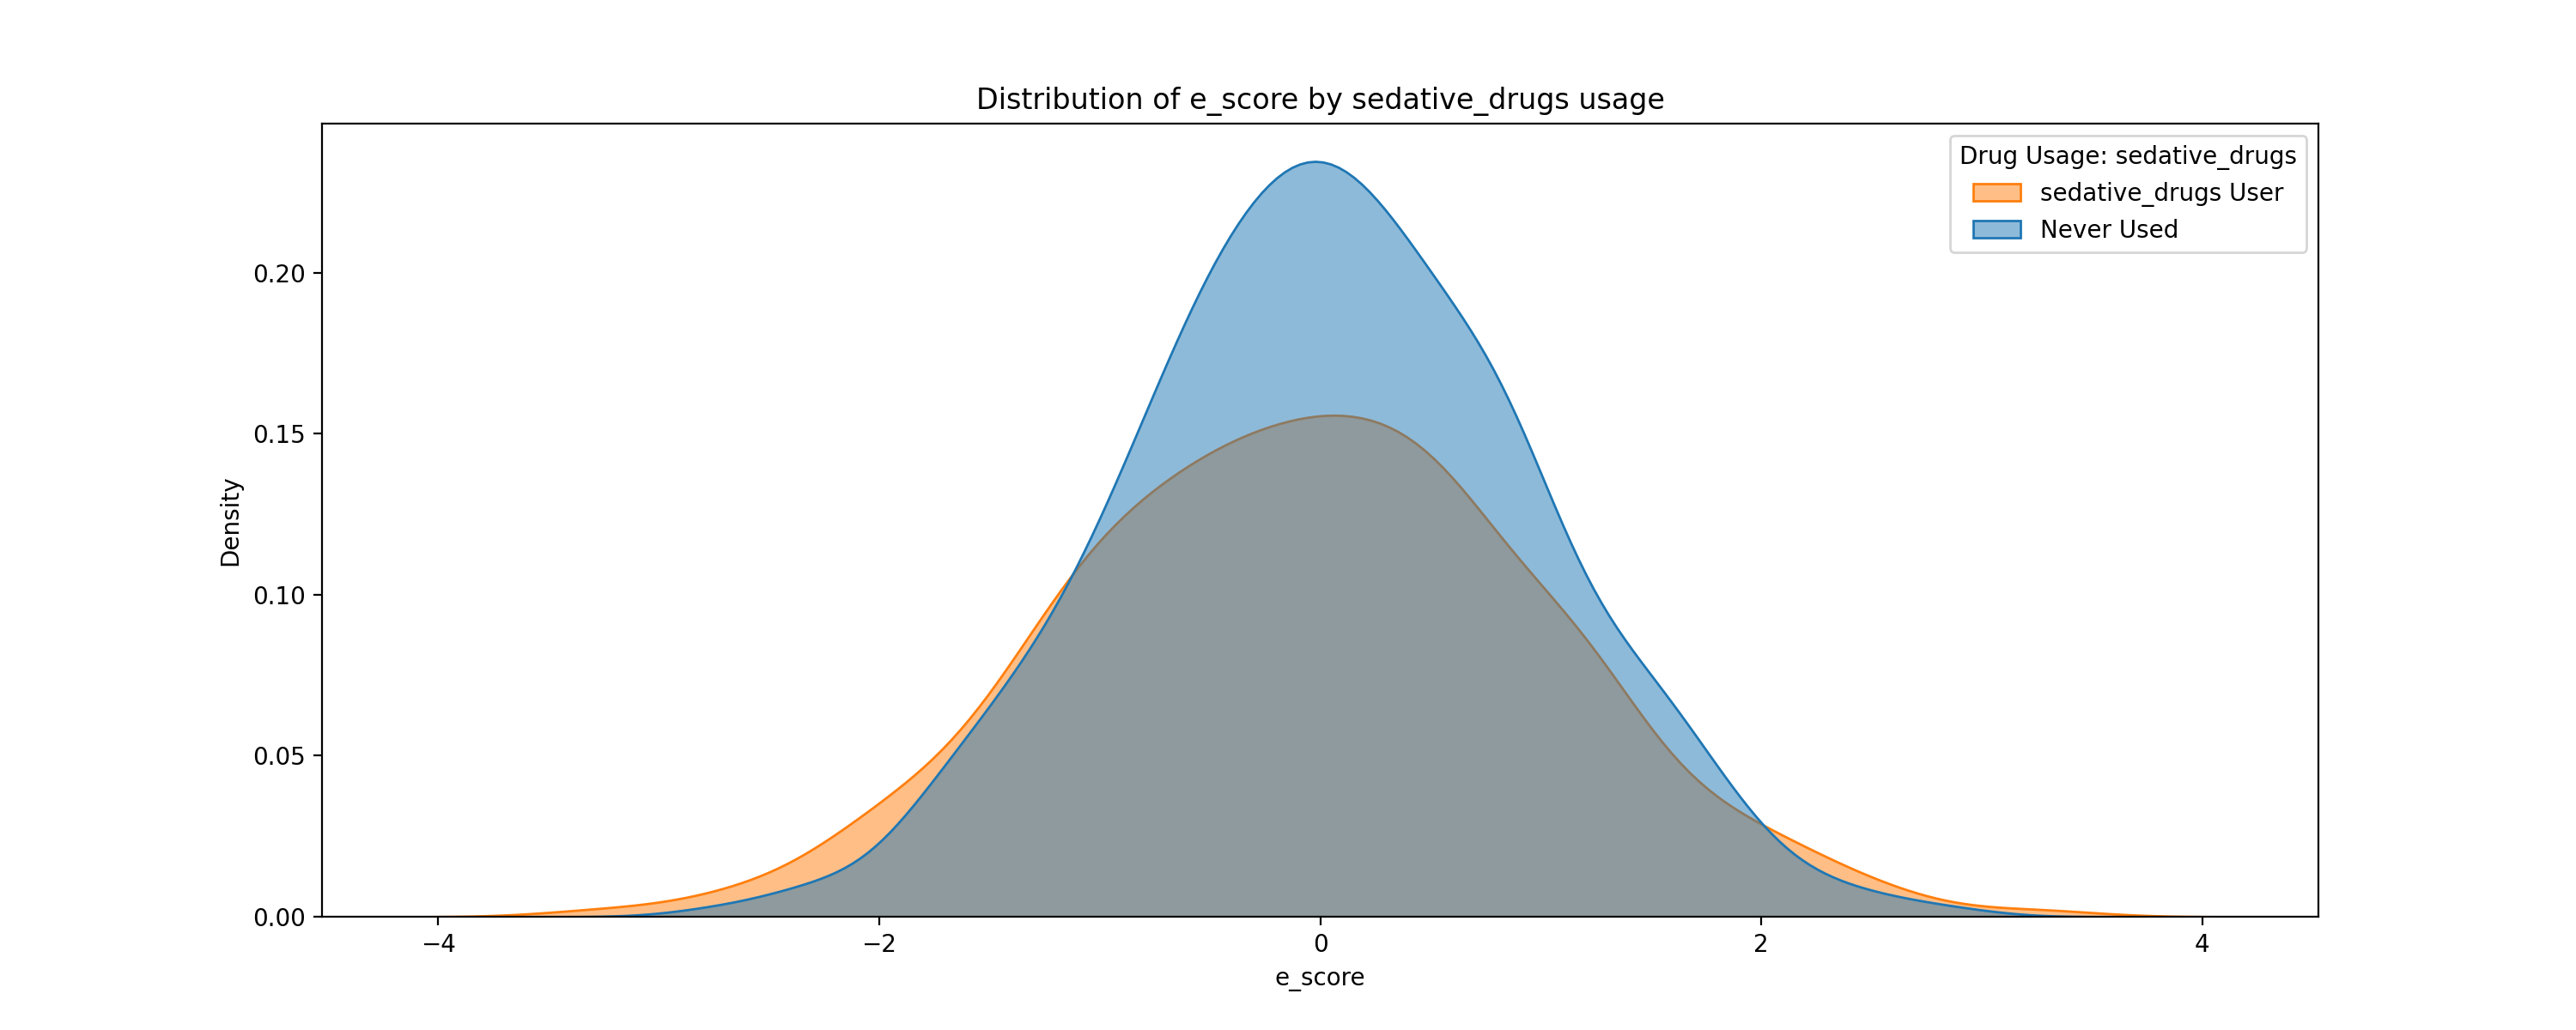

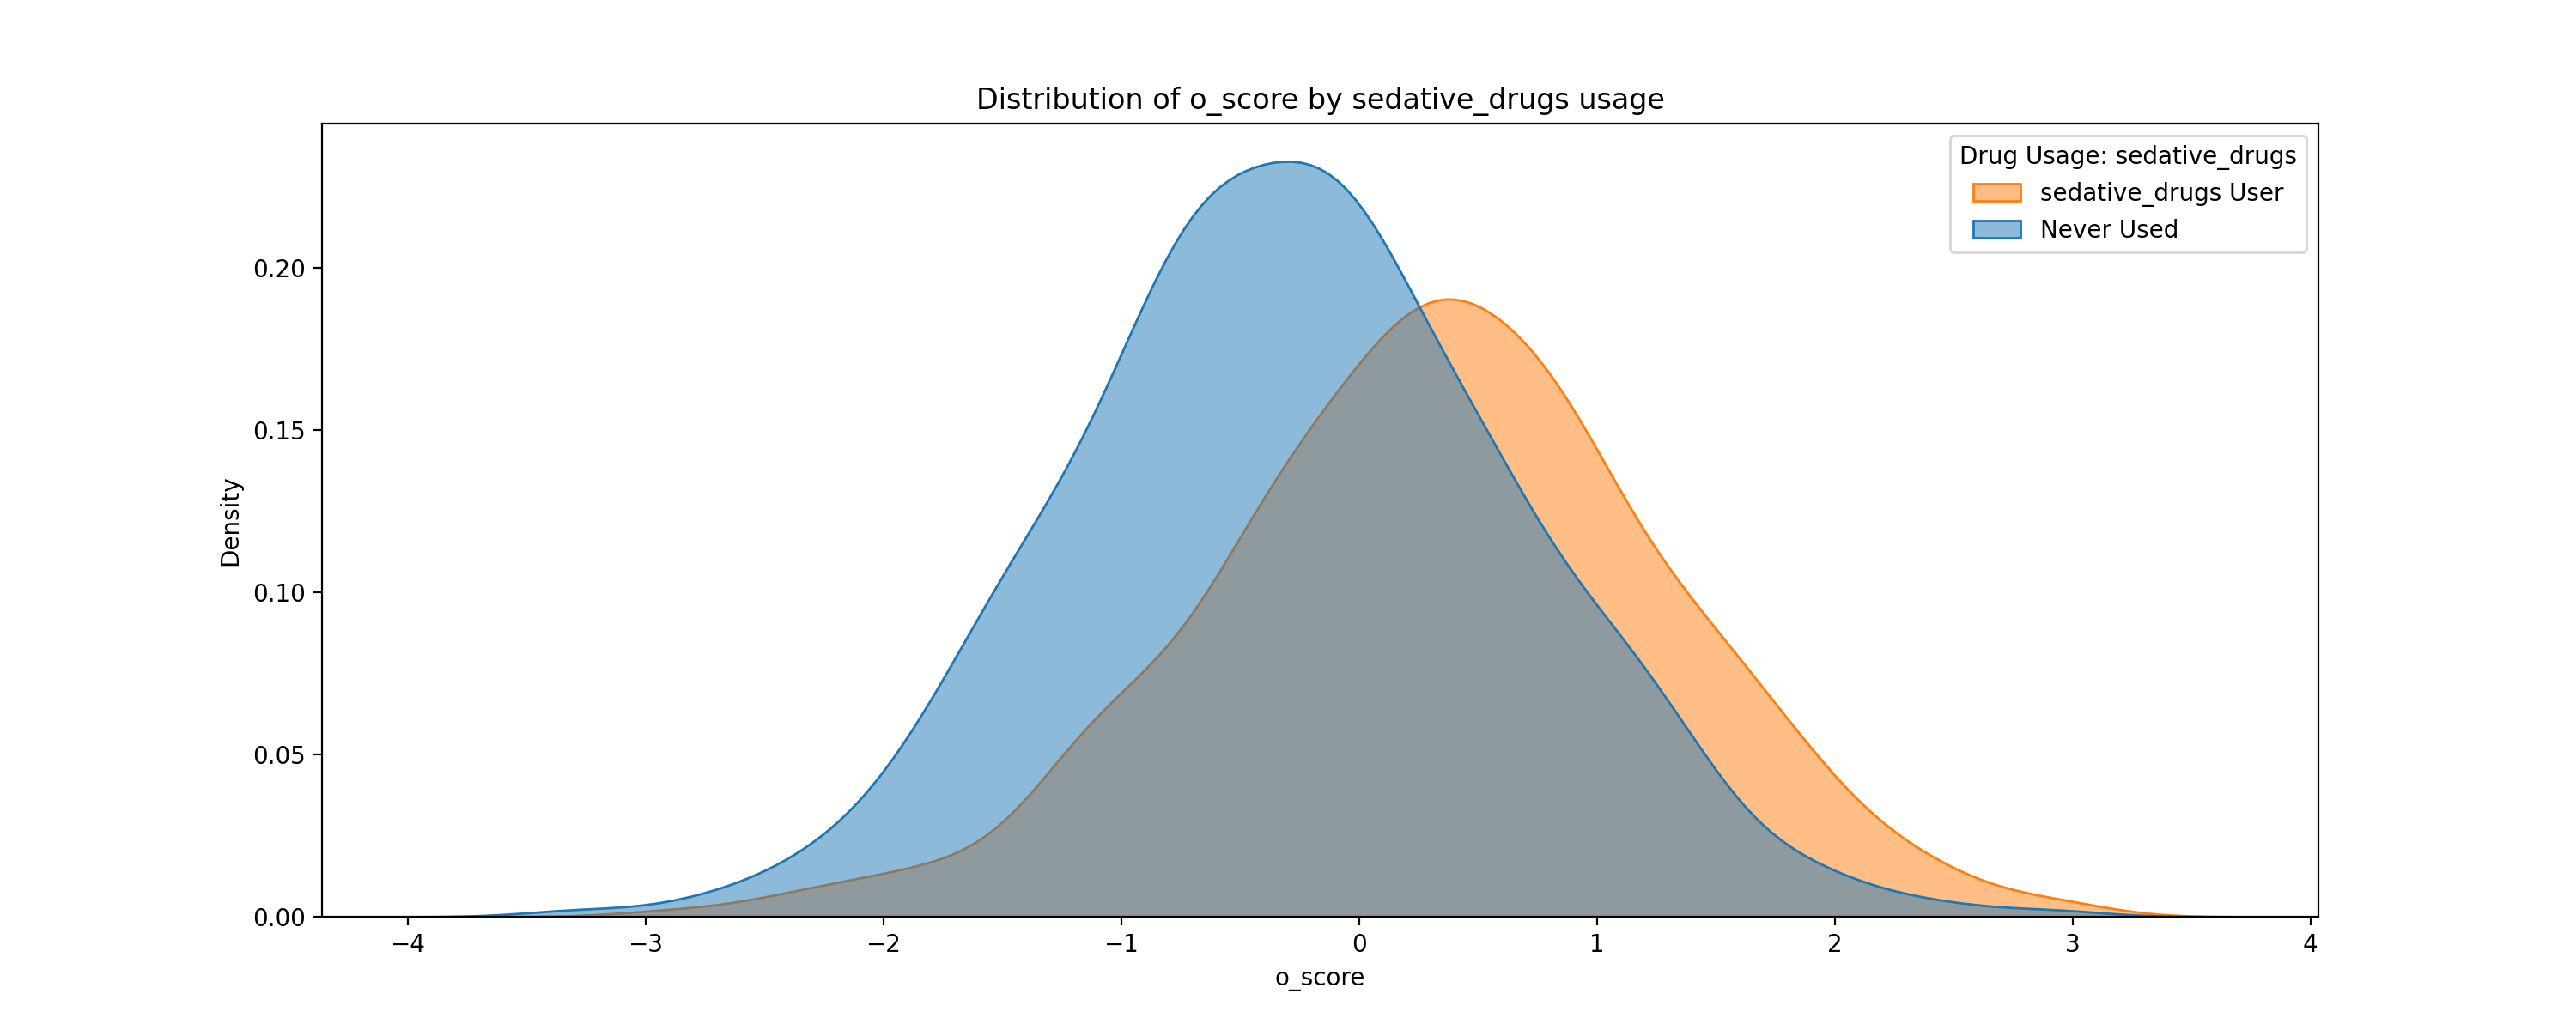

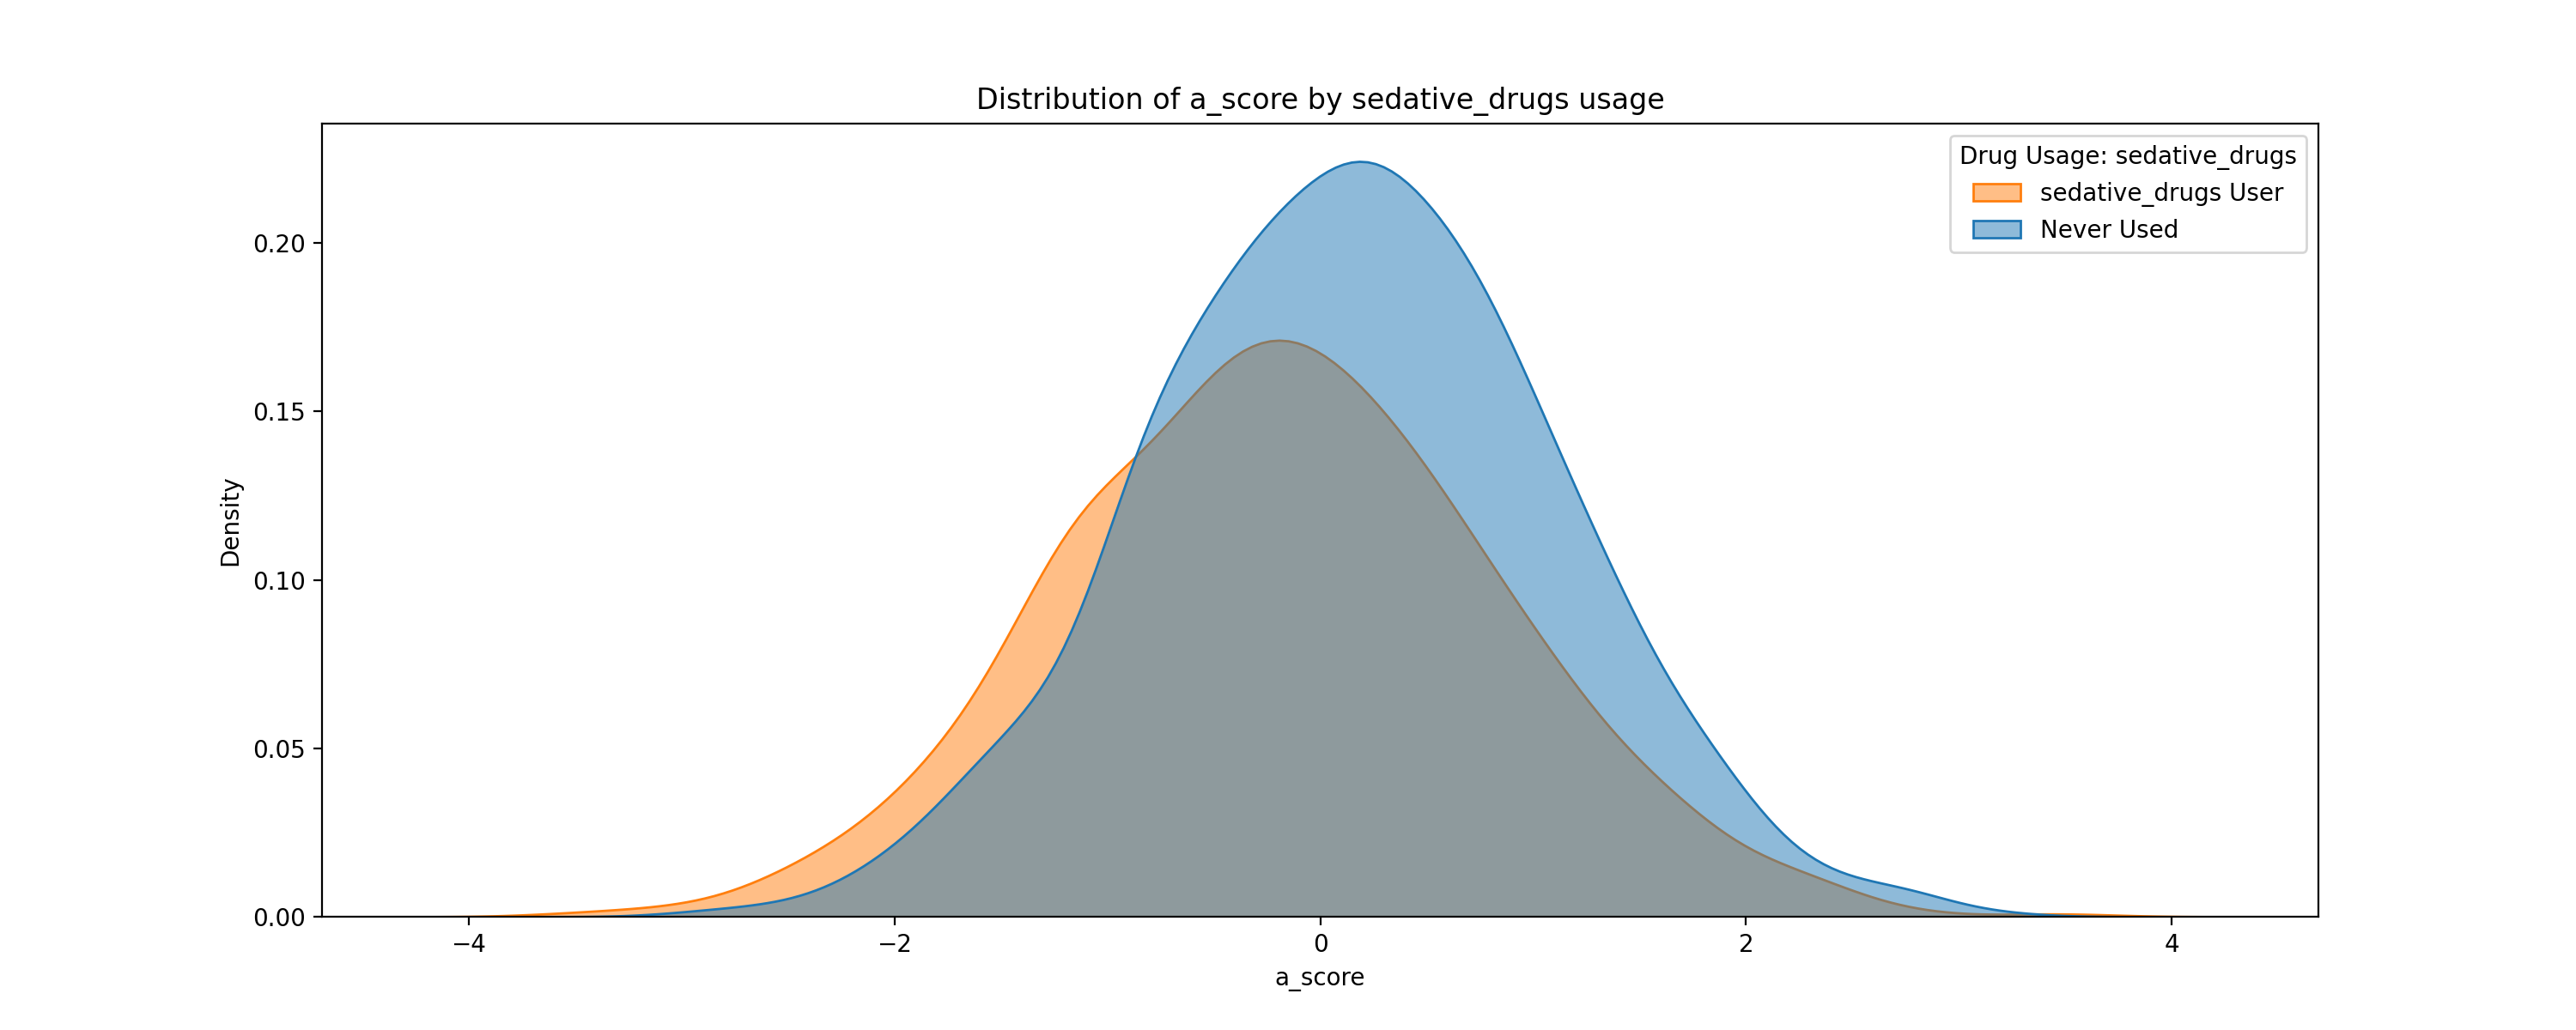

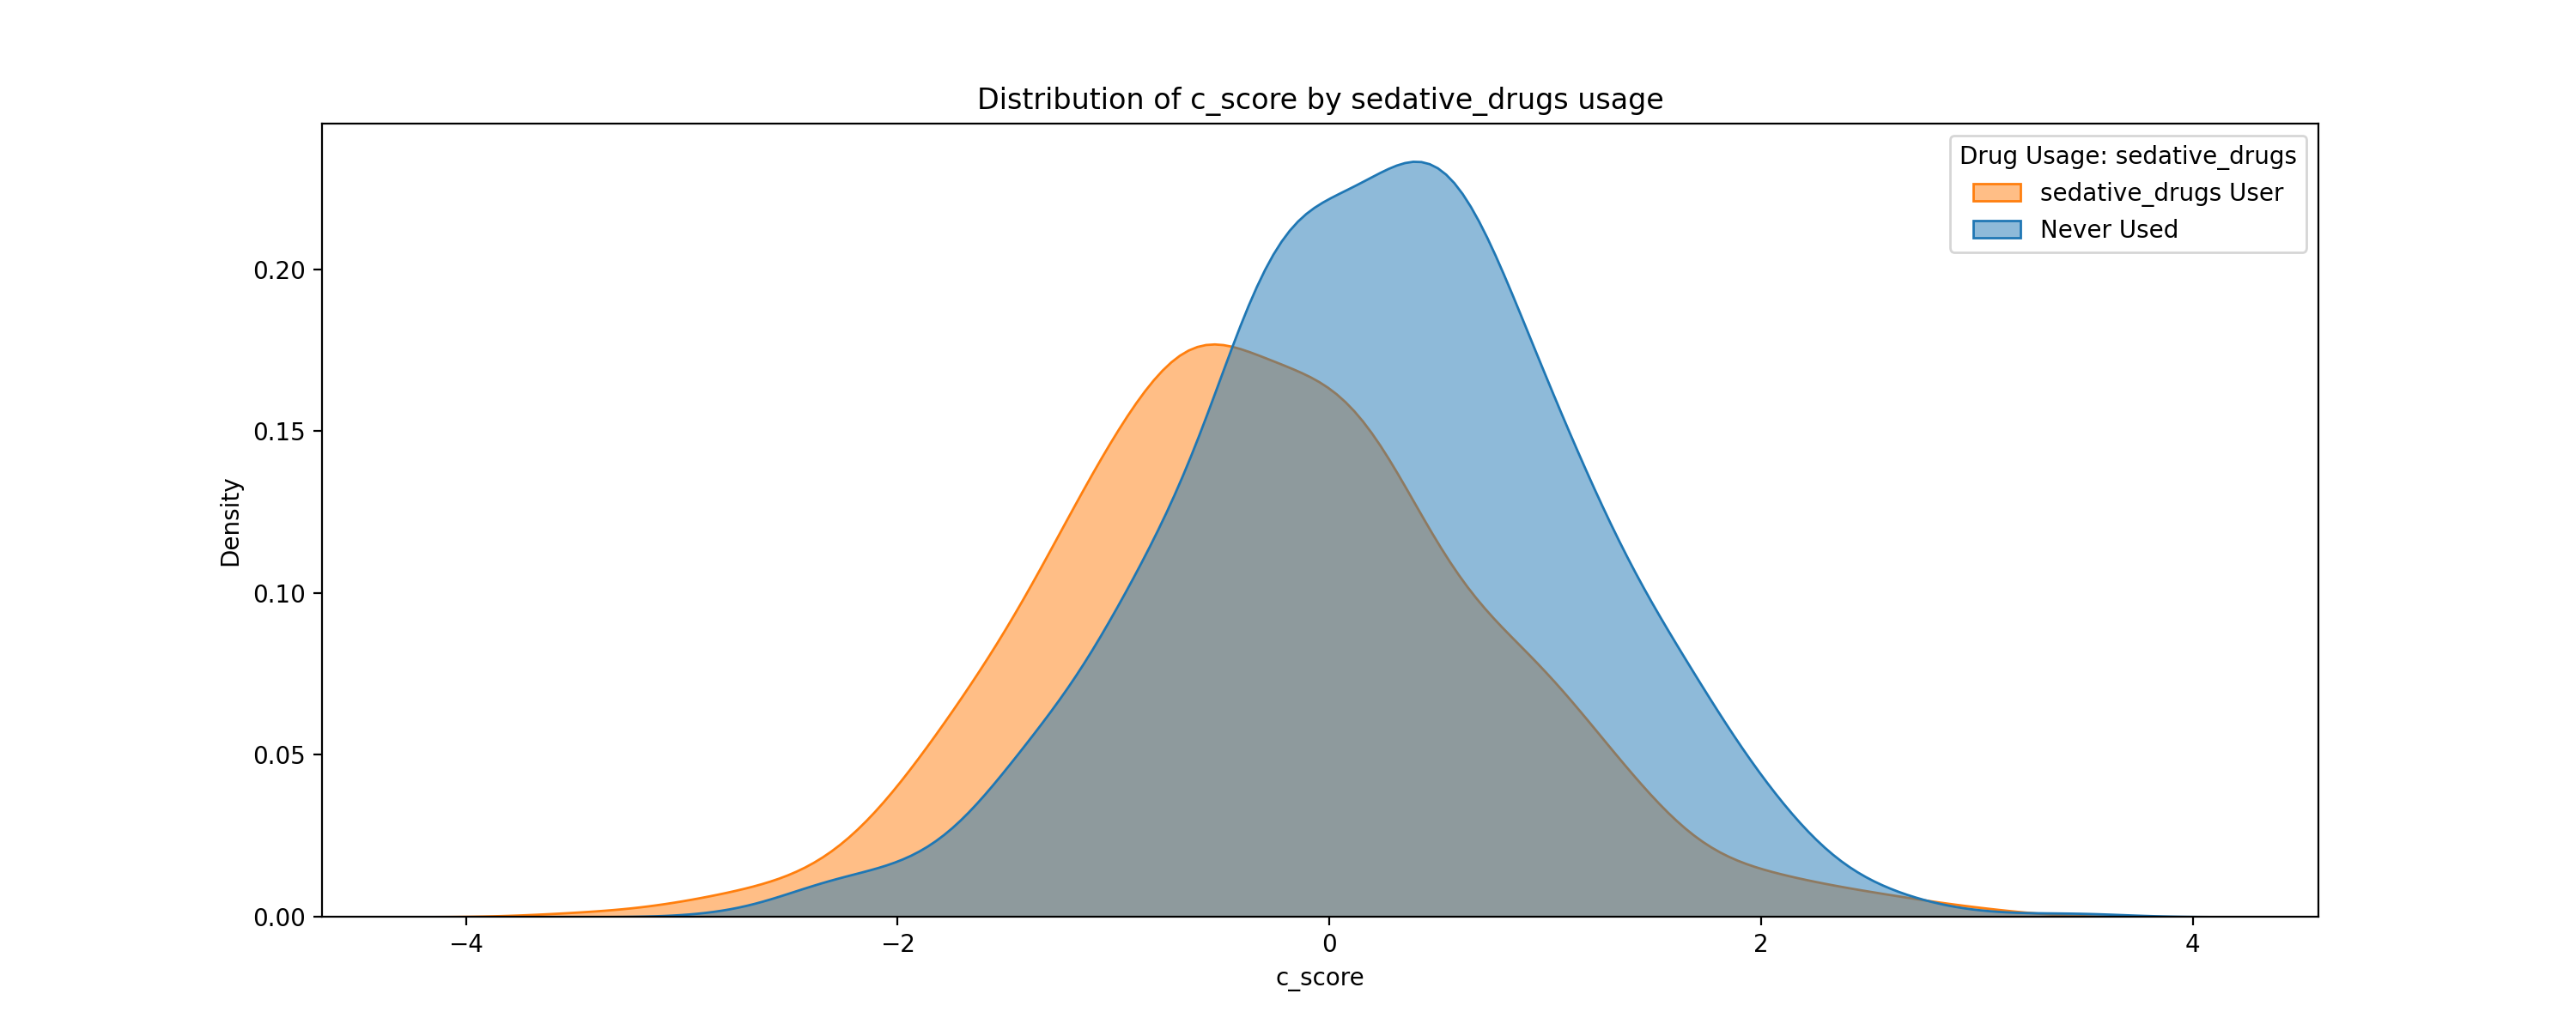

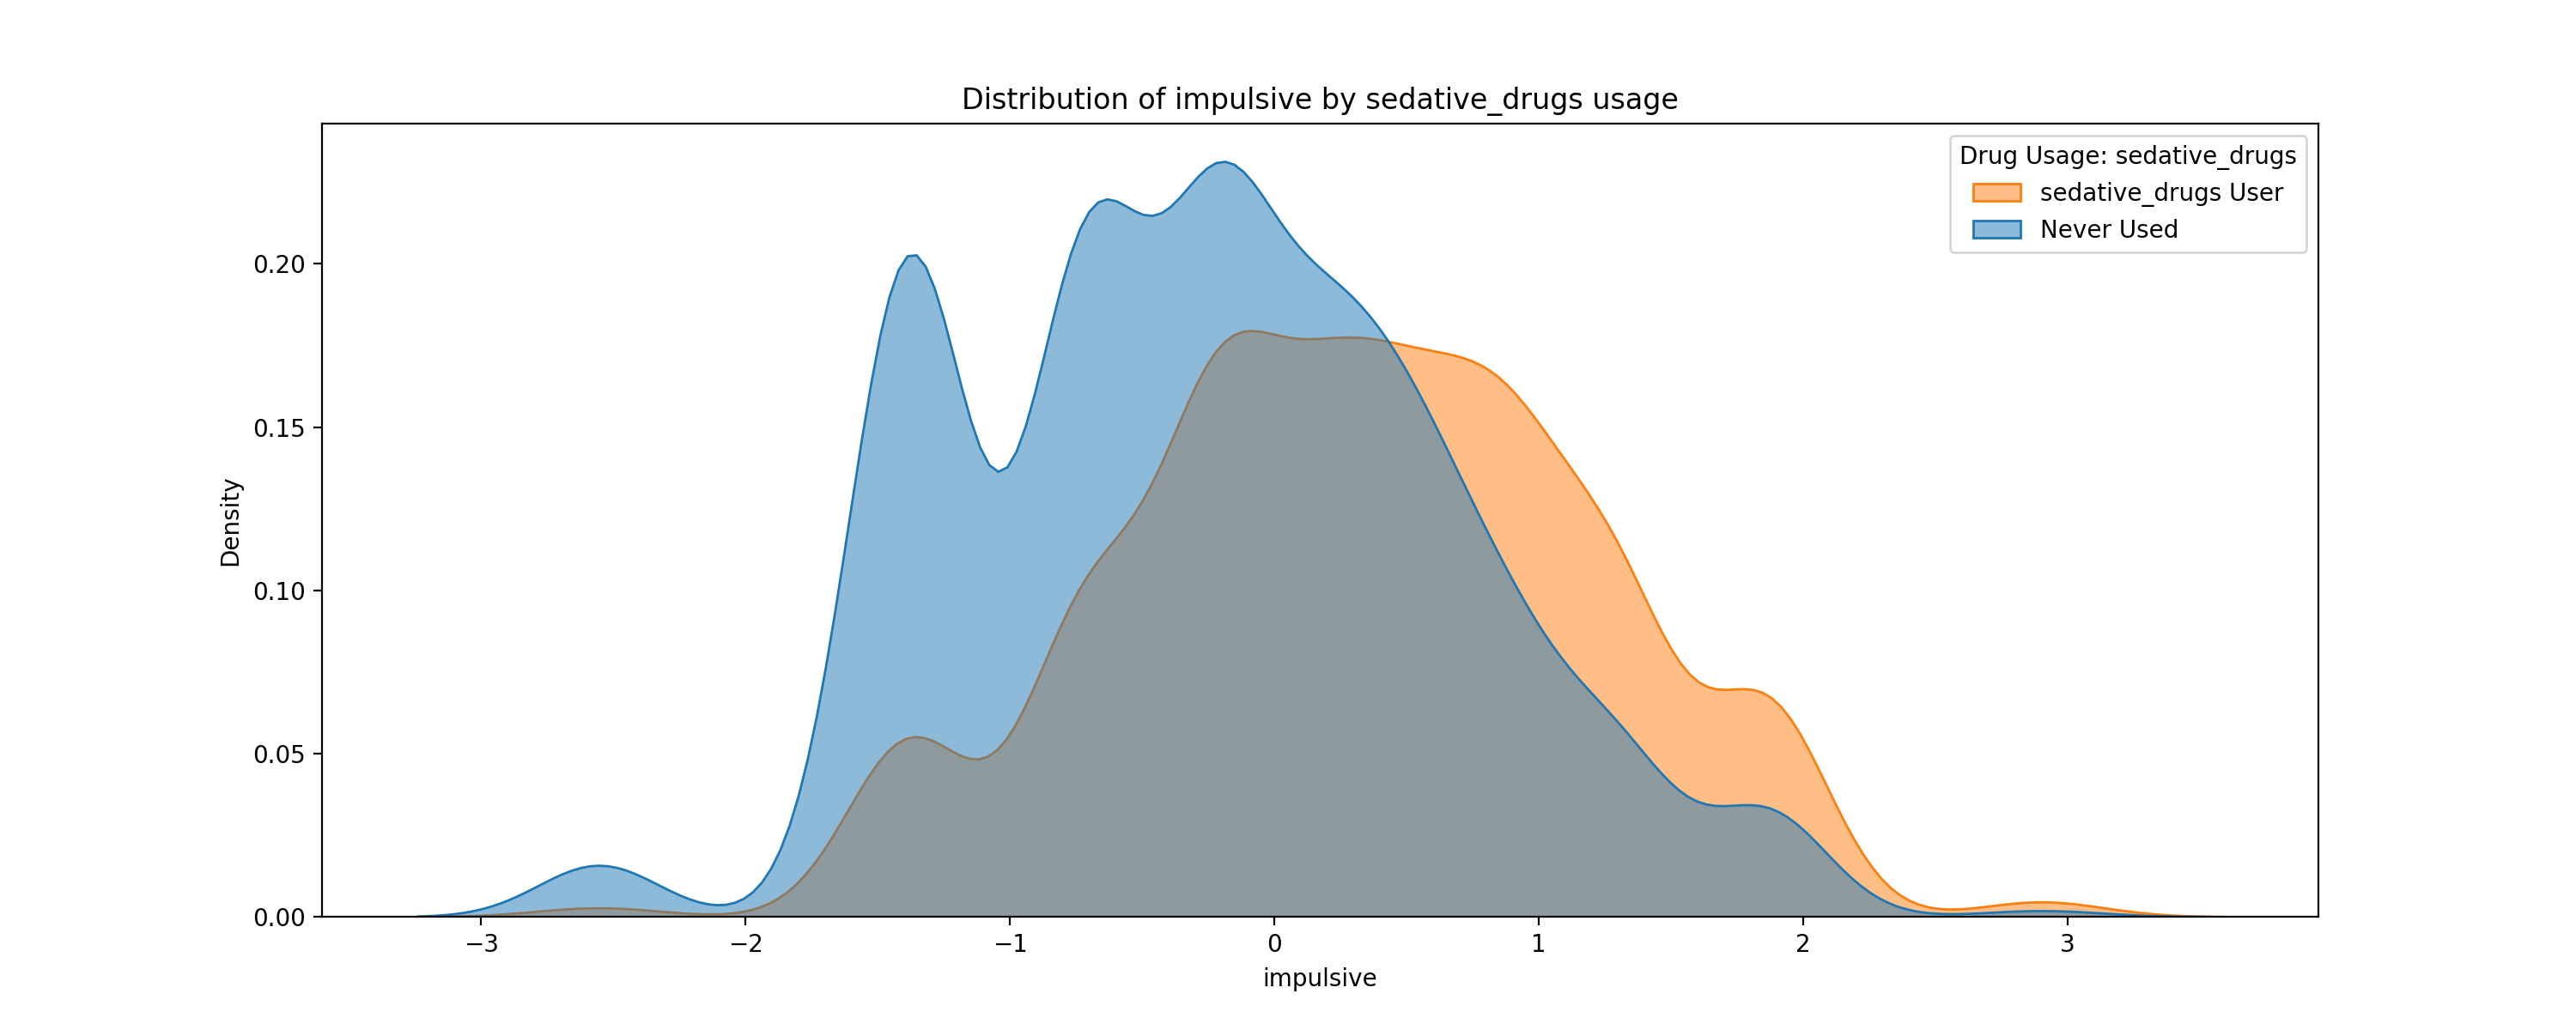

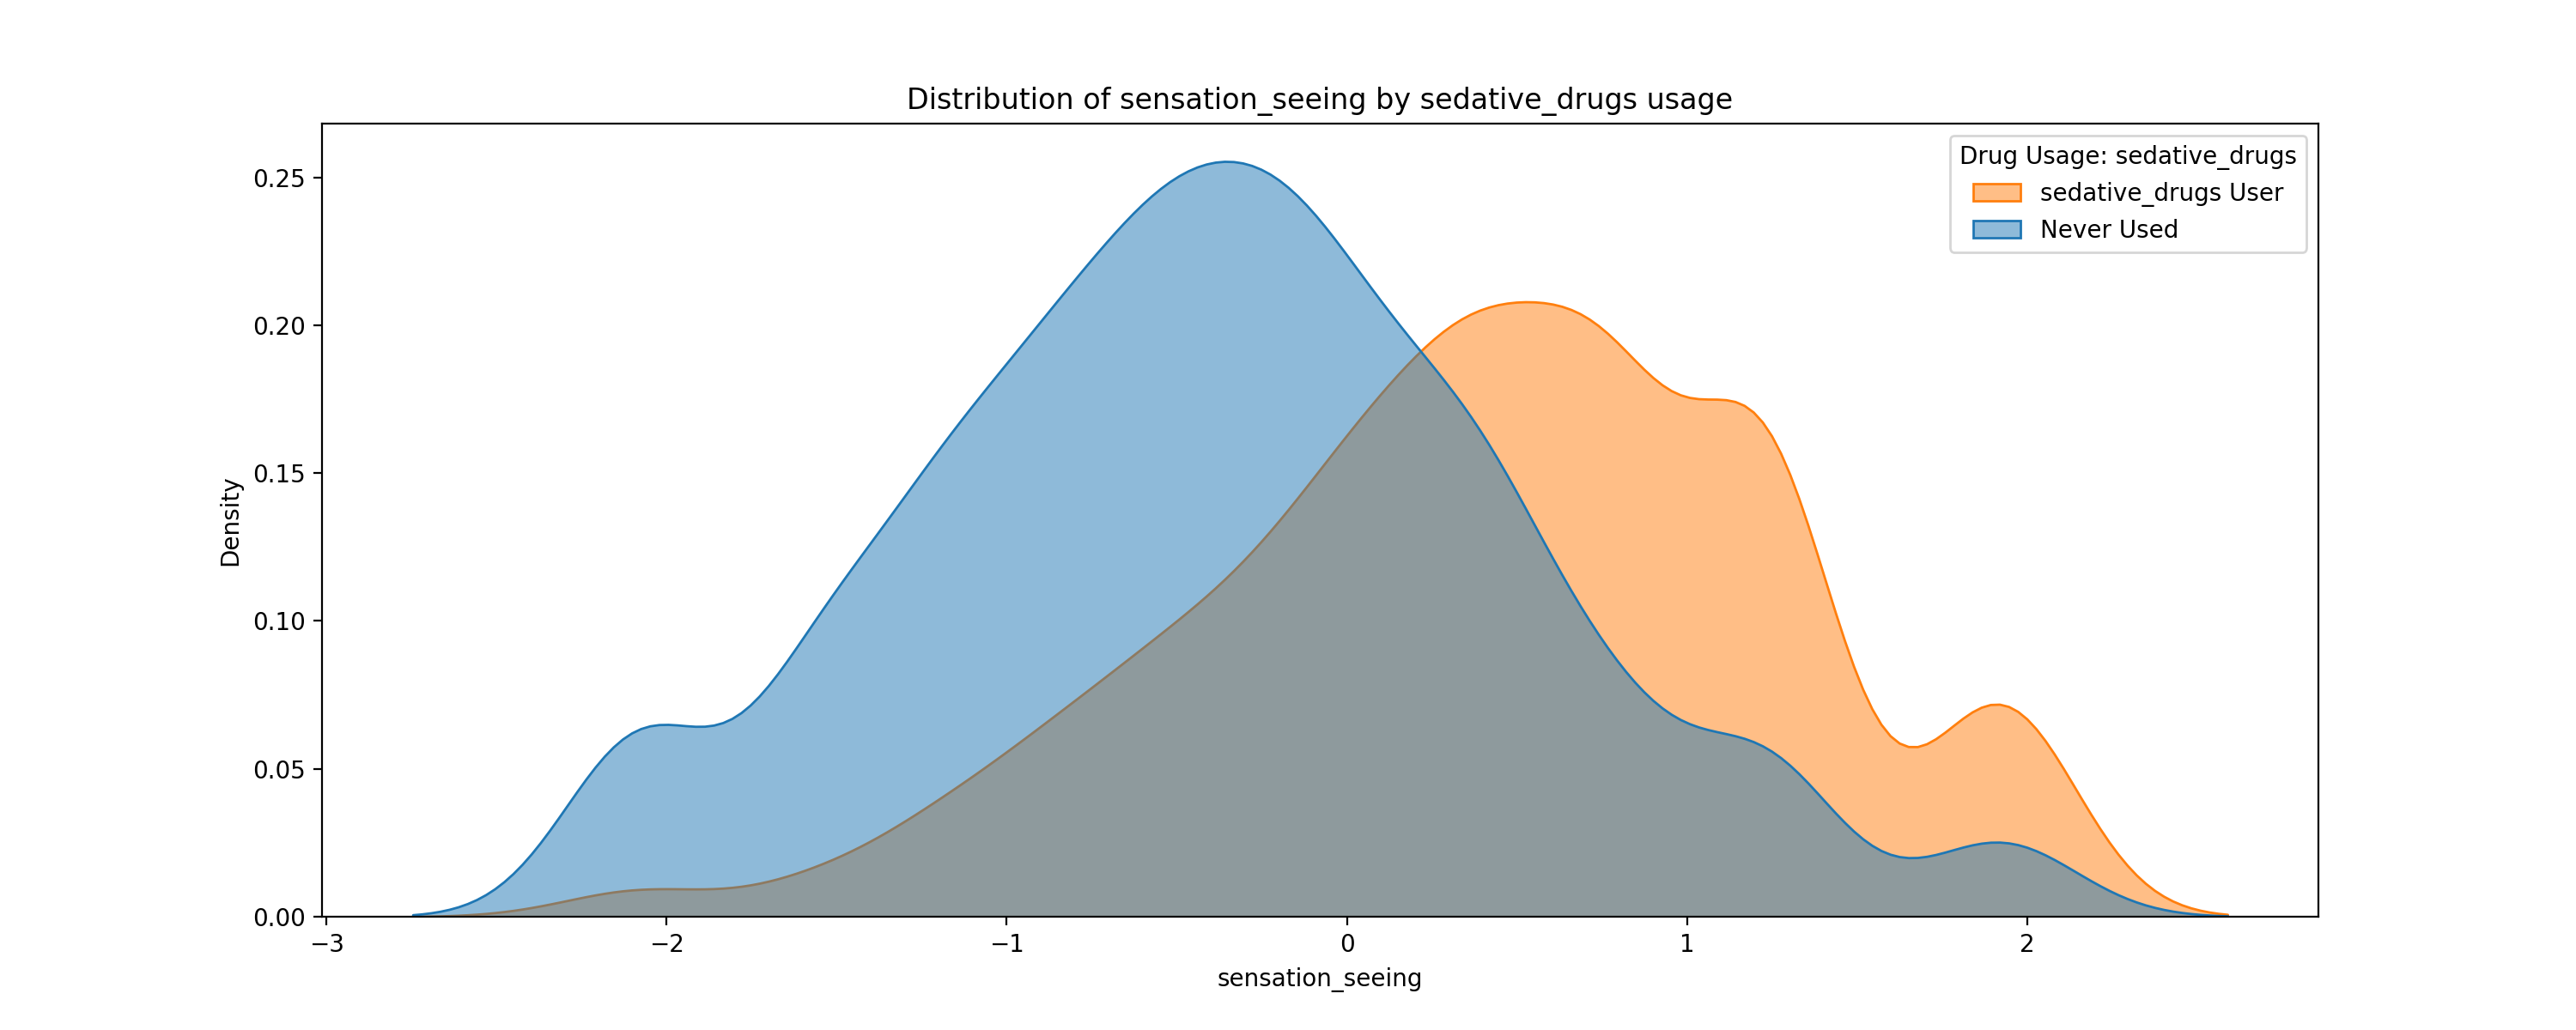

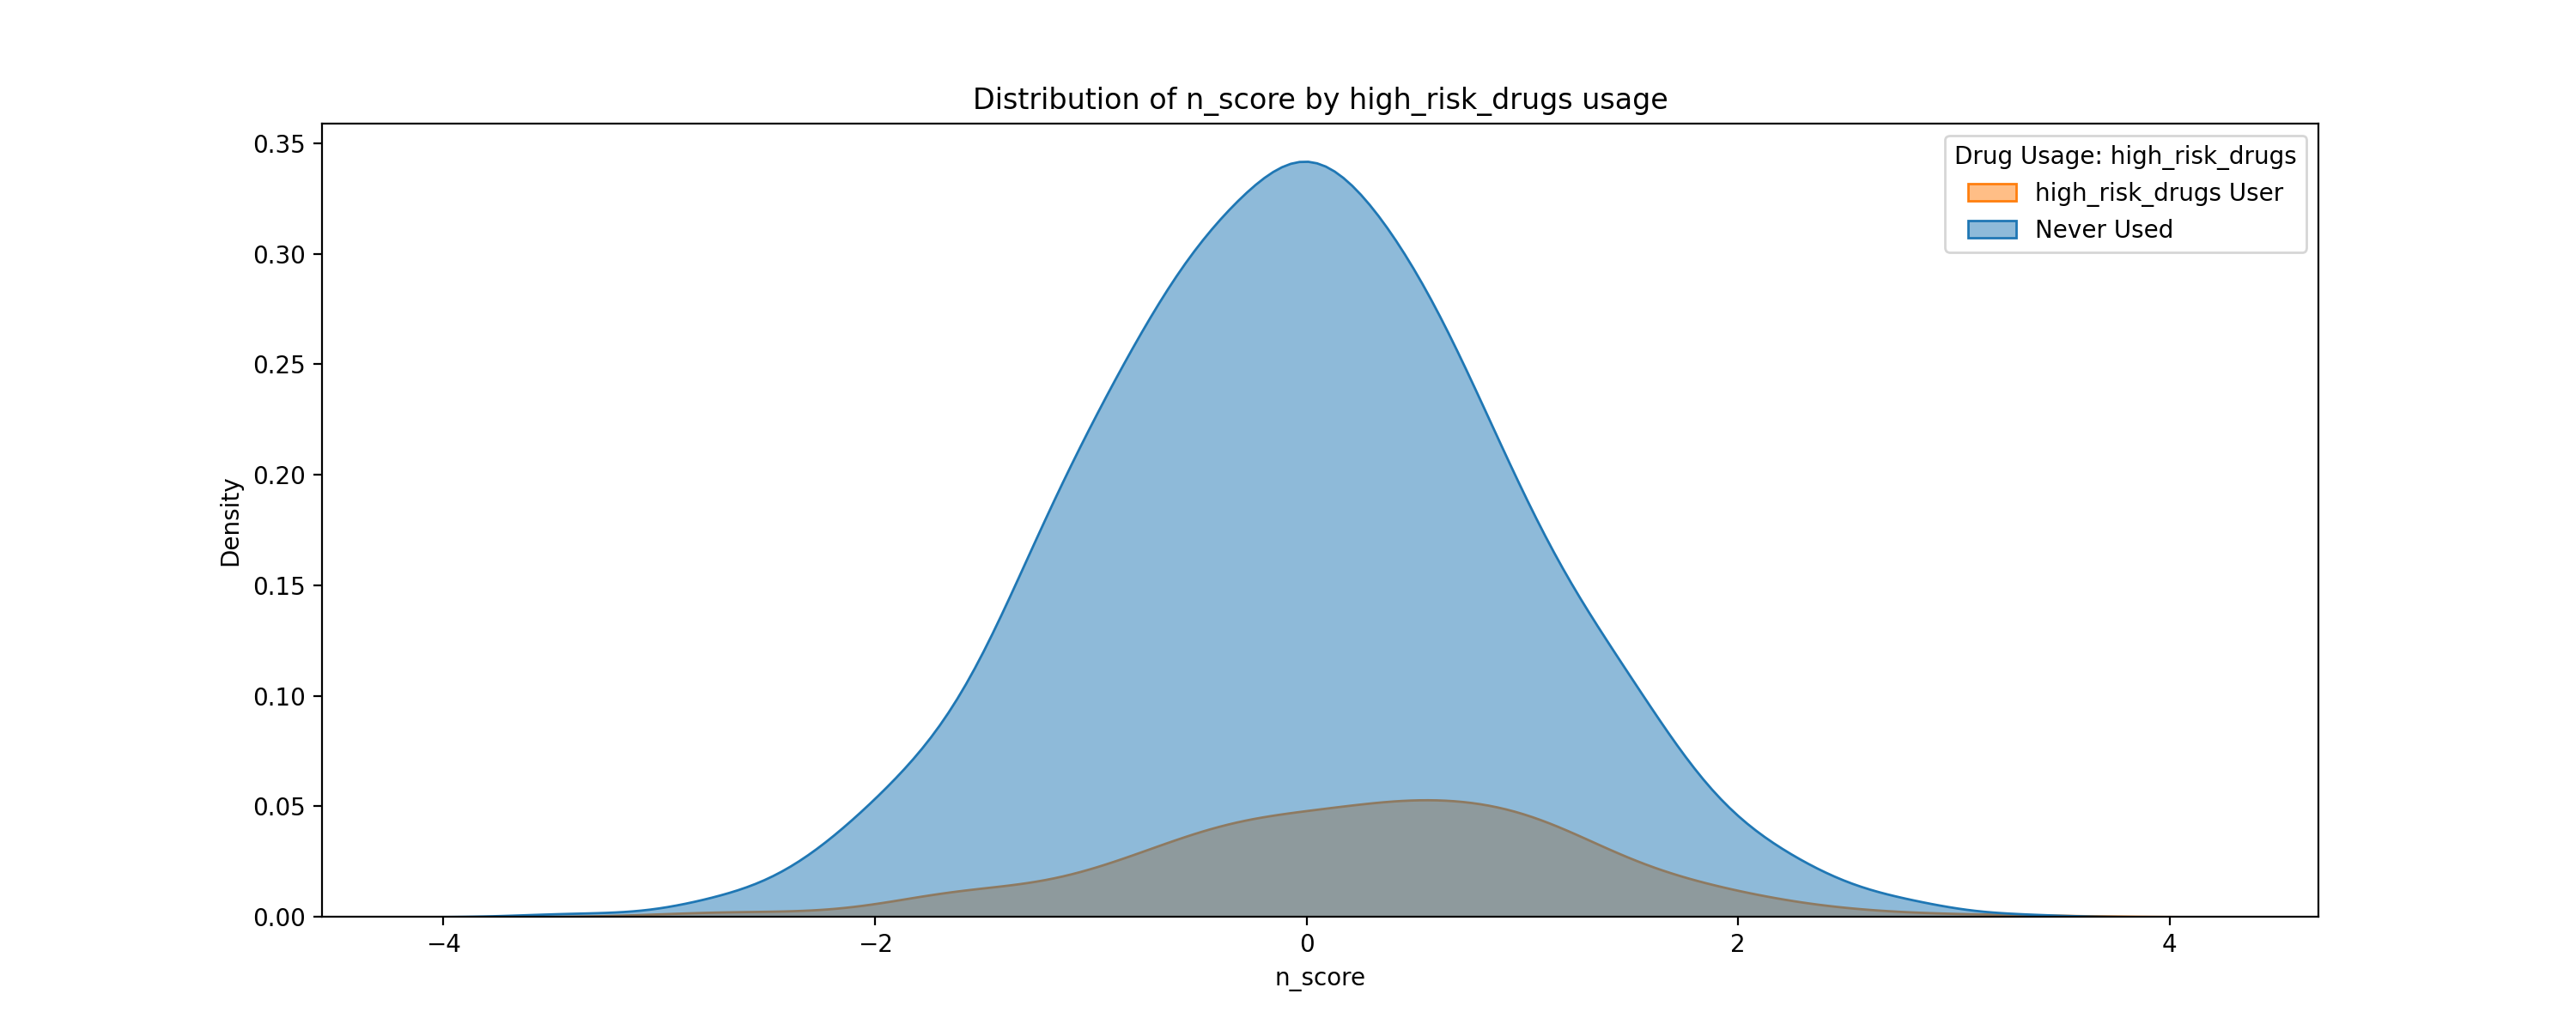

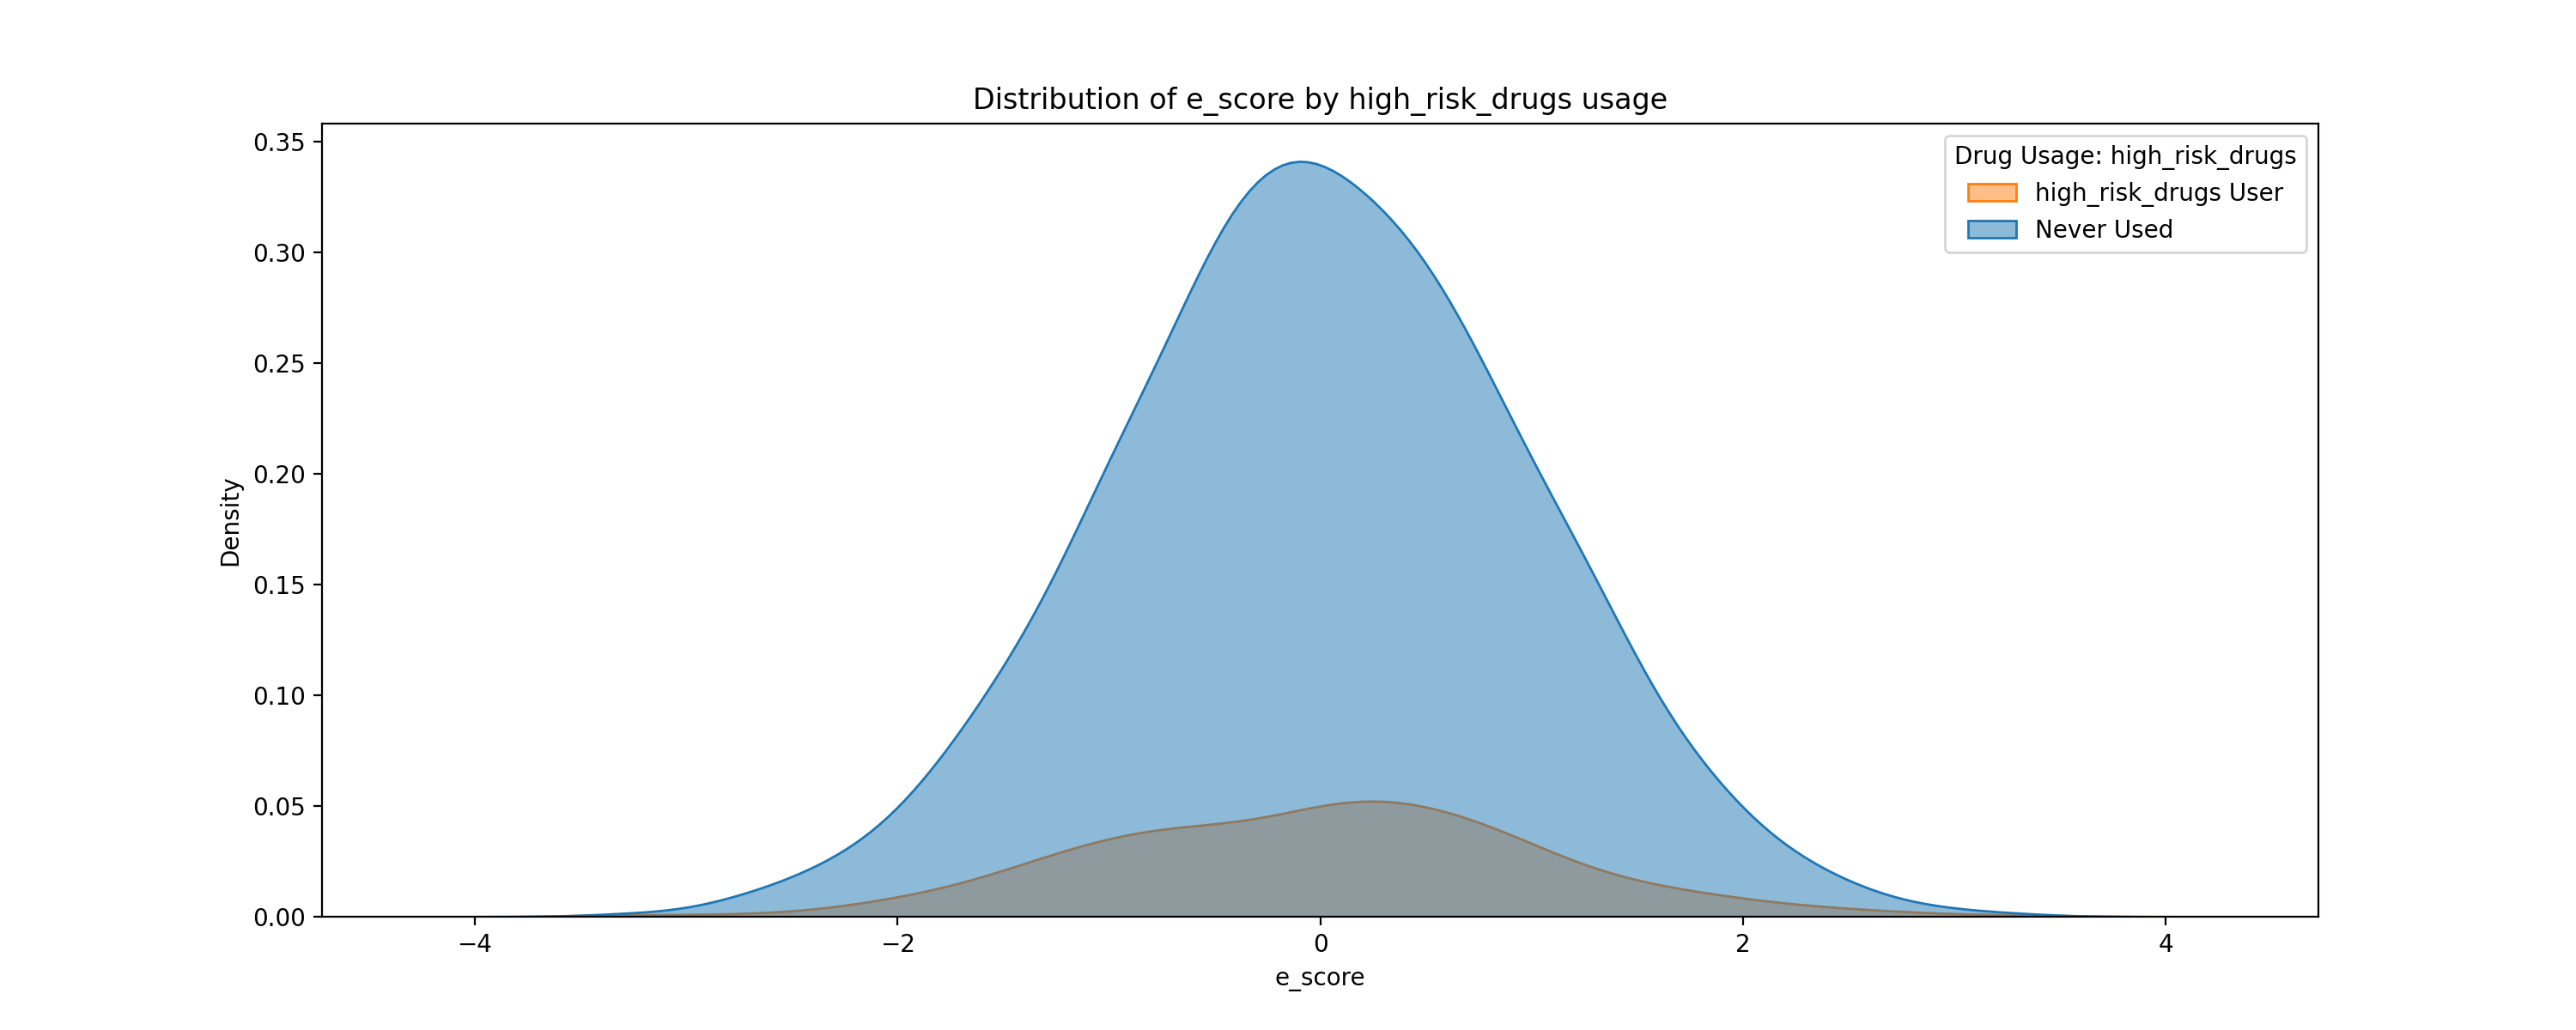

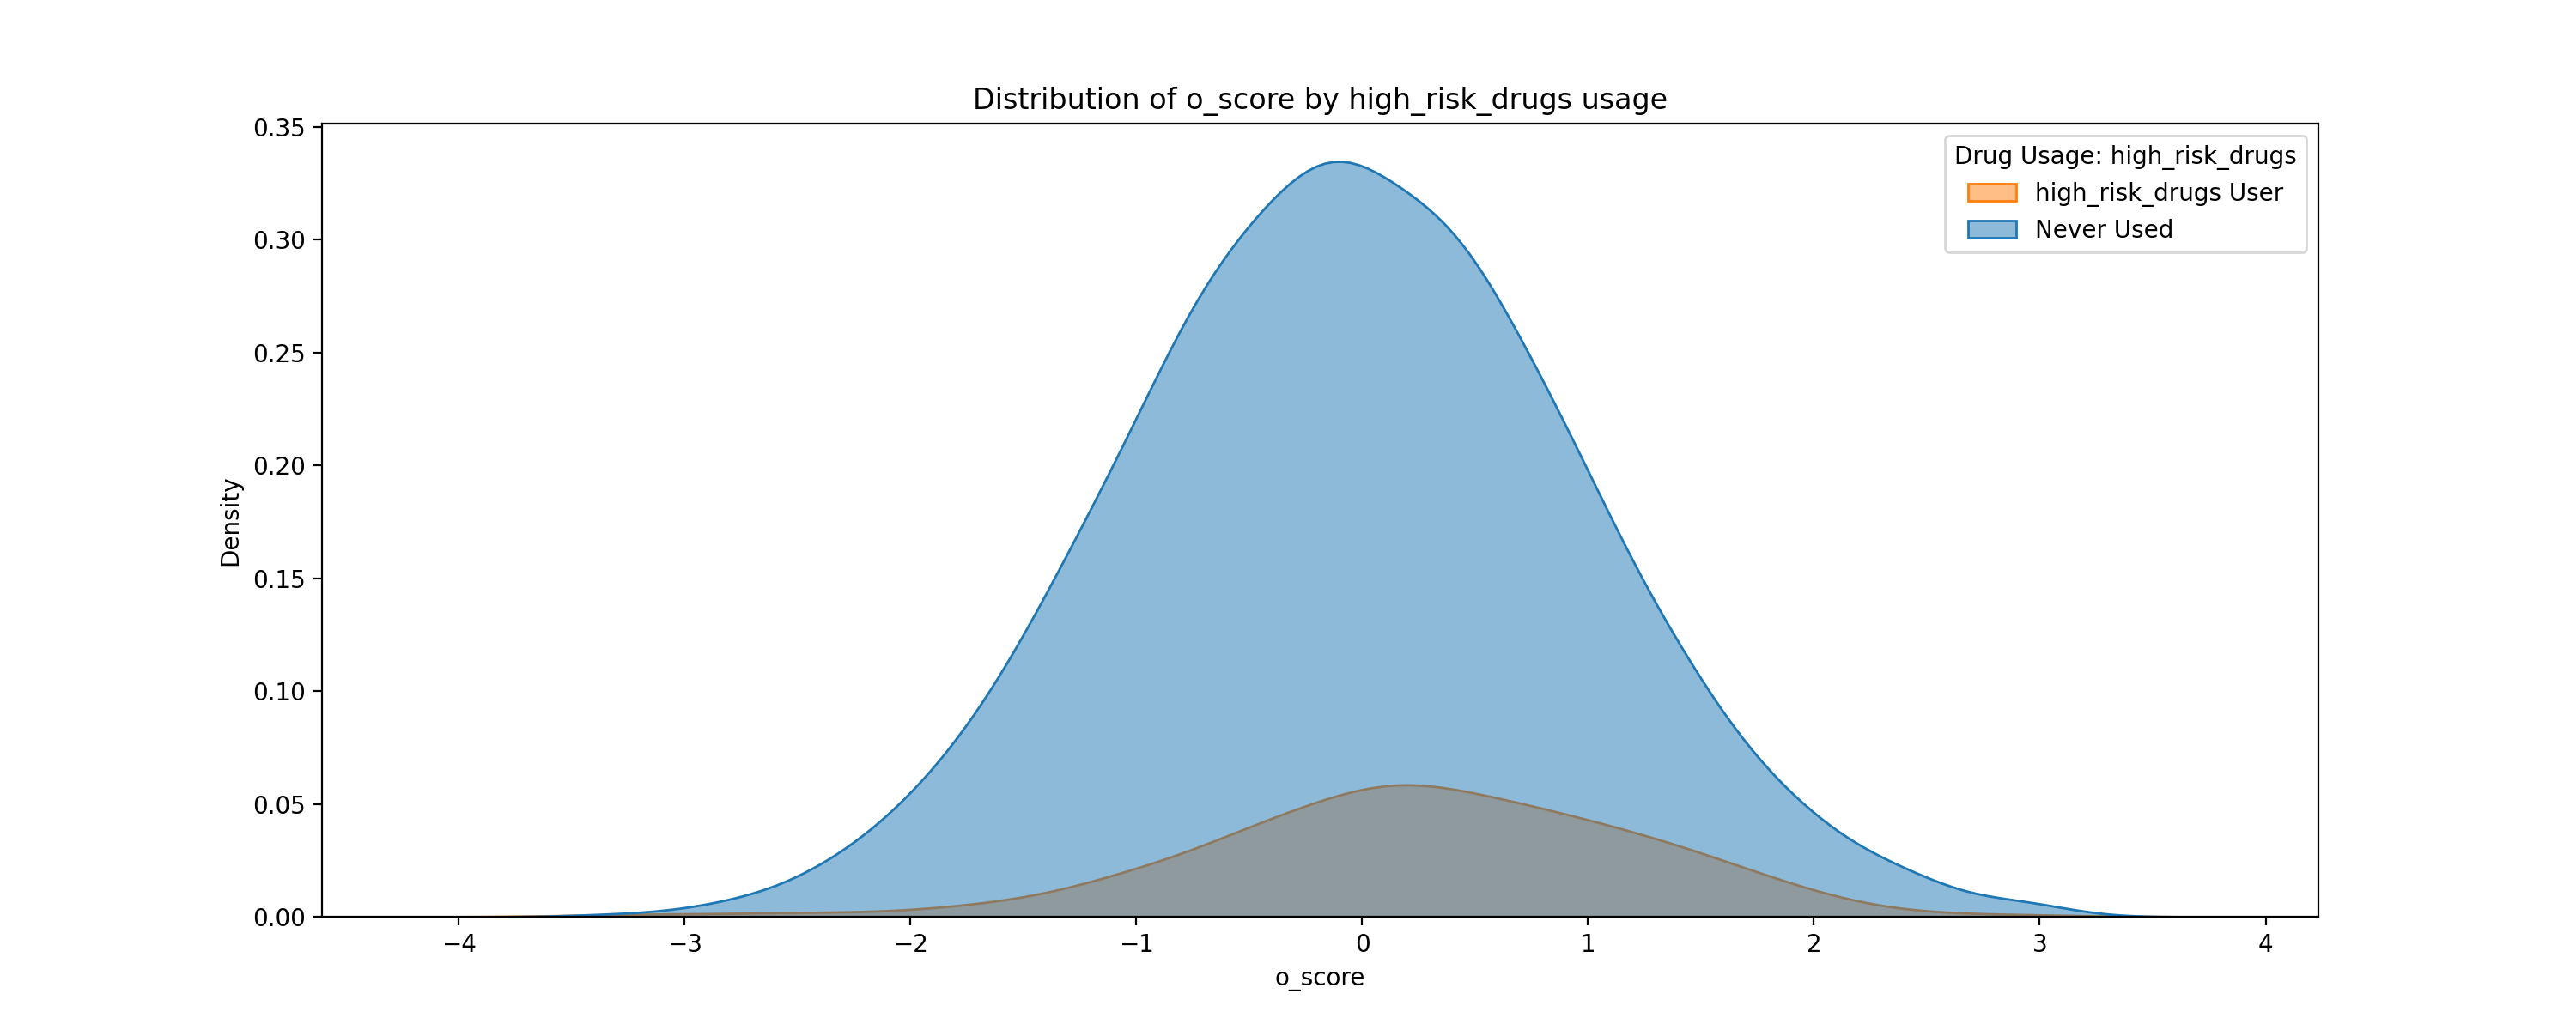

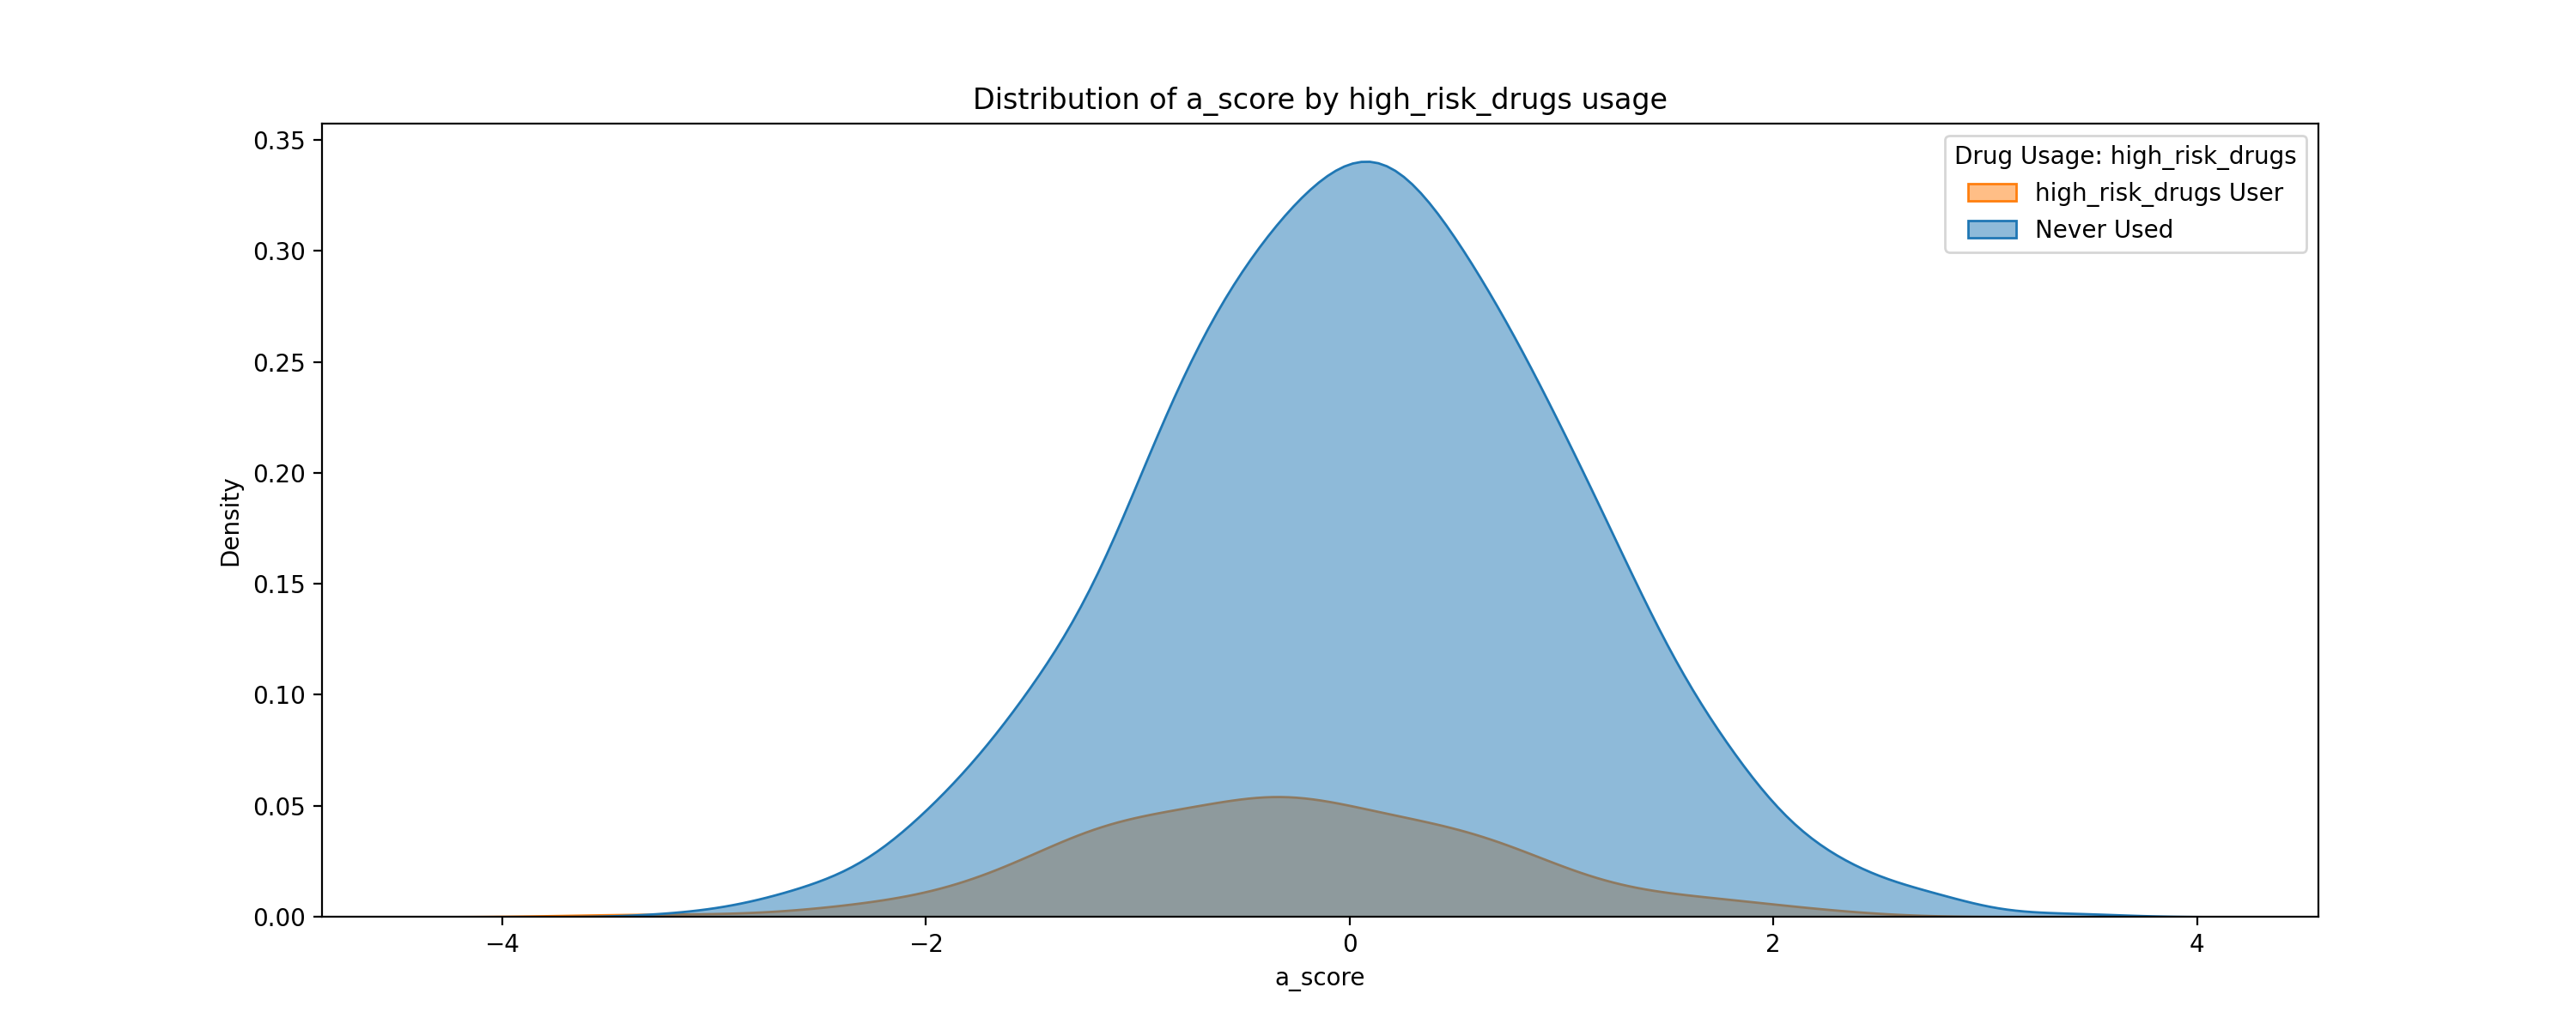

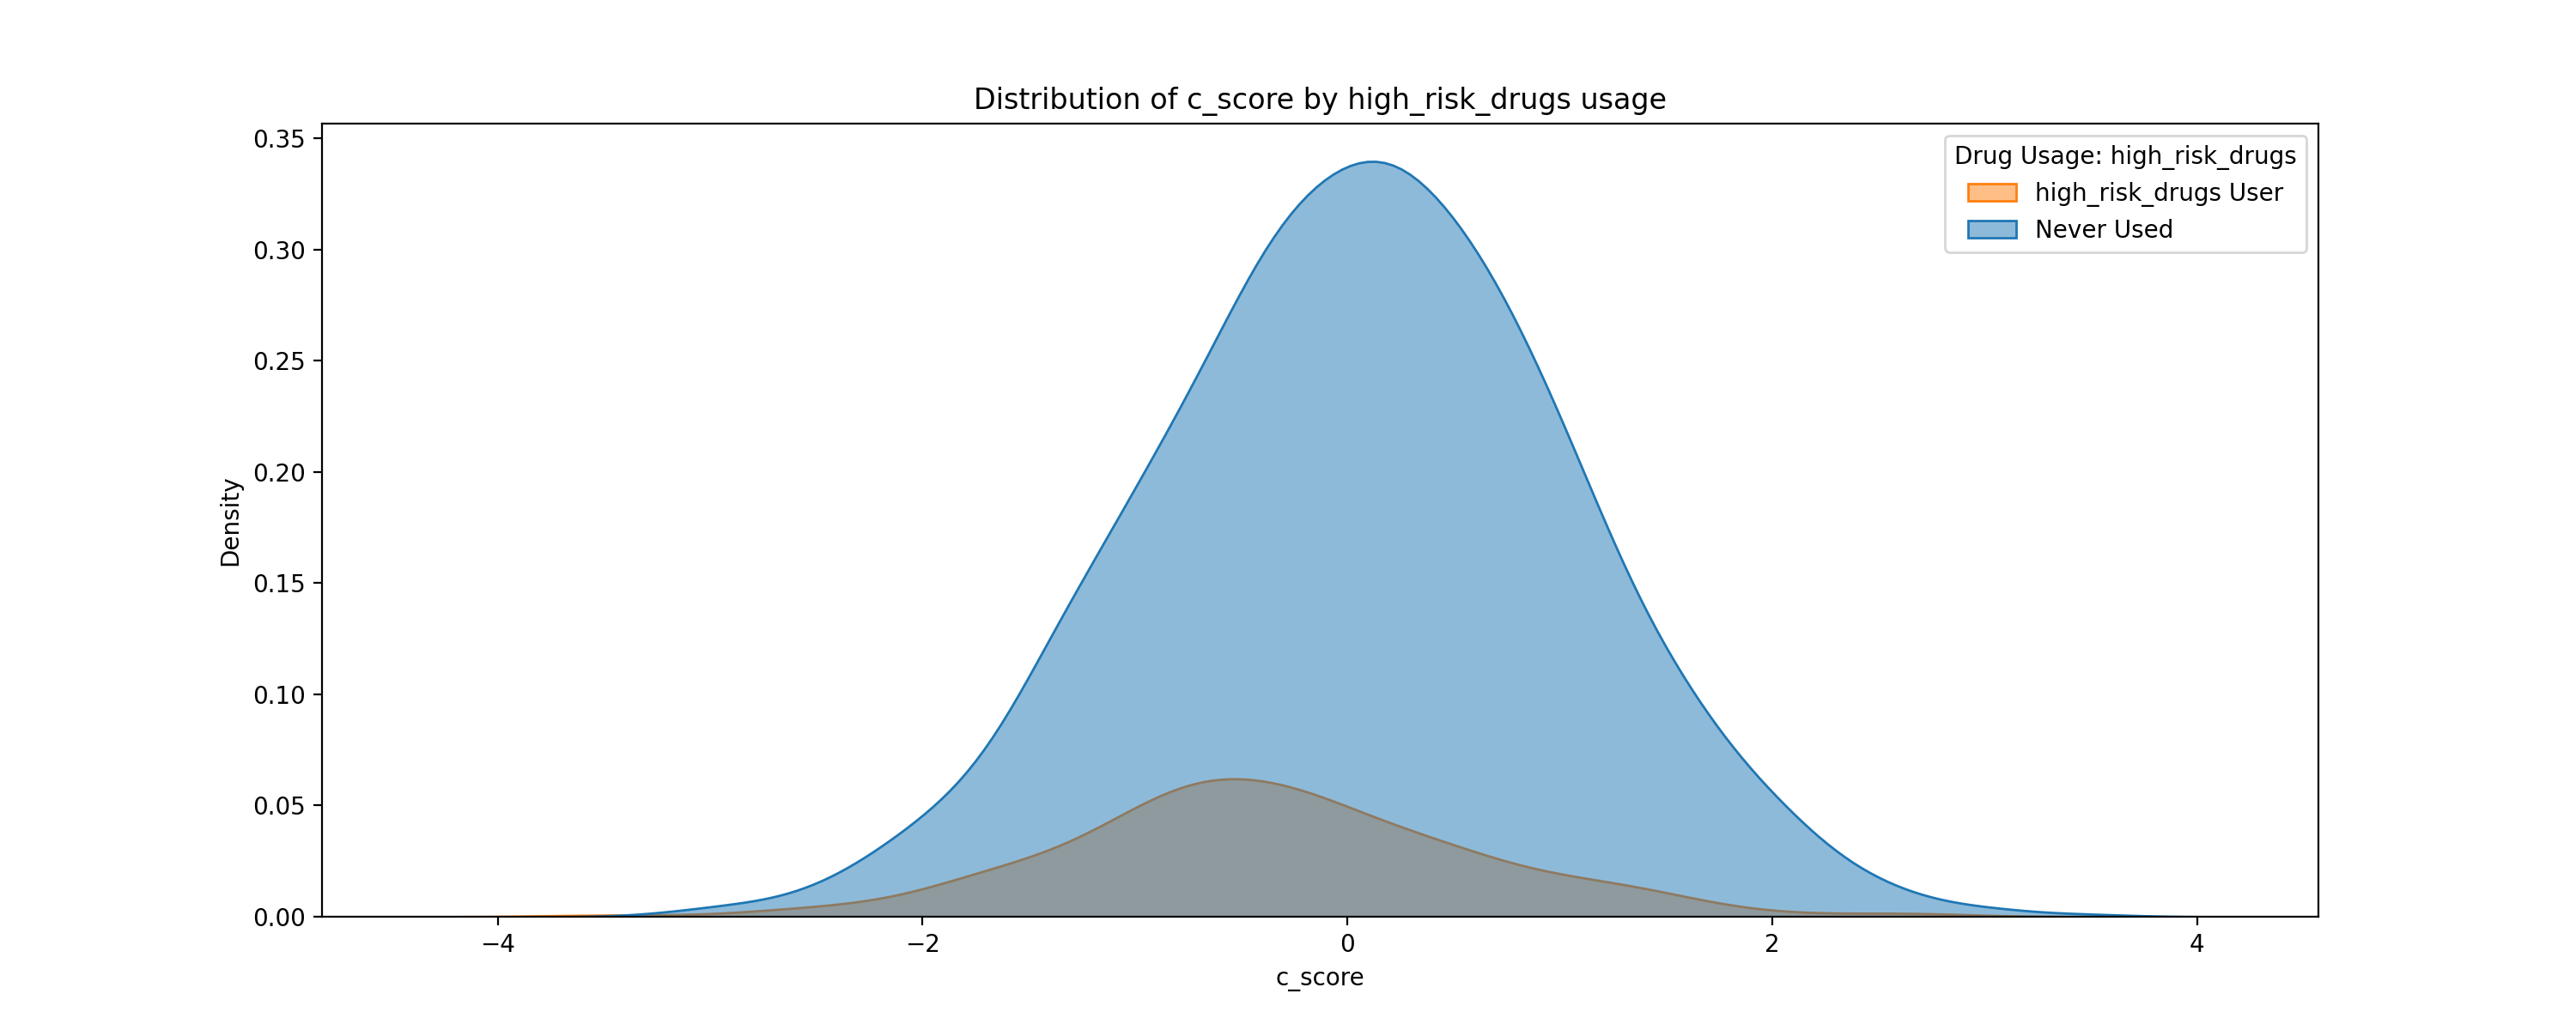

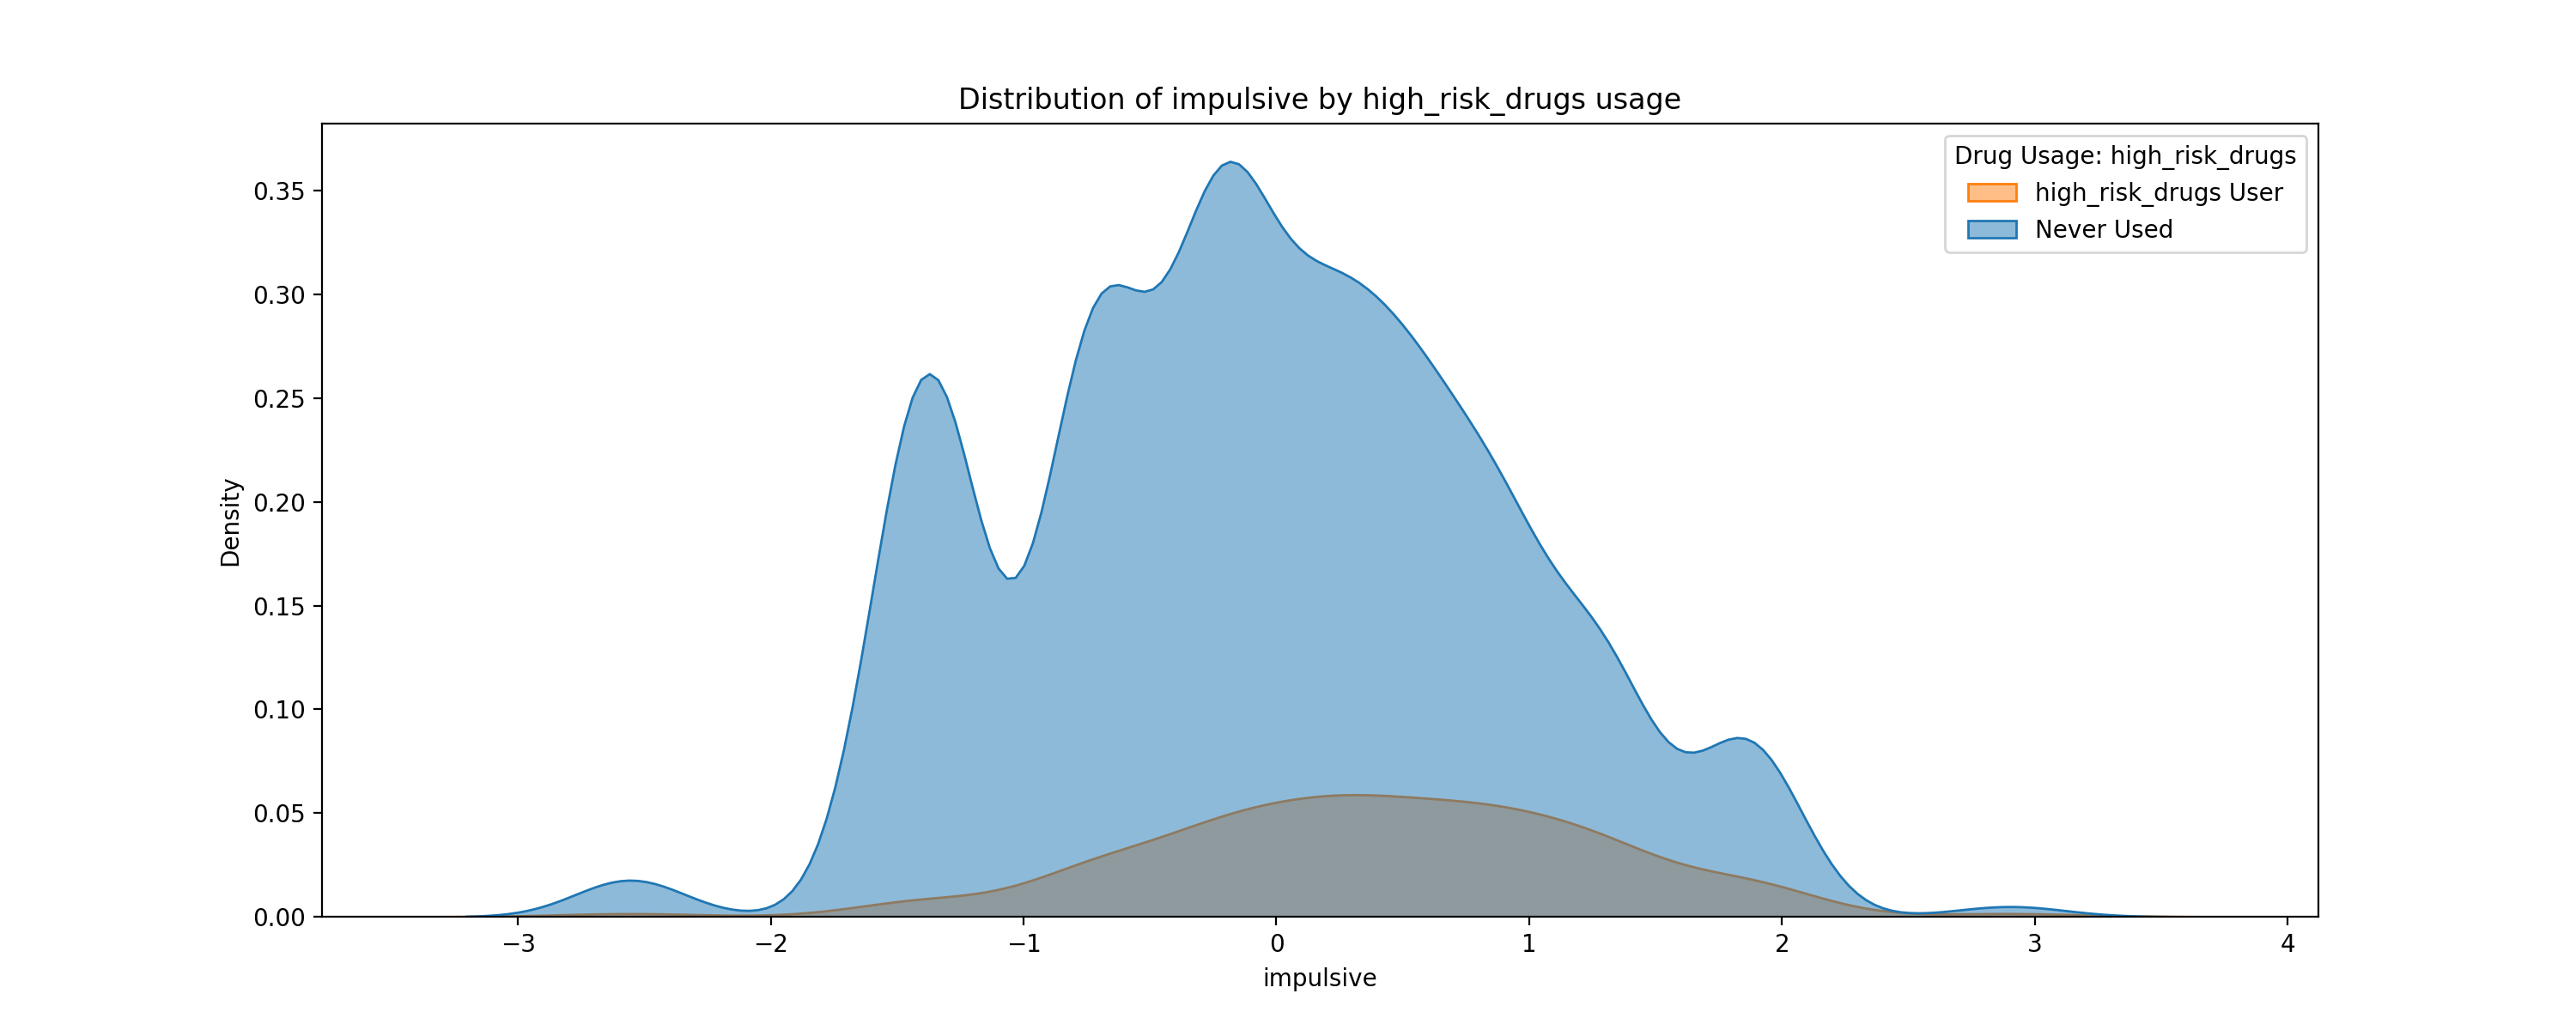

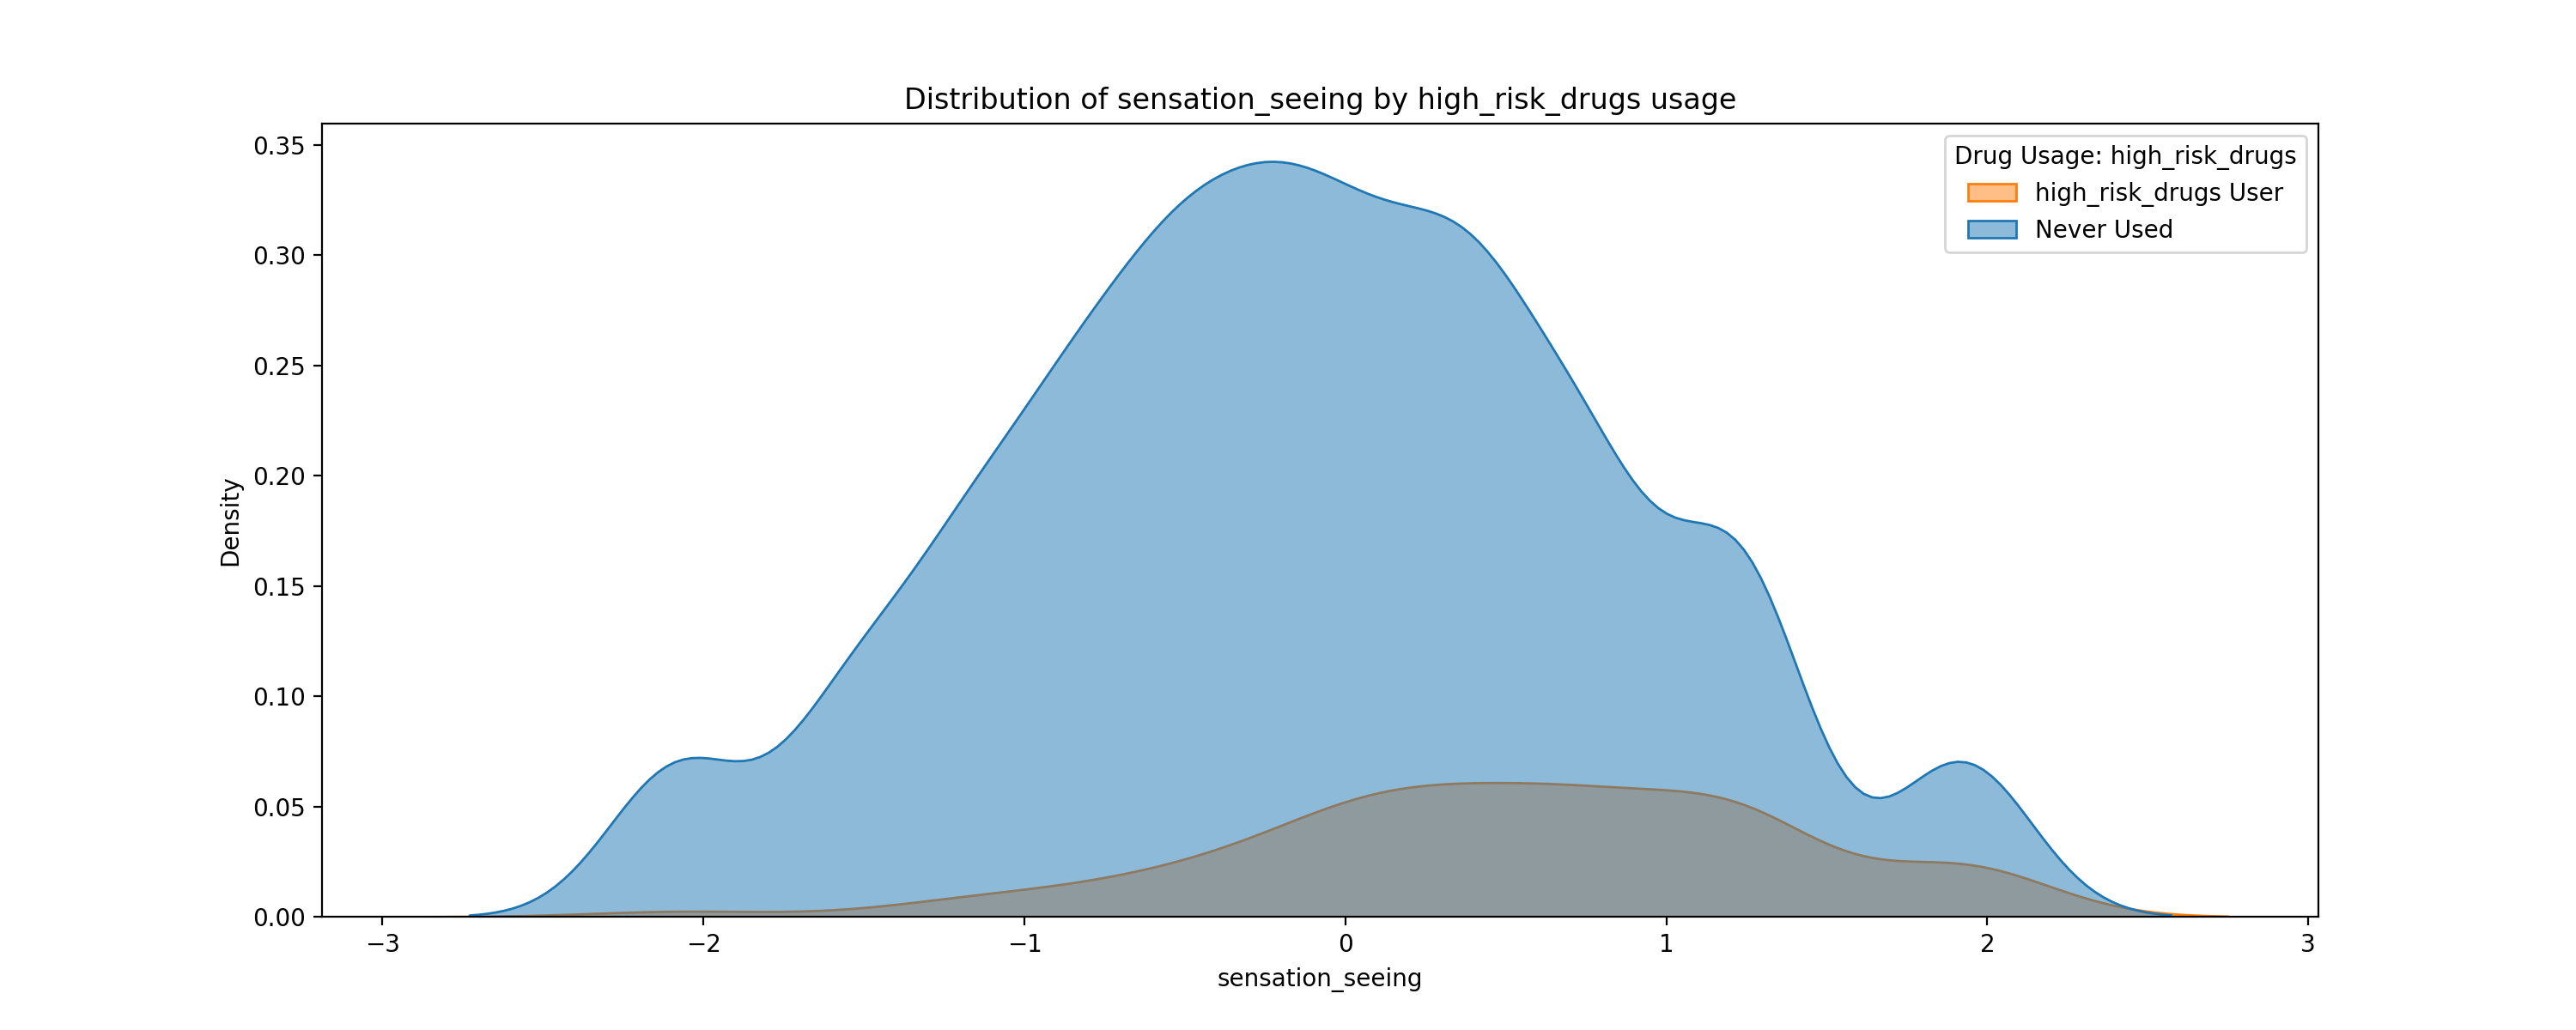

In [47]:
#Todos los gráficos
for i in range(11, len(df.columns)):
    for n in range(4, 11):
        personalidad_vs_drug_vs_usage(df, i, n)

# Gráficos con insights:

###  Modelo "NEO-PI-R

N_score: Este puntaje se refiere al neuroticismo, que está relacionado con la tendencia a experimentar emociones negativas como ansiedad, depresión e inestabilidad emocional.

E_score: Este puntaje corresponde a la extraversión, que indica la disposición a buscar estimulación en el entorno externo, la sociabilidad, la assertividad y la búsqueda de emociones.

O_score: Este puntaje representa la apertura a la experiencia, que se refiere a la disposición a ser abierto a nuevas ideas, tener una amplia gama de intereses, ser creativo y buscar experiencias nuevas.

A_score: Este puntaje se asocia con la amabilidad, que refleja la disposición a ser compasivo, cooperativo, confiado y solidario con los demás.

C_score: Por último, este puntaje corresponde a la responsabilidad, que se relaciona con la organización, la perseverancia, el control de los impulsos y la orientación a metas.

https://www.sapa-project.org/blogs/NEOmodel.html
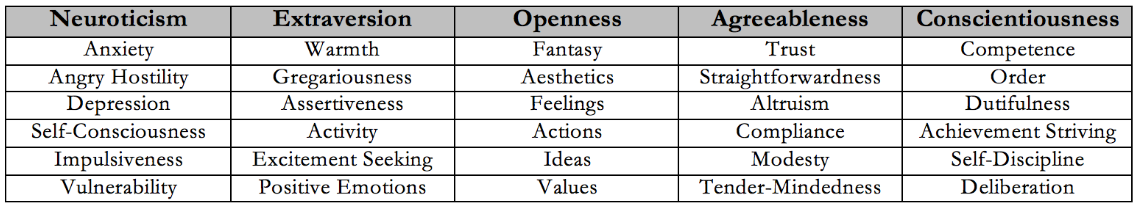

Tengo varios insights que iré escribiendo a lo largo de esta semana, ya que tengo que aportar bibliorafia y aparte sacar os graficos. Las ideas ya las tengo escritas y planteadas.